img_path:  ../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16.tif
mask_path:  ../nnUNet_raw/Dataset001_LGG_MRI/labelsTr/TCGA_DU_8168_19970503_16_mask.tif


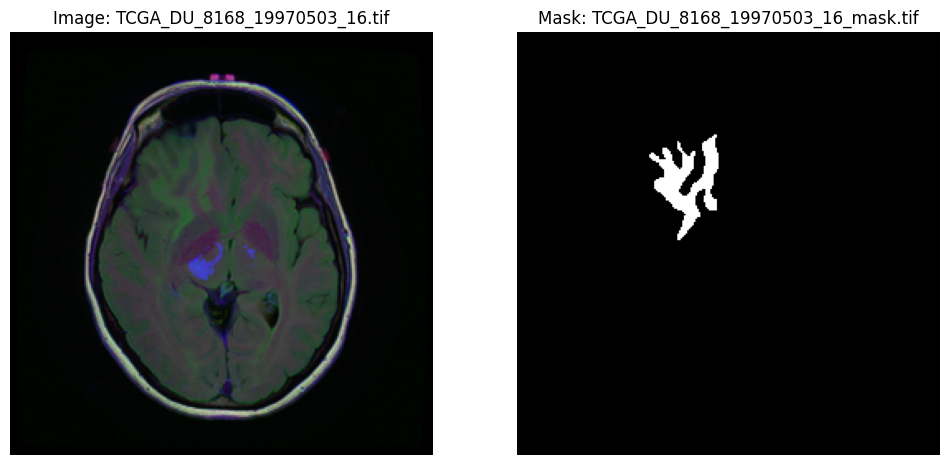

File: TCGA_DU_8168_19970503_16_mask.tif
Shape: (256, 256)
Data Type: uint8
Min pixel value: 0
Max pixel value: 255
Mean pixel value: 4.1400146484375
Unique pixel values: [  0 255]
--------------------------------------------------


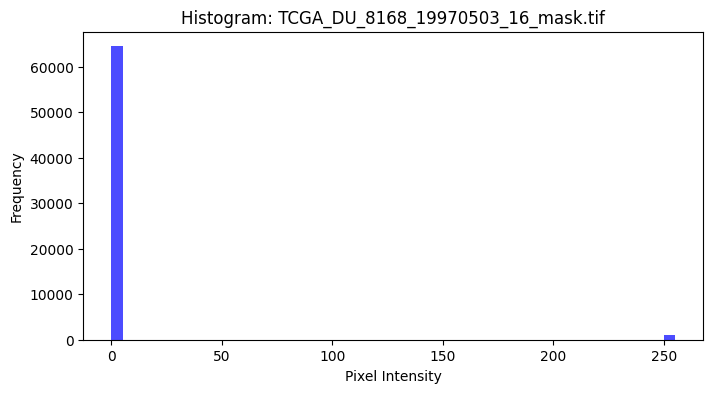

In [19]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

# Paths to your directories
images_dir = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr"
masks_dir = "../nnUNet_raw/Dataset001_LGG_MRI/labelsTr"

def load_tif(file_path):
    """Load a .tif file and return the image array."""
    return tiff.imread(file_path)

def display_image_and_mask(image_path, mask_path=None):
    """Display a .tif image and its corresponding mask."""
    image = load_tif(image_path)
    
    # Display image
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis('off')

    # If mask exists, display it
    if mask_path:
        mask = load_tif(mask_path)
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Mask: {os.path.basename(mask_path)}")
        plt.axis('off')

    plt.show()

def analyze_image(image_path):
    """Analyze basic properties of a .tif image."""
    image = load_tif(image_path)
    print(f"File: {os.path.basename(image_path)}")
    print(f"Shape: {image.shape}")
    print(f"Data Type: {image.dtype}")
    print(f"Min pixel value: {np.min(image)}")
    print(f"Max pixel value: {np.max(image)}")
    print(f"Mean pixel value: {np.mean(image)}")
    print(f"Unique pixel values: {np.unique(image)}")
    print("-" * 50)

def plot_histogram(image_path):
    """Plot pixel intensity histogram of the image."""
    image = load_tif(image_path)
    plt.figure(figsize=(8, 4))
    plt.hist(image.ravel(), bins=50, color='blue', alpha=0.7)
    plt.title(f"Histogram: {os.path.basename(image_path)}")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Perform EDA on a few images and masks
sample_images = os.listdir(images_dir)[:5]
for img in sample_images:
    img_path = os.path.join(images_dir, img)
    print("img_path: ", img_path) 
    
    mask_path = os.path.join(masks_dir, img.replace('.tif', '_mask.tif'))
    print("mask_path: ", mask_path) 
    # Display image and mask
    if os.path.exists(mask_path):
        display_image_and_mask(img_path, mask_path)
    
    # Analyze image
    analyze_image(mask_path)
    
    # Plot histogram
    plot_histogram(mask_path)

In [29]:
import cv2
import numpy as np

# 读取原始 RGB 图像
image = cv2.imread("../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16.tif")

# 拆分为 R、G、B 三个通道
b_channel, g_channel, r_channel = cv2.split(image)

# 保存为单独的文件
cv2.imwrite("../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0000.tif", r_channel)
cv2.imwrite("../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0001.tif", g_channel)
cv2.imwrite("../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0002.tif", b_channel)

True

In [ ]:
from PIL import Image
r_channel_path= "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0000.tif"
image = Image.open(r_channel_path)
print(image.size, image.mode)

(256, 256) L


In [ ]:
from PIL import Image
g_channel_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0001.tif"
image = Image.open(g_channel_path)
print(image.size, image.mode)

(256, 256) L


In [36]:
from PIL import Image
b_channel_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_0002.tif"
image = Image.open(b_channel_path)
print(image.size, image.mode)

(256, 256) L


In [37]:
import os
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt

def load_tif(file_path):
    """Load a .tif file and return the image array."""
    if os.path.exists(file_path):
        return tiff.imread(file_path)
    else:
        print(f"File not found: {file_path}")
        return None

def analyze_image(image, channel_name):
    """Analyze basic properties of a .tif image."""
    print(f"Channel: {channel_name}")
    print(f"Shape: {image.shape}")
    print(f"Data Type: {image.dtype}")
    print(f"Min pixel value: {np.min(image)}")
    print(f"Max pixel value: {np.max(image)}")
    print(f"Mean pixel value: {np.mean(image)}")
    print(f"Unique pixel values: {np.unique(image)}")
    print("-" * 50)

def save_channel(image, channel_index, output_path):
    """Save a single channel to a .tif file."""
    channel = image[:, :, channel_index]
    tiff.imwrite(output_path, channel)
    return output_path

# Load the RGB image
image_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16.tif"
image = load_tif(image_path)

if image is not None and image.ndim == 3 and image.shape[2] == 3:
    # Split into B, G, R channels
    b_channel = image[:, :, 0]
    g_channel = image[:, :, 1]
    r_channel = image[:, :, 2]
    
    # Save each channel separately
    b_channel_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_B.tif"
    g_channel_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_G.tif"
    r_channel_path = "../nnUNet_raw/Dataset001_LGG_MRI/imagesTr/TCGA_DU_8168_19970503_16_R.tif"
    
    save_channel(image, 0, b_channel_path)
    save_channel(image, 1, g_channel_path)
    save_channel(image, 2, r_channel_path)
    
    # Load the saved channels for analysis
    b_image = load_tif(b_channel_path)
    g_image = load_tif(g_channel_path)
    r_image = load_tif(r_channel_path)
    
    # Print information for each channel
    print("Analyzing B channel:")
    analyze_image(b_image, "Blue")
    
    print("Analyzing G channel:")
    analyze_image(g_image, "Green")
    
    print("Analyzing R channel:")
    analyze_image(r_image, "Red")
else:
    print("The image is not a valid RGB image.")

Analyzing B channel:
Channel: Blue
Shape: (256, 256)
Data Type: uint8
Min pixel value: 0
Max pixel value: 204
Mean pixel value: 22.01190185546875
Unique pixel values: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 196 198 199
 204]
------------------------

Image: TCGA_CS_4941_19960909_2_0000.tif
  Shape: (256, 256)
  Mean Pixel Value: 55.45
  Std Dev Pixel Value: 53.20
  Min Pixel Value: 0
  Max Pixel Value: 219
  Unique Pixel Values: 216

Image: TCGA_CS_4941_19960909_2_0001.tif
  Shape: (256, 256)
  Mean Pixel Value: 47.09
  Std Dev Pixel Value: 48.10
  Min Pixel Value: 0
  Max Pixel Value: 207
  Unique Pixel Values: 203

Image: TCGA_CS_4941_19960909_2_0002.tif
  Shape: (256, 256)
  Mean Pixel Value: 43.15
  Std Dev Pixel Value: 37.78
  Min Pixel Value: 0
  Max Pixel Value: 209
  Unique Pixel Values: 188



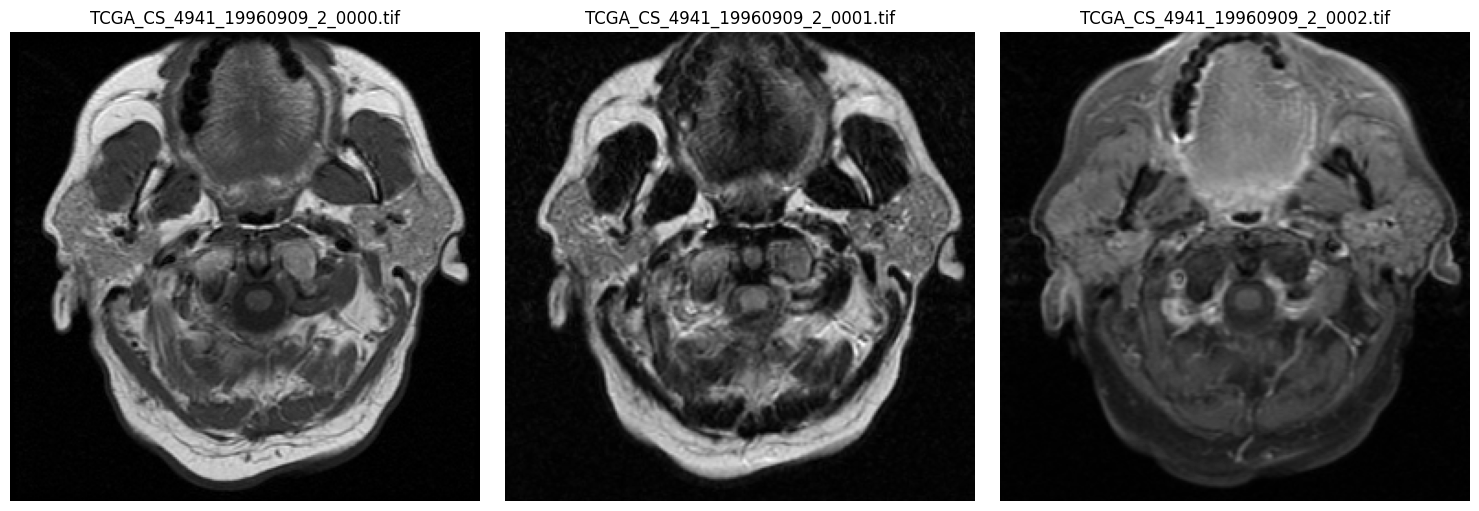

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Directory containing the images
image_dir = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTr"  # Replace with your image directory
image_files = [
    "TCGA_CS_4941_19960909_2_0000.tif",
    "TCGA_CS_4941_19960909_2_0001.tif",
    "TCGA_CS_4941_19960909_2_0002.tif"
]

# Initialize a dictionary to store image information
image_data = {}

# Function to load and analyze images
for img_file in image_files:
    # Load the image
    img_path = os.path.join(image_dir, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load in original format

    # Store metadata
    image_data[img_file] = {
        "shape": image.shape,  # Dimensions of the image
        "mean": np.mean(image),  # Mean pixel value
        "std": np.std(image),  # Standard deviation of pixel values
        "min": np.min(image),  # Minimum pixel value
        "max": np.max(image),  # Maximum pixel value
        "unique_values": len(np.unique(image))  # Number of unique pixel values
    }

    # Display image information
    print(f"Image: {img_file}")
    print(f"  Shape: {image.shape}")
    print(f"  Mean Pixel Value: {np.mean(image):.2f}")
    print(f"  Std Dev Pixel Value: {np.std(image):.2f}")
    print(f"  Min Pixel Value: {np.min(image)}")
    print(f"  Max Pixel Value: {np.max(image)}")
    print(f"  Unique Pixel Values: {len(np.unique(image))}")
    print()

# Visualize the images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, img_file in enumerate(image_files):
    img_path = os.path.join(image_dir, img_file)
    image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
    axes[i].imshow(image, cmap="gray")
    axes[i].set_title(img_file)
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [2]:
import os
import cv2
import numpy as np
from collections import defaultdict

# 输入文件夹路径
input_folder = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTr"  # 替换为你的输入文件夹路径
output_folder = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB"  # 替换为你的输出文件夹路径

# 确保输出文件夹存在
os.makedirs(output_folder, exist_ok=True)

# 遍历文件夹中的 .tif 文件
files = [f for f in os.listdir(input_folder) if f.endswith(".tif")]

# 按前缀组织文件
file_groups = defaultdict(dict)
for file in files:
    # 提取前缀和通道信息
    base_name = "_".join(file.split("_")[:-1])  # 前缀部分 (如 "TCGA_CS_4941_19960909_2")
    channel = file.split("_")[-1].split(".")[0]  # 通道信息 (如 "0000", "0001", "0002")
    
    # 按前缀分组
    file_groups[base_name][channel] = file

# 合并 RGB 通道并保存结果
for base_name, channels in file_groups.items():
    # 检查是否包含 R, G, B 通道
    if "0000" in channels and "0001" in channels and "0002" in channels:
        # 读取 R, G, B 图像
        red_path = os.path.join(input_folder, channels["0000"])
        green_path = os.path.join(input_folder, channels["0001"])
        blue_path = os.path.join(input_folder, channels["0002"])
        
        red_image = cv2.imread(red_path, cv2.IMREAD_GRAYSCALE)
        green_image = cv2.imread(green_path, cv2.IMREAD_GRAYSCALE)
        blue_image = cv2.imread(blue_path, cv2.IMREAD_GRAYSCALE)
        
        # 检查尺寸是否一致
        assert red_image.shape == green_image.shape == blue_image.shape, \
            f"Image dimensions do not match for {base_name}"
        
        # 合并为 RGB 图像
        rgb_image = np.stack((red_image, green_image, blue_image), axis=-1)
        
        # 保存 RGB 图像
        output_path = os.path.join(output_folder, f"{base_name}.tif")
        cv2.imwrite(output_path, rgb_image)
        print(f"Saved {output_path}")
    else:
        print(f"Skipping {base_name}: Missing R, G, or B channel.")


Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_DU_7304_19930325_16.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_HT_7879_19981009_20.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_DU_6400_19830518_3.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_HT_7877_19980917_5.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_HT_A5RC_19990831_12.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_HT_8106_19970727_16.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_DU_8168_19970503_36.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_FG_6690_20020226_10.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_FG_A4MT_20020212_13.tif
Saved /home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB/TCGA_FG_A60K_20040224_5.tif
Saved /home/ran/data/deeplearning

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt # 输入文件夹路径
input_folder = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTr"  # 替换为你的输入文件夹路径
output_folder = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRGB"  # 替换为你的输出文件夹路径

# 统计输入文件夹中的文件数量
input_files = [f for f in os.listdir(input_folder) if f.endswith(".tif")]
output_files = [f for f in os.listdir(output_folder) if f.endswith(".tif")]

print(f"Number of input files: {len(input_files)}")
print(f"Number of output files: {len(output_files)}")

# 对合成的 tif 文件进行 EDA
def eda_tif_files(file_list, folder):
    print("\nExploratory Data Analysis (EDA) on TIF Files:")
    for file in file_list:
        file_path = os.path.join(folder, file)
        image = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)  # 读取图像
        if image is None:
            print(f"Error reading file: {file}")
            continue

        print(f"\nFile: {file}")
        print(f"  Shape: {image.shape}")  # 图像分辨率
        print(f"  Data Type: {image.dtype}")  # 数据类型
        print(f"  Min Pixel Value: {np.min(image)}")  # 像素最小值
        print(f"  Max Pixel Value: {np.max(image)}")  # 像素最大值
        print(f"  Mean Pixel Value: {np.mean(image):.2f}")  # 像素均值
        print(f"  Std Dev Pixel Value: {np.std(image):.2f}")  # 像素标准差

        # 显示前几个合成文件
        plt.figure(figsize=(6, 6))
        plt.imshow(image[..., ::-1])  # 如果是 RGB，显示时调整为正确顺序
        plt.title(f"{file}")
        plt.axis("off")
        plt.show()

# 运行 EDA
eda_tif_files(output_files, output_folder)

In [ ]:
training = [
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_27",
            "label": "./labelsTr/TCGA_DU_7014_19860618_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_2",
            "label": "./labelsTr/TCGA_FG_5964_20010511_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_11",
            "label": "./labelsTr/TCGA_HT_7855_19951020_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_31",
            "label": "./labelsTr/TCGA_DU_8164_19970111_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_19",
            "label": "./labelsTr/TCGA_HT_8111_19980330_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_23",
            "label": "./labelsTr/TCGA_DU_6407_19860514_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_68",
            "label": "./labelsTr/TCGA_HT_7881_19981015_68.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_4",
            "label": "./labelsTr/TCGA_DU_8164_19970111_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_12",
            "label": "./labelsTr/TCGA_DU_7306_19930512_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_42",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_18",
            "label": "./labelsTr/TCGA_CS_5393_19990606_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_71",
            "label": "./labelsTr/TCGA_DU_5872_19950223_71.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_15",
            "label": "./labelsTr/TCGA_HT_7881_19981015_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_1",
            "label": "./labelsTr/TCGA_CS_6669_20020102_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_32",
            "label": "./labelsTr/TCGA_DU_8167_19970402_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_19",
            "label": "./labelsTr/TCGA_CS_6666_20011109_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_8",
            "label": "./labelsTr/TCGA_CS_4943_20000902_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_13",
            "label": "./labelsTr/TCGA_DU_7014_19860618_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_24",
            "label": "./labelsTr/TCGA_HT_7856_19950831_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_3",
            "label": "./labelsTr/TCGA_FG_6691_20020405_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_28",
            "label": "./labelsTr/TCGA_DU_8166_19970322_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_4",
            "label": "./labelsTr/TCGA_HT_7475_19970918_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_21",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_13",
            "label": "./labelsTr/TCGA_CS_6666_20011109_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_22",
            "label": "./labelsTr/TCGA_DU_7301_19911112_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_20",
            "label": "./labelsTr/TCGA_HT_7692_19960724_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_4",
            "label": "./labelsTr/TCGA_DU_7018_19911220_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_14",
            "label": "./labelsTr/TCGA_HT_7855_19951020_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_37",
            "label": "./labelsTr/TCGA_DU_6407_19860514_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_12",
            "label": "./labelsTr/TCGA_CS_6668_20011025_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_38",
            "label": "./labelsTr/TCGA_HT_7881_19981015_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_10",
            "label": "./labelsTr/TCGA_CS_4942_19970222_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_11",
            "label": "./labelsTr/TCGA_HT_7881_19981015_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_65",
            "label": "./labelsTr/TCGA_HT_7881_19981015_65.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_8",
            "label": "./labelsTr/TCGA_DU_6400_19830518_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_20",
            "label": "./labelsTr/TCGA_HT_8563_19981209_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_11",
            "label": "./labelsTr/TCGA_CS_6669_20020102_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_19",
            "label": "./labelsTr/TCGA_FG_8189_20030516_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_3",
            "label": "./labelsTr/TCGA_CS_4943_20000902_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_30",
            "label": "./labelsTr/TCGA_FG_5962_20000626_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_19",
            "label": "./labelsTr/TCGA_CS_6186_20000601_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_14",
            "label": "./labelsTr/TCGA_HT_A616_19991226_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_31",
            "label": "./labelsTr/TCGA_DU_7300_19910814_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_4",
            "label": "./labelsTr/TCGA_DU_5854_19951104_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_37",
            "label": "./labelsTr/TCGA_FG_6689_20020326_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_5",
            "label": "./labelsTr/TCGA_HT_8105_19980826_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_64",
            "label": "./labelsTr/TCGA_HT_7881_19981015_64.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_14",
            "label": "./labelsTr/TCGA_HT_8018_19970411_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_42",
            "label": "./labelsTr/TCGA_FG_8189_20030516_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_9",
            "label": "./labelsTr/TCGA_CS_4944_20010208_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_10",
            "label": "./labelsTr/TCGA_HT_8018_19970411_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_23",
            "label": "./labelsTr/TCGA_DU_8165_19970205_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_38",
            "label": "./labelsTr/TCGA_DU_6404_19850629_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_30",
            "label": "./labelsTr/TCGA_DU_7304_19930325_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_2",
            "label": "./labelsTr/TCGA_HT_7855_19951020_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_15",
            "label": "./labelsTr/TCGA_HT_7692_19960724_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_3",
            "label": "./labelsTr/TCGA_HT_8113_19930809_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_1",
            "label": "./labelsTr/TCGA_CS_6290_20000917_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_7",
            "label": "./labelsTr/TCGA_FG_5964_20010511_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_31",
            "label": "./labelsTr/TCGA_DU_7008_19830723_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_37",
            "label": "./labelsTr/TCGA_DU_6408_19860521_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_19",
            "label": "./labelsTr/TCGA_DU_7298_19910324_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_16",
            "label": "./labelsTr/TCGA_CS_6188_20010812_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_6",
            "label": "./labelsTr/TCGA_DU_5851_19950428_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_42",
            "label": "./labelsTr/TCGA_DU_7008_19830723_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_8",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_21",
            "label": "./labelsTr/TCGA_HT_7605_19950916_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_16",
            "label": "./labelsTr/TCGA_HT_8107_19980708_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_12",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_3",
            "label": "./labelsTr/TCGA_CS_6669_20020102_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_10",
            "label": "./labelsTr/TCGA_DU_5853_19950823_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_23",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_22",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_10",
            "label": "./labelsTr/TCGA_CS_5397_20010315_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_31",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_4",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_7",
            "label": "./labelsTr/TCGA_DU_6408_19860521_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_23",
            "label": "./labelsTr/TCGA_DU_7018_19911220_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_51",
            "label": "./labelsTr/TCGA_DU_7014_19860618_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_44",
            "label": "./labelsTr/TCGA_DU_6400_19830518_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_15",
            "label": "./labelsTr/TCGA_HT_8114_19981030_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_73",
            "label": "./labelsTr/TCGA_HT_7881_19981015_73.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_33",
            "label": "./labelsTr/TCGA_DU_8162_19961029_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_31",
            "label": "./labelsTr/TCGA_FG_5962_20000626_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_10",
            "label": "./labelsTr/TCGA_HT_7680_19970202_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_32",
            "label": "./labelsTr/TCGA_HT_8105_19980826_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_10",
            "label": "./labelsTr/TCGA_FG_6690_20020226_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_40",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_14",
            "label": "./labelsTr/TCGA_DU_5851_19950428_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_60",
            "label": "./labelsTr/TCGA_HT_7881_19981015_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_7",
            "label": "./labelsTr/TCGA_HT_7475_19970918_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_15",
            "label": "./labelsTr/TCGA_DU_8163_19961119_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_31",
            "label": "./labelsTr/TCGA_HT_7882_19970125_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_1",
            "label": "./labelsTr/TCGA_HT_7874_19950902_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_8",
            "label": "./labelsTr/TCGA_HT_7855_19951020_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_33",
            "label": "./labelsTr/TCGA_DU_7018_19911220_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_7",
            "label": "./labelsTr/TCGA_DU_7019_19940908_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_2",
            "label": "./labelsTr/TCGA_FG_6688_20020215_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_26",
            "label": "./labelsTr/TCGA_FG_5962_20000626_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_65",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_65.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_35",
            "label": "./labelsTr/TCGA_DU_6401_19831001_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_39",
            "label": "./labelsTr/TCGA_FG_5962_20000626_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_15",
            "label": "./labelsTr/TCGA_HT_8107_19980708_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_25",
            "label": "./labelsTr/TCGA_DU_5872_19950223_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_21",
            "label": "./labelsTr/TCGA_DU_7018_19911220_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_16",
            "label": "./labelsTr/TCGA_HT_8106_19970727_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_36",
            "label": "./labelsTr/TCGA_DU_7014_19860618_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_62",
            "label": "./labelsTr/TCGA_HT_7881_19981015_62.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_25",
            "label": "./labelsTr/TCGA_DU_7298_19910324_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_1",
            "label": "./labelsTr/TCGA_HT_7602_19951103_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_16",
            "label": "./labelsTr/TCGA_FG_6690_20020226_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_46",
            "label": "./labelsTr/TCGA_DU_5872_19950223_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_25",
            "label": "./labelsTr/TCGA_DU_7301_19911112_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_2",
            "label": "./labelsTr/TCGA_CS_6290_20000917_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_9",
            "label": "./labelsTr/TCGA_CS_6665_20010817_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_4",
            "label": "./labelsTr/TCGA_DU_5853_19950823_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_26",
            "label": "./labelsTr/TCGA_DU_7299_19910417_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_21",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_35",
            "label": "./labelsTr/TCGA_DU_5849_19950405_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_21",
            "label": "./labelsTr/TCGA_DU_7294_19890104_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_6",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_2",
            "label": "./labelsTr/TCGA_HT_7693_19950520_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_3",
            "label": "./labelsTr/TCGA_DU_7302_19911203_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_50",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_18",
            "label": "./labelsTr/TCGA_DU_7306_19930512_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_21",
            "label": "./labelsTr/TCGA_DU_8168_19970503_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_12",
            "label": "./labelsTr/TCGA_HT_7475_19970918_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_31",
            "label": "./labelsTr/TCGA_FG_6691_20020405_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_55",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_33",
            "label": "./labelsTr/TCGA_DU_7309_19960831_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_29",
            "label": "./labelsTr/TCGA_DU_5874_19950510_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_6",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_18",
            "label": "./labelsTr/TCGA_DU_8162_19961029_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_43",
            "label": "./labelsTr/TCGA_DU_6408_19860521_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_13",
            "label": "./labelsTr/TCGA_CS_6667_20011105_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_17",
            "label": "./labelsTr/TCGA_CS_4944_20010208_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_30",
            "label": "./labelsTr/TCGA_DU_7309_19960831_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_24",
            "label": "./labelsTr/TCGA_DU_6408_19860521_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_13",
            "label": "./labelsTr/TCGA_HT_7694_19950404_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_2",
            "label": "./labelsTr/TCGA_HT_7616_19940813_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_13",
            "label": "./labelsTr/TCGA_DU_7294_19890104_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_34",
            "label": "./labelsTr/TCGA_DU_8164_19970111_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_7",
            "label": "./labelsTr/TCGA_HT_7860_19960513_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_4",
            "label": "./labelsTr/TCGA_CS_6669_20020102_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_28",
            "label": "./labelsTr/TCGA_HT_7616_19940813_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_3",
            "label": "./labelsTr/TCGA_CS_5396_20010302_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_22",
            "label": "./labelsTr/TCGA_FG_6690_20020226_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_31",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_13",
            "label": "./labelsTr/TCGA_CS_5395_19981004_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_43",
            "label": "./labelsTr/TCGA_FG_6691_20020405_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_3",
            "label": "./labelsTr/TCGA_DU_8164_19970111_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_34",
            "label": "./labelsTr/TCGA_DU_8163_19961119_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_10",
            "label": "./labelsTr/TCGA_DU_5851_19950428_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_10",
            "label": "./labelsTr/TCGA_HT_7856_19950831_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_9",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_32",
            "label": "./labelsTr/TCGA_HT_7473_19970826_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_2",
            "label": "./labelsTr/TCGA_DU_8163_19961119_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_1",
            "label": "./labelsTr/TCGA_DU_7298_19910324_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_68",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_68.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_16",
            "label": "./labelsTr/TCGA_DU_8164_19970111_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_43",
            "label": "./labelsTr/TCGA_DU_7008_19830723_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_22",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_23",
            "label": "./labelsTr/TCGA_DU_6399_19830416_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_26",
            "label": "./labelsTr/TCGA_FG_6691_20020405_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_9",
            "label": "./labelsTr/TCGA_DU_7309_19960831_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_41",
            "label": "./labelsTr/TCGA_DU_6399_19830416_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_14",
            "label": "./labelsTr/TCGA_HT_7684_19950816_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_45",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_9",
            "label": "./labelsTr/TCGA_HT_7693_19950520_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_6",
            "label": "./labelsTr/TCGA_HT_7884_19980913_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_6",
            "label": "./labelsTr/TCGA_DU_5853_19950823_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_15",
            "label": "./labelsTr/TCGA_DU_7300_19910814_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_3",
            "label": "./labelsTr/TCGA_HT_7475_19970918_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_17",
            "label": "./labelsTr/TCGA_DU_5851_19950428_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_42",
            "label": "./labelsTr/TCGA_FG_7643_20021104_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_33",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_36",
            "label": "./labelsTr/TCGA_FG_6688_20020215_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_2",
            "label": "./labelsTr/TCGA_HT_7694_19950404_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_17",
            "label": "./labelsTr/TCGA_HT_7879_19981009_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_44",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_7",
            "label": "./labelsTr/TCGA_DU_8164_19970111_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_41",
            "label": "./labelsTr/TCGA_DU_6401_19831001_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_34",
            "label": "./labelsTr/TCGA_FG_8189_20030516_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_6",
            "label": "./labelsTr/TCGA_HT_7473_19970826_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_43",
            "label": "./labelsTr/TCGA_DU_6399_19830416_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_6",
            "label": "./labelsTr/TCGA_HT_7605_19950916_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_17",
            "label": "./labelsTr/TCGA_DU_7298_19910324_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_21",
            "label": "./labelsTr/TCGA_DU_5874_19950510_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_25",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_4",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_20",
            "label": "./labelsTr/TCGA_CS_6669_20020102_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_11",
            "label": "./labelsTr/TCGA_HT_A616_19991226_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_13",
            "label": "./labelsTr/TCGA_DU_5851_19950428_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_11",
            "label": "./labelsTr/TCGA_HT_7874_19950902_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_55",
            "label": "./labelsTr/TCGA_HT_7881_19981015_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_22",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_74",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_74.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_13",
            "label": "./labelsTr/TCGA_HT_7605_19950916_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_29",
            "label": "./labelsTr/TCGA_FG_6689_20020326_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_22",
            "label": "./labelsTr/TCGA_CS_4941_19960909_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_20",
            "label": "./labelsTr/TCGA_DU_7301_19911112_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_5",
            "label": "./labelsTr/TCGA_DU_5849_19950405_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_3",
            "label": "./labelsTr/TCGA_DU_6408_19860521_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_13",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_20",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_48",
            "label": "./labelsTr/TCGA_DU_7010_19860307_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_15",
            "label": "./labelsTr/TCGA_CS_6668_20011025_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_42",
            "label": "./labelsTr/TCGA_DU_7013_19860523_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_35",
            "label": "./labelsTr/TCGA_DU_8164_19970111_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_35",
            "label": "./labelsTr/TCGA_DU_7019_19940908_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_7",
            "label": "./labelsTr/TCGA_DU_7309_19960831_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_80",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_80.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_30",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_14",
            "label": "./labelsTr/TCGA_CS_5393_19990606_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_19",
            "label": "./labelsTr/TCGA_CS_5395_19981004_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_8",
            "label": "./labelsTr/TCGA_HT_7879_19981009_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_15",
            "label": "./labelsTr/TCGA_CS_4943_20000902_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_54",
            "label": "./labelsTr/TCGA_DU_5872_19950223_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_45",
            "label": "./labelsTr/TCGA_DU_7013_19860523_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_20",
            "label": "./labelsTr/TCGA_CS_4942_19970222_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_8",
            "label": "./labelsTr/TCGA_FG_7634_20000128_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_7",
            "label": "./labelsTr/TCGA_DU_5849_19950405_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_32",
            "label": "./labelsTr/TCGA_DU_7301_19911112_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_18",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_3",
            "label": "./labelsTr/TCGA_DU_6407_19860514_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_40",
            "label": "./labelsTr/TCGA_DU_5851_19950428_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_30",
            "label": "./labelsTr/TCGA_DU_8167_19970402_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_35",
            "label": "./labelsTr/TCGA_DU_7013_19860523_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_10",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_9",
            "label": "./labelsTr/TCGA_FG_7643_20021104_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_16",
            "label": "./labelsTr/TCGA_CS_5396_20010302_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_4",
            "label": "./labelsTr/TCGA_FG_6692_20020606_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_27",
            "label": "./labelsTr/TCGA_DU_5851_19950428_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_2",
            "label": "./labelsTr/TCGA_DU_5853_19950823_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_40",
            "label": "./labelsTr/TCGA_DU_5872_19950223_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_19",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_6",
            "label": "./labelsTr/TCGA_HT_8114_19981030_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_2",
            "label": "./labelsTr/TCGA_HT_8105_19980826_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_26",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_51",
            "label": "./labelsTr/TCGA_DU_6405_19851005_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_34",
            "label": "./labelsTr/TCGA_DU_8166_19970322_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_1",
            "label": "./labelsTr/TCGA_HT_7877_19980917_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_47",
            "label": "./labelsTr/TCGA_DU_6407_19860514_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_12",
            "label": "./labelsTr/TCGA_DU_8166_19970322_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_25",
            "label": "./labelsTr/TCGA_HT_A616_19991226_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_49",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_50",
            "label": "./labelsTr/TCGA_DU_7008_19830723_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_20",
            "label": "./labelsTr/TCGA_HT_8106_19970727_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_30",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_5",
            "label": "./labelsTr/TCGA_CS_6666_20011109_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_13",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_21",
            "label": "./labelsTr/TCGA_CS_6665_20010817_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_21",
            "label": "./labelsTr/TCGA_DU_7013_19860523_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_7",
            "label": "./labelsTr/TCGA_DU_6400_19830518_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_11",
            "label": "./labelsTr/TCGA_DU_7018_19911220_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_4",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_7",
            "label": "./labelsTr/TCGA_HT_7616_19940813_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_49",
            "label": "./labelsTr/TCGA_HT_7881_19981015_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_12",
            "label": "./labelsTr/TCGA_DU_5854_19951104_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_43",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_34",
            "label": "./labelsTr/TCGA_DU_7294_19890104_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_1",
            "label": "./labelsTr/TCGA_HT_8106_19970727_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_10",
            "label": "./labelsTr/TCGA_HT_8114_19981030_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_6",
            "label": "./labelsTr/TCGA_HT_A616_19991226_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_10",
            "label": "./labelsTr/TCGA_DU_7300_19910814_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_6",
            "label": "./labelsTr/TCGA_CS_6666_20011109_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_4",
            "label": "./labelsTr/TCGA_CS_5393_19990606_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_2",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_16",
            "label": "./labelsTr/TCGA_HT_7856_19950831_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_19",
            "label": "./labelsTr/TCGA_HT_7686_19950629_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_6",
            "label": "./labelsTr/TCGA_CS_5393_19990606_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_4",
            "label": "./labelsTr/TCGA_HT_A616_19991226_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_8",
            "label": "./labelsTr/TCGA_HT_7694_19950404_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_22",
            "label": "./labelsTr/TCGA_HT_8563_19981209_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_12",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_22",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_5",
            "label": "./labelsTr/TCGA_HT_7680_19970202_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_15",
            "label": "./labelsTr/TCGA_DU_6404_19850629_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_11",
            "label": "./labelsTr/TCGA_HT_7860_19960513_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_27",
            "label": "./labelsTr/TCGA_HT_7605_19950916_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_10",
            "label": "./labelsTr/TCGA_DU_5871_19941206_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_1",
            "label": "./labelsTr/TCGA_DU_5872_19950223_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_13",
            "label": "./labelsTr/TCGA_DU_6408_19860521_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_6",
            "label": "./labelsTr/TCGA_DU_7014_19860618_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_27",
            "label": "./labelsTr/TCGA_DU_6404_19850629_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_50",
            "label": "./labelsTr/TCGA_DU_7014_19860618_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_29",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_15",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_17",
            "label": "./labelsTr/TCGA_DU_8165_19970205_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_23",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_37",
            "label": "./labelsTr/TCGA_DU_7010_19860307_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_27",
            "label": "./labelsTr/TCGA_FG_6690_20020226_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_6",
            "label": "./labelsTr/TCGA_DU_5855_19951217_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_19",
            "label": "./labelsTr/TCGA_DU_5854_19951104_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_13",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_18",
            "label": "./labelsTr/TCGA_CS_6665_20010817_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_35",
            "label": "./labelsTr/TCGA_DU_7008_19830723_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_24",
            "label": "./labelsTr/TCGA_DU_7298_19910324_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_17",
            "label": "./labelsTr/TCGA_DU_7019_19940908_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_10",
            "label": "./labelsTr/TCGA_FG_5962_20000626_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_33",
            "label": "./labelsTr/TCGA_DU_8164_19970111_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_28",
            "label": "./labelsTr/TCGA_DU_7304_19930325_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_11",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_10",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_28",
            "label": "./labelsTr/TCGA_DU_5874_19950510_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_26",
            "label": "./labelsTr/TCGA_HT_7881_19981015_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_27",
            "label": "./labelsTr/TCGA_FG_7643_20021104_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_17",
            "label": "./labelsTr/TCGA_DU_7301_19911112_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_55",
            "label": "./labelsTr/TCGA_DU_6408_19860521_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_30",
            "label": "./labelsTr/TCGA_DU_7302_19911203_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_5",
            "label": "./labelsTr/TCGA_HT_7693_19950520_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_36",
            "label": "./labelsTr/TCGA_DU_7019_19940908_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_3",
            "label": "./labelsTr/TCGA_CS_4942_19970222_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_16",
            "label": "./labelsTr/TCGA_CS_5393_19990606_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_35",
            "label": "./labelsTr/TCGA_DU_7301_19911112_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_22",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_10",
            "label": "./labelsTr/TCGA_FG_6688_20020215_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_2",
            "label": "./labelsTr/TCGA_DU_8167_19970402_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_8",
            "label": "./labelsTr/TCGA_HT_7884_19980913_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_5",
            "label": "./labelsTr/TCGA_HT_7605_19950916_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_24",
            "label": "./labelsTr/TCGA_HT_8105_19980826_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_25",
            "label": "./labelsTr/TCGA_FG_5964_20010511_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_17",
            "label": "./labelsTr/TCGA_CS_6668_20011025_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_9",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_19",
            "label": "./labelsTr/TCGA_HT_7856_19950831_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_48",
            "label": "./labelsTr/TCGA_FG_8189_20030516_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_29",
            "label": "./labelsTr/TCGA_DU_7294_19890104_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_36",
            "label": "./labelsTr/TCGA_DU_7010_19860307_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_17",
            "label": "./labelsTr/TCGA_DU_8162_19961029_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_22",
            "label": "./labelsTr/TCGA_DU_6407_19860514_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_18",
            "label": "./labelsTr/TCGA_DU_6404_19850629_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_10",
            "label": "./labelsTr/TCGA_DU_6408_19860521_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_25",
            "label": "./labelsTr/TCGA_DU_5871_19941206_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_36",
            "label": "./labelsTr/TCGA_FG_8189_20030516_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_26",
            "label": "./labelsTr/TCGA_DU_6399_19830416_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_26",
            "label": "./labelsTr/TCGA_DU_6400_19830518_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_20",
            "label": "./labelsTr/TCGA_HT_7473_19970826_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_20",
            "label": "./labelsTr/TCGA_HT_7693_19950520_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_4",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_8",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_19",
            "label": "./labelsTr/TCGA_CS_4944_20010208_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_31",
            "label": "./labelsTr/TCGA_DU_8165_19970205_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_27",
            "label": "./labelsTr/TCGA_DU_8165_19970205_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_9",
            "label": "./labelsTr/TCGA_HT_7874_19950902_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_18",
            "label": "./labelsTr/TCGA_HT_7608_19940304_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_22",
            "label": "./labelsTr/TCGA_CS_6666_20011109_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_4",
            "label": "./labelsTr/TCGA_DU_7298_19910324_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_34",
            "label": "./labelsTr/TCGA_DU_6407_19860514_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_35",
            "label": "./labelsTr/TCGA_DU_7299_19910417_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_88",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_88.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_3",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_5",
            "label": "./labelsTr/TCGA_DU_5874_19950510_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_14",
            "label": "./labelsTr/TCGA_DU_6400_19830518_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_34",
            "label": "./labelsTr/TCGA_FG_6689_20020326_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_42",
            "label": "./labelsTr/TCGA_DU_6404_19850629_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_36",
            "label": "./labelsTr/TCGA_DU_7300_19910814_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_2",
            "label": "./labelsTr/TCGA_DU_6408_19860521_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_11",
            "label": "./labelsTr/TCGA_CS_4944_20010208_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_60",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_17",
            "label": "./labelsTr/TCGA_HT_7473_19970826_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_14",
            "label": "./labelsTr/TCGA_FG_5962_20000626_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_12",
            "label": "./labelsTr/TCGA_CS_5396_20010302_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_31",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_1",
            "label": "./labelsTr/TCGA_HT_7855_19951020_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_27",
            "label": "./labelsTr/TCGA_DU_7010_19860307_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_51",
            "label": "./labelsTr/TCGA_DU_6400_19830518_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_24",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_7",
            "label": "./labelsTr/TCGA_HT_8018_19970411_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_6",
            "label": "./labelsTr/TCGA_FG_6690_20020226_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_17",
            "label": "./labelsTr/TCGA_DU_7018_19911220_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_75",
            "label": "./labelsTr/TCGA_HT_7881_19981015_75.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_40",
            "label": "./labelsTr/TCGA_DU_7013_19860523_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_44",
            "label": "./labelsTr/TCGA_DU_6399_19830416_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_43",
            "label": "./labelsTr/TCGA_DU_6401_19831001_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_14",
            "label": "./labelsTr/TCGA_DU_8163_19961119_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_21",
            "label": "./labelsTr/TCGA_DU_6408_19860521_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_25",
            "label": "./labelsTr/TCGA_DU_7302_19911203_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_5",
            "label": "./labelsTr/TCGA_DU_7301_19911112_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_6",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_58",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_6",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_30",
            "label": "./labelsTr/TCGA_DU_5874_19950510_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_41",
            "label": "./labelsTr/TCGA_FG_8189_20030516_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_15",
            "label": "./labelsTr/TCGA_HT_8111_19980330_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_9",
            "label": "./labelsTr/TCGA_DU_8165_19970205_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_22",
            "label": "./labelsTr/TCGA_FG_8189_20030516_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_49",
            "label": "./labelsTr/TCGA_FG_8189_20030516_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_25",
            "label": "./labelsTr/TCGA_DU_6399_19830416_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_23",
            "label": "./labelsTr/TCGA_CS_4941_19960909_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_6",
            "label": "./labelsTr/TCGA_DU_5872_19950223_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_18",
            "label": "./labelsTr/TCGA_DU_7010_19860307_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_15",
            "label": "./labelsTr/TCGA_DU_7294_19890104_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_33",
            "label": "./labelsTr/TCGA_DU_8168_19970503_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_17",
            "label": "./labelsTr/TCGA_DU_5872_19950223_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_28",
            "label": "./labelsTr/TCGA_DU_7294_19890104_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_6",
            "label": "./labelsTr/TCGA_FG_6689_20020326_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_21",
            "label": "./labelsTr/TCGA_CS_6186_20000601_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_15",
            "label": "./labelsTr/TCGA_HT_7855_19951020_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_45",
            "label": "./labelsTr/TCGA_DU_7008_19830723_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_3",
            "label": "./labelsTr/TCGA_DU_5872_19950223_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_17",
            "label": "./labelsTr/TCGA_HT_7855_19951020_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_23",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_14",
            "label": "./labelsTr/TCGA_DU_7302_19911203_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_56",
            "label": "./labelsTr/TCGA_DU_6408_19860521_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_42",
            "label": "./labelsTr/TCGA_DU_6400_19830518_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_11",
            "label": "./labelsTr/TCGA_HT_8114_19981030_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_9",
            "label": "./labelsTr/TCGA_FG_5964_20010511_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_28",
            "label": "./labelsTr/TCGA_FG_6689_20020326_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_34",
            "label": "./labelsTr/TCGA_DU_8162_19961029_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_9",
            "label": "./labelsTr/TCGA_HT_7881_19981015_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_19",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_16",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_12",
            "label": "./labelsTr/TCGA_DU_5872_19950223_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_8",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_8",
            "label": "./labelsTr/TCGA_CS_6188_20010812_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_43",
            "label": "./labelsTr/TCGA_FG_7637_20000922_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_11",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_6",
            "label": "./labelsTr/TCGA_HT_8107_19980708_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_8",
            "label": "./labelsTr/TCGA_DU_7309_19960831_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_37",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_24",
            "label": "./labelsTr/TCGA_FG_7643_20021104_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_22",
            "label": "./labelsTr/TCGA_DU_7309_19960831_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_18",
            "label": "./labelsTr/TCGA_HT_7879_19981009_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_53",
            "label": "./labelsTr/TCGA_DU_6407_19860514_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_30",
            "label": "./labelsTr/TCGA_DU_7294_19890104_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_26",
            "label": "./labelsTr/TCGA_DU_8164_19970111_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_1",
            "label": "./labelsTr/TCGA_CS_5393_19990606_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_1",
            "label": "./labelsTr/TCGA_CS_5396_20010302_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_15",
            "label": "./labelsTr/TCGA_DU_8168_19970503_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_23",
            "label": "./labelsTr/TCGA_FG_6692_20020606_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_8",
            "label": "./labelsTr/TCGA_HT_7692_19960724_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_6",
            "label": "./labelsTr/TCGA_CS_4941_19960909_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_2",
            "label": "./labelsTr/TCGA_CS_6186_20000601_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_27",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_11",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_2",
            "label": "./labelsTr/TCGA_DU_5851_19950428_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_4",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_36",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_7",
            "label": "./labelsTr/TCGA_HT_8106_19970727_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_45",
            "label": "./labelsTr/TCGA_DU_6399_19830416_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_6",
            "label": "./labelsTr/TCGA_DU_6404_19850629_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_2",
            "label": "./labelsTr/TCGA_DU_6400_19830518_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_27",
            "label": "./labelsTr/TCGA_DU_7298_19910324_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_36",
            "label": "./labelsTr/TCGA_DU_7306_19930512_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_29",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_38",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_25",
            "label": "./labelsTr/TCGA_DU_5855_19951217_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_11",
            "label": "./labelsTr/TCGA_DU_5852_19950709_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_26",
            "label": "./labelsTr/TCGA_HT_7605_19950916_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_30",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_10",
            "label": "./labelsTr/TCGA_FG_7643_20021104_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_6",
            "label": "./labelsTr/TCGA_DU_7300_19910814_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_8",
            "label": "./labelsTr/TCGA_DU_5855_19951217_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_4",
            "label": "./labelsTr/TCGA_HT_7605_19950916_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_41",
            "label": "./labelsTr/TCGA_FG_7637_20000922_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_14",
            "label": "./labelsTr/TCGA_DU_6404_19850629_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_32",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_15",
            "label": "./labelsTr/TCGA_FG_7634_20000128_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_29",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_17",
            "label": "./labelsTr/TCGA_DU_7300_19910814_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_25",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_28",
            "label": "./labelsTr/TCGA_FG_7637_20000922_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_22",
            "label": "./labelsTr/TCGA_FG_7643_20021104_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_25",
            "label": "./labelsTr/TCGA_DU_8165_19970205_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_24",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_11",
            "label": "./labelsTr/TCGA_DU_7300_19910814_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_18",
            "label": "./labelsTr/TCGA_FG_5964_20010511_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_10",
            "label": "./labelsTr/TCGA_HT_7882_19970125_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_13",
            "label": "./labelsTr/TCGA_HT_8563_19981209_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_1",
            "label": "./labelsTr/TCGA_CS_6667_20011105_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_23",
            "label": "./labelsTr/TCGA_DU_6404_19850629_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_30",
            "label": "./labelsTr/TCGA_DU_5849_19950405_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_44",
            "label": "./labelsTr/TCGA_DU_6404_19850629_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_30",
            "label": "./labelsTr/TCGA_FG_6691_20020405_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_16",
            "label": "./labelsTr/TCGA_HT_7879_19981009_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_12",
            "label": "./labelsTr/TCGA_HT_8018_19970411_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_19",
            "label": "./labelsTr/TCGA_DU_7300_19910814_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_2",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_73",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_73.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_1",
            "label": "./labelsTr/TCGA_HT_7605_19950916_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_35",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_47",
            "label": "./labelsTr/TCGA_FG_5962_20000626_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_25",
            "label": "./labelsTr/TCGA_HT_7877_19980917_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_39",
            "label": "./labelsTr/TCGA_FG_6689_20020326_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_14",
            "label": "./labelsTr/TCGA_HT_7882_19970125_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_12",
            "label": "./labelsTr/TCGA_DU_7302_19911203_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_6",
            "label": "./labelsTr/TCGA_DU_7309_19960831_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_15",
            "label": "./labelsTr/TCGA_CS_6666_20011109_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_23",
            "label": "./labelsTr/TCGA_CS_5396_20010302_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_14",
            "label": "./labelsTr/TCGA_FG_8189_20030516_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_19",
            "label": "./labelsTr/TCGA_DU_6408_19860521_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_23",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_29",
            "label": "./labelsTr/TCGA_DU_8163_19961119_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_3",
            "label": "./labelsTr/TCGA_HT_8106_19970727_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_22",
            "label": "./labelsTr/TCGA_DU_7019_19940908_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_59",
            "label": "./labelsTr/TCGA_HT_7881_19981015_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_34",
            "label": "./labelsTr/TCGA_DU_7019_19940908_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_38",
            "label": "./labelsTr/TCGA_DU_7014_19860618_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_31",
            "label": "./labelsTr/TCGA_HT_7473_19970826_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_46",
            "label": "./labelsTr/TCGA_FG_7637_20000922_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_15",
            "label": "./labelsTr/TCGA_FG_5964_20010511_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_44",
            "label": "./labelsTr/TCGA_DU_6401_19831001_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_57",
            "label": "./labelsTr/TCGA_DU_7014_19860618_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_8",
            "label": "./labelsTr/TCGA_DU_7298_19910324_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_3",
            "label": "./labelsTr/TCGA_DU_6399_19830416_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_26",
            "label": "./labelsTr/TCGA_CS_6666_20011109_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_31",
            "label": "./labelsTr/TCGA_FG_7643_20021104_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_7",
            "label": "./labelsTr/TCGA_DU_8163_19961119_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_19",
            "label": "./labelsTr/TCGA_CS_5397_20010315_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_22",
            "label": "./labelsTr/TCGA_DU_6400_19830518_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_21",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_12",
            "label": "./labelsTr/TCGA_HT_8114_19981030_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_3",
            "label": "./labelsTr/TCGA_CS_6186_20000601_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_68",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_68.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_32",
            "label": "./labelsTr/TCGA_DU_7306_19930512_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_20",
            "label": "./labelsTr/TCGA_FG_7637_20000922_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_9",
            "label": "./labelsTr/TCGA_FG_5962_20000626_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_15",
            "label": "./labelsTr/TCGA_DU_7013_19860523_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_57",
            "label": "./labelsTr/TCGA_FG_6690_20020226_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_3",
            "label": "./labelsTr/TCGA_CS_4944_20010208_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_18",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_6",
            "label": "./labelsTr/TCGA_HT_7882_19970125_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_21",
            "label": "./labelsTr/TCGA_FG_5964_20010511_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_8",
            "label": "./labelsTr/TCGA_DU_8164_19970111_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_9",
            "label": "./labelsTr/TCGA_DU_8162_19961029_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_24",
            "label": "./labelsTr/TCGA_DU_7309_19960831_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_32",
            "label": "./labelsTr/TCGA_DU_7014_19860618_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_12",
            "label": "./labelsTr/TCGA_HT_8113_19930809_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_4",
            "label": "./labelsTr/TCGA_HT_7684_19950816_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_82",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_82.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_30",
            "label": "./labelsTr/TCGA_DU_6404_19850629_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_15",
            "label": "./labelsTr/TCGA_DU_7309_19960831_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_8",
            "label": "./labelsTr/TCGA_DU_8168_19970503_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_7",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_4",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_2",
            "label": "./labelsTr/TCGA_DU_7013_19860523_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_35",
            "label": "./labelsTr/TCGA_DU_8166_19970322_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_57",
            "label": "./labelsTr/TCGA_DU_6407_19860514_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_18",
            "label": "./labelsTr/TCGA_HT_A616_19991226_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_8",
            "label": "./labelsTr/TCGA_CS_5393_19990606_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_4",
            "label": "./labelsTr/TCGA_FG_7637_20000922_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_25",
            "label": "./labelsTr/TCGA_DU_5874_19950510_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_25",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_10",
            "label": "./labelsTr/TCGA_CS_5395_19981004_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_15",
            "label": "./labelsTr/TCGA_FG_7637_20000922_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_5",
            "label": "./labelsTr/TCGA_HT_8114_19981030_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_28",
            "label": "./labelsTr/TCGA_DU_7300_19910814_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_34",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_21",
            "label": "./labelsTr/TCGA_DU_7014_19860618_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_9",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_15",
            "label": "./labelsTr/TCGA_DU_5851_19950428_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_10",
            "label": "./labelsTr/TCGA_HT_7686_19950629_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_35",
            "label": "./labelsTr/TCGA_DU_5872_19950223_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_4",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_52",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_42",
            "label": "./labelsTr/TCGA_FG_6689_20020326_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_20",
            "label": "./labelsTr/TCGA_DU_7018_19911220_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_27",
            "label": "./labelsTr/TCGA_DU_7304_19930325_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_12",
            "label": "./labelsTr/TCGA_CS_4944_20010208_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_18",
            "label": "./labelsTr/TCGA_HT_7473_19970826_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_4",
            "label": "./labelsTr/TCGA_HT_7608_19940304_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_10",
            "label": "./labelsTr/TCGA_HT_7879_19981009_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_8",
            "label": "./labelsTr/TCGA_CS_4941_19960909_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_9",
            "label": "./labelsTr/TCGA_DU_8163_19961119_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_5",
            "label": "./labelsTr/TCGA_HT_7877_19980917_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_17",
            "label": "./labelsTr/TCGA_DU_7309_19960831_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_21",
            "label": "./labelsTr/TCGA_HT_8563_19981209_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_9",
            "label": "./labelsTr/TCGA_HT_7694_19950404_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_33",
            "label": "./labelsTr/TCGA_DU_7014_19860618_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_3",
            "label": "./labelsTr/TCGA_HT_A616_19991226_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_86",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_86.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_9",
            "label": "./labelsTr/TCGA_CS_6669_20020102_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_16",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_54",
            "label": "./labelsTr/TCGA_FG_6690_20020226_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_1",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_33",
            "label": "./labelsTr/TCGA_DU_7019_19940908_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_29",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_30",
            "label": "./labelsTr/TCGA_HT_7605_19950916_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_14",
            "label": "./labelsTr/TCGA_HT_7693_19950520_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_13",
            "label": "./labelsTr/TCGA_CS_4942_19970222_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_14",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_15",
            "label": "./labelsTr/TCGA_CS_6186_20000601_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_34",
            "label": "./labelsTr/TCGA_DU_7008_19830723_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_5",
            "label": "./labelsTr/TCGA_CS_5396_20010302_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_34",
            "label": "./labelsTr/TCGA_DU_5854_19951104_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_34",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_1",
            "label": "./labelsTr/TCGA_DU_6401_19831001_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_2",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_34",
            "label": "./labelsTr/TCGA_DU_7013_19860523_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_3",
            "label": "./labelsTr/TCGA_DU_5853_19950823_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_36",
            "label": "./labelsTr/TCGA_DU_7304_19930325_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_9",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_23",
            "label": "./labelsTr/TCGA_DU_8167_19970402_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_45",
            "label": "./labelsTr/TCGA_FG_8189_20030516_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_38",
            "label": "./labelsTr/TCGA_DU_6407_19860514_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_6",
            "label": "./labelsTr/TCGA_DU_5849_19950405_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_31",
            "label": "./labelsTr/TCGA_HT_7475_19970918_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_30",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_16",
            "label": "./labelsTr/TCGA_DU_5852_19950709_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_4",
            "label": "./labelsTr/TCGA_HT_7856_19950831_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_32",
            "label": "./labelsTr/TCGA_DU_8164_19970111_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_32",
            "label": "./labelsTr/TCGA_FG_6689_20020326_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_9",
            "label": "./labelsTr/TCGA_FG_7634_20000128_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_48",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_16",
            "label": "./labelsTr/TCGA_CS_5397_20010315_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_29",
            "label": "./labelsTr/TCGA_DU_5851_19950428_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_32",
            "label": "./labelsTr/TCGA_DU_5871_19941206_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_21",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_17",
            "label": "./labelsTr/TCGA_HT_7882_19970125_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_35",
            "label": "./labelsTr/TCGA_DU_7300_19910814_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_29",
            "label": "./labelsTr/TCGA_DU_7014_19860618_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_16",
            "label": "./labelsTr/TCGA_DU_7304_19930325_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_37",
            "label": "./labelsTr/TCGA_DU_5849_19950405_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_23",
            "label": "./labelsTr/TCGA_DU_6408_19860521_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_21",
            "label": "./labelsTr/TCGA_DU_8163_19961119_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_14",
            "label": "./labelsTr/TCGA_DU_6408_19860521_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_70",
            "label": "./labelsTr/TCGA_DU_5872_19950223_70.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_7",
            "label": "./labelsTr/TCGA_DU_7018_19911220_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_31",
            "label": "./labelsTr/TCGA_DU_7014_19860618_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_4",
            "label": "./labelsTr/TCGA_CS_5397_20010315_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_18",
            "label": "./labelsTr/TCGA_DU_8164_19970111_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_24",
            "label": "./labelsTr/TCGA_FG_5964_20010511_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_5",
            "label": "./labelsTr/TCGA_DU_8167_19970402_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_49",
            "label": "./labelsTr/TCGA_FG_6690_20020226_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_53",
            "label": "./labelsTr/TCGA_FG_8189_20030516_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_11",
            "label": "./labelsTr/TCGA_DU_7299_19910417_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_35",
            "label": "./labelsTr/TCGA_DU_7309_19960831_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_8",
            "label": "./labelsTr/TCGA_DU_7294_19890104_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_15",
            "label": "./labelsTr/TCGA_HT_A616_19991226_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_21",
            "label": "./labelsTr/TCGA_CS_5396_20010302_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_25",
            "label": "./labelsTr/TCGA_DU_5851_19950428_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_17",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_14",
            "label": "./labelsTr/TCGA_CS_6667_20011105_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_4",
            "label": "./labelsTr/TCGA_DU_8168_19970503_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_12",
            "label": "./labelsTr/TCGA_DU_8165_19970205_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_7",
            "label": "./labelsTr/TCGA_FG_7634_20000128_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_18",
            "label": "./labelsTr/TCGA_FG_6691_20020405_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_14",
            "label": "./labelsTr/TCGA_HT_7856_19950831_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_24",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_25",
            "label": "./labelsTr/TCGA_DU_6405_19851005_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_47",
            "label": "./labelsTr/TCGA_DU_6401_19831001_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_48",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_52",
            "label": "./labelsTr/TCGA_DU_7010_19860307_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_15",
            "label": "./labelsTr/TCGA_DU_7018_19911220_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_5",
            "label": "./labelsTr/TCGA_DU_5871_19941206_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_54",
            "label": "./labelsTr/TCGA_DU_6400_19830518_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_37",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_33",
            "label": "./labelsTr/TCGA_DU_5853_19950823_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_18",
            "label": "./labelsTr/TCGA_HT_7881_19981015_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_43",
            "label": "./labelsTr/TCGA_FG_6690_20020226_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_11",
            "label": "./labelsTr/TCGA_CS_5393_19990606_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_29",
            "label": "./labelsTr/TCGA_DU_5849_19950405_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_38",
            "label": "./labelsTr/TCGA_FG_8189_20030516_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_23",
            "label": "./labelsTr/TCGA_FG_5962_20000626_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_17",
            "label": "./labelsTr/TCGA_DU_7304_19930325_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_34",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_18",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_3",
            "label": "./labelsTr/TCGA_DU_6401_19831001_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_46",
            "label": "./labelsTr/TCGA_DU_6404_19850629_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_39",
            "label": "./labelsTr/TCGA_FG_8189_20030516_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_26",
            "label": "./labelsTr/TCGA_DU_7300_19910814_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_4",
            "label": "./labelsTr/TCGA_HT_7692_19960724_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_55",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_23",
            "label": "./labelsTr/TCGA_HT_7856_19950831_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_17",
            "label": "./labelsTr/TCGA_CS_4943_20000902_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_3",
            "label": "./labelsTr/TCGA_DU_5851_19950428_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_8",
            "label": "./labelsTr/TCGA_HT_8106_19970727_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_2",
            "label": "./labelsTr/TCGA_DU_7014_19860618_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_15",
            "label": "./labelsTr/TCGA_CS_6188_20010812_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_6",
            "label": "./labelsTr/TCGA_HT_8563_19981209_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_44",
            "label": "./labelsTr/TCGA_DU_7008_19830723_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_13",
            "label": "./labelsTr/TCGA_HT_7686_19950629_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_23",
            "label": "./labelsTr/TCGA_HT_7684_19950816_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_20",
            "label": "./labelsTr/TCGA_DU_7299_19910417_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_2",
            "label": "./labelsTr/TCGA_HT_7874_19950902_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_70",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_70.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_14",
            "label": "./labelsTr/TCGA_DU_5874_19950510_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_4",
            "label": "./labelsTr/TCGA_HT_7877_19980917_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_22",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_25",
            "label": "./labelsTr/TCGA_DU_7019_19940908_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_3",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_8",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_7",
            "label": "./labelsTr/TCGA_DU_7306_19930512_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_6",
            "label": "./labelsTr/TCGA_CS_5396_20010302_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_23",
            "label": "./labelsTr/TCGA_DU_7013_19860523_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_23",
            "label": "./labelsTr/TCGA_DU_7298_19910324_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_31",
            "label": "./labelsTr/TCGA_DU_5853_19950823_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_31",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_41",
            "label": "./labelsTr/TCGA_FG_7643_20021104_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_12",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_27",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_2",
            "label": "./labelsTr/TCGA_DU_5849_19950405_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_14",
            "label": "./labelsTr/TCGA_FG_6691_20020405_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_31",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_34",
            "label": "./labelsTr/TCGA_DU_8168_19970503_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_24",
            "label": "./labelsTr/TCGA_FG_5962_20000626_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_35",
            "label": "./labelsTr/TCGA_DU_6399_19830416_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_24",
            "label": "./labelsTr/TCGA_HT_7605_19950916_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_1",
            "label": "./labelsTr/TCGA_DU_5849_19950405_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_11",
            "label": "./labelsTr/TCGA_DU_7302_19911203_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_38",
            "label": "./labelsTr/TCGA_DU_5849_19950405_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_29",
            "label": "./labelsTr/TCGA_HT_7473_19970826_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_17",
            "label": "./labelsTr/TCGA_FG_7634_20000128_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_28",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_17",
            "label": "./labelsTr/TCGA_HT_7608_19940304_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_35",
            "label": "./labelsTr/TCGA_FG_5962_20000626_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_3",
            "label": "./labelsTr/TCGA_DU_6400_19830518_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_21",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_35",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_38",
            "label": "./labelsTr/TCGA_DU_6400_19830518_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_19",
            "label": "./labelsTr/TCGA_FG_6692_20020606_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_42",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_13",
            "label": "./labelsTr/TCGA_FG_6692_20020606_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_70",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_70.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_15",
            "label": "./labelsTr/TCGA_DU_7306_19930512_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_78",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_78.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_26",
            "label": "./labelsTr/TCGA_DU_7294_19890104_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_15",
            "label": "./labelsTr/TCGA_CS_5395_19981004_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_34",
            "label": "./labelsTr/TCGA_DU_6408_19860521_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_47",
            "label": "./labelsTr/TCGA_DU_7008_19830723_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_6",
            "label": "./labelsTr/TCGA_HT_7694_19950404_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_4",
            "label": "./labelsTr/TCGA_HT_7616_19940813_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_8",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_22",
            "label": "./labelsTr/TCGA_DU_7302_19911203_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_37",
            "label": "./labelsTr/TCGA_DU_8163_19961119_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_6",
            "label": "./labelsTr/TCGA_HT_7877_19980917_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_23",
            "label": "./labelsTr/TCGA_FG_7634_20000128_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_21",
            "label": "./labelsTr/TCGA_HT_8113_19930809_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_25",
            "label": "./labelsTr/TCGA_HT_7684_19950816_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_26",
            "label": "./labelsTr/TCGA_FG_7643_20021104_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_51",
            "label": "./labelsTr/TCGA_HT_7881_19981015_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_7",
            "label": "./labelsTr/TCGA_DU_6407_19860514_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_7",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_17",
            "label": "./labelsTr/TCGA_DU_7302_19911203_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_19",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_7",
            "label": "./labelsTr/TCGA_DU_6401_19831001_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_7",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_6",
            "label": "./labelsTr/TCGA_HT_7881_19981015_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_20",
            "label": "./labelsTr/TCGA_DU_6407_19860514_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_14",
            "label": "./labelsTr/TCGA_CS_6186_20000601_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_4",
            "label": "./labelsTr/TCGA_FG_7643_20021104_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_23",
            "label": "./labelsTr/TCGA_FG_7637_20000922_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_26",
            "label": "./labelsTr/TCGA_HT_7608_19940304_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_13",
            "label": "./labelsTr/TCGA_DU_7019_19940908_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_28",
            "label": "./labelsTr/TCGA_DU_6401_19831001_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_14",
            "label": "./labelsTr/TCGA_HT_7881_19981015_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_45",
            "label": "./labelsTr/TCGA_HT_7881_19981015_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_3",
            "label": "./labelsTr/TCGA_HT_7616_19940813_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_20",
            "label": "./labelsTr/TCGA_CS_4944_20010208_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_59",
            "label": "./labelsTr/TCGA_DU_6405_19851005_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_30",
            "label": "./labelsTr/TCGA_DU_7300_19910814_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_5",
            "label": "./labelsTr/TCGA_DU_7008_19830723_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_45",
            "label": "./labelsTr/TCGA_DU_6400_19830518_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_9",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_10",
            "label": "./labelsTr/TCGA_DU_6400_19830518_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_20",
            "label": "./labelsTr/TCGA_DU_7302_19911203_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_17",
            "label": "./labelsTr/TCGA_DU_5855_19951217_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_17",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_18",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_16",
            "label": "./labelsTr/TCGA_HT_7855_19951020_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_19",
            "label": "./labelsTr/TCGA_DU_7010_19860307_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_13",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_14",
            "label": "./labelsTr/TCGA_DU_7019_19940908_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_17",
            "label": "./labelsTr/TCGA_CS_5397_20010315_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_38",
            "label": "./labelsTr/TCGA_DU_6401_19831001_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_29",
            "label": "./labelsTr/TCGA_HT_7856_19950831_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_6",
            "label": "./labelsTr/TCGA_CS_6665_20010817_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_27",
            "label": "./labelsTr/TCGA_DU_8166_19970322_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_17",
            "label": "./labelsTr/TCGA_DU_6404_19850629_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_21",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_3",
            "label": "./labelsTr/TCGA_HT_7877_19980917_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_2",
            "label": "./labelsTr/TCGA_HT_7608_19940304_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_39",
            "label": "./labelsTr/TCGA_DU_7013_19860523_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_19",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_4",
            "label": "./labelsTr/TCGA_HT_7860_19960513_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_2",
            "label": "./labelsTr/TCGA_DU_7298_19910324_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_18",
            "label": "./labelsTr/TCGA_HT_7855_19951020_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_1",
            "label": "./labelsTr/TCGA_CS_4944_20010208_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_14",
            "label": "./labelsTr/TCGA_HT_7475_19970918_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_82",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_82.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_40",
            "label": "./labelsTr/TCGA_DU_7306_19930512_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_24",
            "label": "./labelsTr/TCGA_CS_6668_20011025_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_19",
            "label": "./labelsTr/TCGA_HT_8105_19980826_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_13",
            "label": "./labelsTr/TCGA_DU_5872_19950223_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_7",
            "label": "./labelsTr/TCGA_DU_5874_19950510_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_21",
            "label": "./labelsTr/TCGA_DU_7302_19911203_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_5",
            "label": "./labelsTr/TCGA_HT_8563_19981209_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_30",
            "label": "./labelsTr/TCGA_DU_7010_19860307_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_14",
            "label": "./labelsTr/TCGA_FG_5964_20010511_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_19",
            "label": "./labelsTr/TCGA_HT_7692_19960724_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_5",
            "label": "./labelsTr/TCGA_DU_8163_19961119_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_28",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_22",
            "label": "./labelsTr/TCGA_DU_8164_19970111_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_5",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_15",
            "label": "./labelsTr/TCGA_HT_7856_19950831_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_20",
            "label": "./labelsTr/TCGA_HT_7694_19950404_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_19",
            "label": "./labelsTr/TCGA_HT_7605_19950916_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_39",
            "label": "./labelsTr/TCGA_FG_7637_20000922_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_3",
            "label": "./labelsTr/TCGA_DU_8167_19970402_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_14",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_35",
            "label": "./labelsTr/TCGA_DU_8168_19970503_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_2",
            "label": "./labelsTr/TCGA_FG_8189_20030516_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_11",
            "label": "./labelsTr/TCGA_DU_7014_19860618_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_7",
            "label": "./labelsTr/TCGA_DU_5872_19950223_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_1",
            "label": "./labelsTr/TCGA_HT_8107_19980708_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_19",
            "label": "./labelsTr/TCGA_DU_5849_19950405_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_21",
            "label": "./labelsTr/TCGA_CS_6668_20011025_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_24",
            "label": "./labelsTr/TCGA_DU_6401_19831001_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_14",
            "label": "./labelsTr/TCGA_HT_7605_19950916_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_31",
            "label": "./labelsTr/TCGA_DU_7018_19911220_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_5",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_9",
            "label": "./labelsTr/TCGA_CS_6188_20010812_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_8",
            "label": "./labelsTr/TCGA_FG_8189_20030516_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_2",
            "label": "./labelsTr/TCGA_DU_7008_19830723_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_7",
            "label": "./labelsTr/TCGA_HT_7881_19981015_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_22",
            "label": "./labelsTr/TCGA_DU_6405_19851005_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_32",
            "label": "./labelsTr/TCGA_DU_7298_19910324_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_24",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_35",
            "label": "./labelsTr/TCGA_DU_8162_19961029_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_10",
            "label": "./labelsTr/TCGA_FG_7637_20000922_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_6",
            "label": "./labelsTr/TCGA_DU_7294_19890104_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_35",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_32",
            "label": "./labelsTr/TCGA_DU_7019_19940908_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_2",
            "label": "./labelsTr/TCGA_DU_5872_19950223_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_22",
            "label": "./labelsTr/TCGA_HT_7616_19940813_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_30",
            "label": "./labelsTr/TCGA_DU_8164_19970111_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_15",
            "label": "./labelsTr/TCGA_DU_5855_19951217_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_22",
            "label": "./labelsTr/TCGA_DU_7294_19890104_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_39",
            "label": "./labelsTr/TCGA_DU_7014_19860618_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_23",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_34",
            "label": "./labelsTr/TCGA_FG_6690_20020226_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_14",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_2",
            "label": "./labelsTr/TCGA_CS_6667_20011105_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_11",
            "label": "./labelsTr/TCGA_CS_5395_19981004_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_26",
            "label": "./labelsTr/TCGA_DU_6407_19860514_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_30",
            "label": "./labelsTr/TCGA_DU_8163_19961119_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_10",
            "label": "./labelsTr/TCGA_FG_8189_20030516_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_33",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_29",
            "label": "./labelsTr/TCGA_FG_7643_20021104_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_19",
            "label": "./labelsTr/TCGA_HT_7884_19980913_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_2",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_10",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_27",
            "label": "./labelsTr/TCGA_HT_7616_19940813_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_9",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_5",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_19",
            "label": "./labelsTr/TCGA_DU_5851_19950428_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_12",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_41",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_52",
            "label": "./labelsTr/TCGA_DU_5872_19950223_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_56",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_36",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_27",
            "label": "./labelsTr/TCGA_DU_8167_19970402_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_5",
            "label": "./labelsTr/TCGA_DU_5853_19950823_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_27",
            "label": "./labelsTr/TCGA_DU_8162_19961029_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_5",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_19",
            "label": "./labelsTr/TCGA_HT_8018_19970411_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_4",
            "label": "./labelsTr/TCGA_HT_7884_19980913_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_19",
            "label": "./labelsTr/TCGA_DU_6399_19830416_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_6",
            "label": "./labelsTr/TCGA_HT_8113_19930809_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_22",
            "label": "./labelsTr/TCGA_HT_7475_19970918_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_8",
            "label": "./labelsTr/TCGA_DU_6408_19860521_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_20",
            "label": "./labelsTr/TCGA_CS_6667_20011105_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_15",
            "label": "./labelsTr/TCGA_DU_7019_19940908_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_49",
            "label": "./labelsTr/TCGA_DU_6400_19830518_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_36",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_19",
            "label": "./labelsTr/TCGA_HT_7860_19960513_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_30",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_1",
            "label": "./labelsTr/TCGA_HT_8113_19930809_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_9",
            "label": "./labelsTr/TCGA_FG_6688_20020215_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_4",
            "label": "./labelsTr/TCGA_FG_6690_20020226_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_10",
            "label": "./labelsTr/TCGA_DU_7304_19930325_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_14",
            "label": "./labelsTr/TCGA_DU_7013_19860523_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_18",
            "label": "./labelsTr/TCGA_HT_7616_19940813_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_5",
            "label": "./labelsTr/TCGA_DU_7010_19860307_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_1",
            "label": "./labelsTr/TCGA_HT_7693_19950520_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_1",
            "label": "./labelsTr/TCGA_DU_7014_19860618_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_20",
            "label": "./labelsTr/TCGA_DU_6404_19850629_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_33",
            "label": "./labelsTr/TCGA_DU_5874_19950510_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_32",
            "label": "./labelsTr/TCGA_HT_7475_19970918_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_1",
            "label": "./labelsTr/TCGA_DU_8168_19970503_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_50",
            "label": "./labelsTr/TCGA_DU_6399_19830416_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_50",
            "label": "./labelsTr/TCGA_FG_8189_20030516_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_18",
            "label": "./labelsTr/TCGA_HT_7877_19980917_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_63",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_63.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_37",
            "label": "./labelsTr/TCGA_HT_7881_19981015_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_1",
            "label": "./labelsTr/TCGA_DU_6400_19830518_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_33",
            "label": "./labelsTr/TCGA_DU_7302_19911203_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_16",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_5",
            "label": "./labelsTr/TCGA_FG_5962_20000626_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_11",
            "label": "./labelsTr/TCGA_HT_7877_19980917_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_44",
            "label": "./labelsTr/TCGA_FG_7637_20000922_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_1",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_69",
            "label": "./labelsTr/TCGA_DU_5872_19950223_69.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_14",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_6",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_12",
            "label": "./labelsTr/TCGA_DU_5851_19950428_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_10",
            "label": "./labelsTr/TCGA_CS_4944_20010208_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_8",
            "label": "./labelsTr/TCGA_HT_7690_19960312_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_23",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_16",
            "label": "./labelsTr/TCGA_FG_8189_20030516_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_20",
            "label": "./labelsTr/TCGA_DU_7008_19830723_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_39",
            "label": "./labelsTr/TCGA_DU_7306_19930512_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_46",
            "label": "./labelsTr/TCGA_DU_7010_19860307_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_22",
            "label": "./labelsTr/TCGA_HT_A616_19991226_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_38",
            "label": "./labelsTr/TCGA_DU_7013_19860523_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_26",
            "label": "./labelsTr/TCGA_DU_5849_19950405_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_35",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_15",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_14",
            "label": "./labelsTr/TCGA_DU_7018_19911220_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_9",
            "label": "./labelsTr/TCGA_DU_6404_19850629_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_22",
            "label": "./labelsTr/TCGA_HT_7877_19980917_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_12",
            "label": "./labelsTr/TCGA_HT_7616_19940813_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_20",
            "label": "./labelsTr/TCGA_HT_7879_19981009_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_47",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_10",
            "label": "./labelsTr/TCGA_HT_7473_19970826_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_31",
            "label": "./labelsTr/TCGA_DU_7019_19940908_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_25",
            "label": "./labelsTr/TCGA_DU_7304_19930325_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_36",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_56",
            "label": "./labelsTr/TCGA_HT_7881_19981015_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_13",
            "label": "./labelsTr/TCGA_HT_8113_19930809_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_41",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_9",
            "label": "./labelsTr/TCGA_DU_6407_19860514_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_21",
            "label": "./labelsTr/TCGA_DU_6401_19831001_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_22",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_24",
            "label": "./labelsTr/TCGA_DU_6407_19860514_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_6",
            "label": "./labelsTr/TCGA_DU_7019_19940908_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_1",
            "label": "./labelsTr/TCGA_HT_7884_19980913_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_25",
            "label": "./labelsTr/TCGA_DU_7300_19910814_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_7",
            "label": "./labelsTr/TCGA_DU_7008_19830723_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_9",
            "label": "./labelsTr/TCGA_DU_8168_19970503_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_13",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_20",
            "label": "./labelsTr/TCGA_DU_5855_19951217_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_18",
            "label": "./labelsTr/TCGA_DU_6401_19831001_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_49",
            "label": "./labelsTr/TCGA_DU_6408_19860521_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_3",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_18",
            "label": "./labelsTr/TCGA_FG_7637_20000922_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_9",
            "label": "./labelsTr/TCGA_HT_8113_19930809_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_5",
            "label": "./labelsTr/TCGA_DU_5872_19950223_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_7",
            "label": "./labelsTr/TCGA_DU_7304_19930325_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_49",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_27",
            "label": "./labelsTr/TCGA_DU_7294_19890104_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_32",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_17",
            "label": "./labelsTr/TCGA_HT_7692_19960724_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_23",
            "label": "./labelsTr/TCGA_DU_7300_19910814_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_19",
            "label": "./labelsTr/TCGA_CS_6669_20020102_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_26",
            "label": "./labelsTr/TCGA_HT_7473_19970826_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_27",
            "label": "./labelsTr/TCGA_DU_6407_19860514_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_10",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_28",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_12",
            "label": "./labelsTr/TCGA_DU_5852_19950709_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_10",
            "label": "./labelsTr/TCGA_DU_8162_19961029_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_16",
            "label": "./labelsTr/TCGA_DU_7010_19860307_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_29",
            "label": "./labelsTr/TCGA_DU_7304_19930325_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_41",
            "label": "./labelsTr/TCGA_DU_7010_19860307_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_47",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_15",
            "label": "./labelsTr/TCGA_CS_6290_20000917_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_2",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_32",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_53",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_32",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_15",
            "label": "./labelsTr/TCGA_CS_6669_20020102_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_23",
            "label": "./labelsTr/TCGA_DU_7304_19930325_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_44",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_55",
            "label": "./labelsTr/TCGA_DU_7010_19860307_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_24",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_9",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_8",
            "label": "./labelsTr/TCGA_DU_7010_19860307_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_7",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_34",
            "label": "./labelsTr/TCGA_FG_6688_20020215_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_17",
            "label": "./labelsTr/TCGA_DU_7013_19860523_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_22",
            "label": "./labelsTr/TCGA_HT_7856_19950831_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_15",
            "label": "./labelsTr/TCGA_DU_7014_19860618_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_35",
            "label": "./labelsTr/TCGA_DU_7304_19930325_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_40",
            "label": "./labelsTr/TCGA_FG_8189_20030516_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_12",
            "label": "./labelsTr/TCGA_FG_7643_20021104_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_67",
            "label": "./labelsTr/TCGA_HT_7881_19981015_67.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_6",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_3",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_8",
            "label": "./labelsTr/TCGA_DU_7306_19930512_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_28",
            "label": "./labelsTr/TCGA_FG_6688_20020215_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_40",
            "label": "./labelsTr/TCGA_FG_7637_20000922_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_24",
            "label": "./labelsTr/TCGA_DU_5874_19950510_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_48",
            "label": "./labelsTr/TCGA_DU_5872_19950223_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_9",
            "label": "./labelsTr/TCGA_DU_7010_19860307_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_6",
            "label": "./labelsTr/TCGA_CS_4944_20010208_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_7",
            "label": "./labelsTr/TCGA_HT_7686_19950629_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_39",
            "label": "./labelsTr/TCGA_HT_7881_19981015_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_23",
            "label": "./labelsTr/TCGA_HT_7473_19970826_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_51",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_6",
            "label": "./labelsTr/TCGA_HT_7686_19950629_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_18",
            "label": "./labelsTr/TCGA_CS_6186_20000601_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_25",
            "label": "./labelsTr/TCGA_FG_8189_20030516_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_13",
            "label": "./labelsTr/TCGA_HT_7693_19950520_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_25",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_75",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_75.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_48",
            "label": "./labelsTr/TCGA_DU_6405_19851005_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_12",
            "label": "./labelsTr/TCGA_DU_6405_19851005_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_25",
            "label": "./labelsTr/TCGA_DU_7014_19860618_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_17",
            "label": "./labelsTr/TCGA_CS_5393_19990606_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_10",
            "label": "./labelsTr/TCGA_CS_4943_20000902_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_35",
            "label": "./labelsTr/TCGA_FG_8189_20030516_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_31",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_3",
            "label": "./labelsTr/TCGA_DU_5855_19951217_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_36",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_5",
            "label": "./labelsTr/TCGA_CS_4942_19970222_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_17",
            "label": "./labelsTr/TCGA_HT_7602_19951103_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_3",
            "label": "./labelsTr/TCGA_CS_6668_20011025_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_19",
            "label": "./labelsTr/TCGA_DU_8168_19970503_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_9",
            "label": "./labelsTr/TCGA_CS_4941_19960909_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_18",
            "label": "./labelsTr/TCGA_DU_8167_19970402_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_23",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_29",
            "label": "./labelsTr/TCGA_DU_7301_19911112_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_33",
            "label": "./labelsTr/TCGA_DU_6404_19850629_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_35",
            "label": "./labelsTr/TCGA_DU_6408_19860521_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_51",
            "label": "./labelsTr/TCGA_FG_7637_20000922_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_32",
            "label": "./labelsTr/TCGA_DU_5874_19950510_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_13",
            "label": "./labelsTr/TCGA_DU_5853_19950823_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_27",
            "label": "./labelsTr/TCGA_HT_7475_19970918_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_1",
            "label": "./labelsTr/TCGA_CS_4942_19970222_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_31",
            "label": "./labelsTr/TCGA_FG_6688_20020215_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_21",
            "label": "./labelsTr/TCGA_HT_7475_19970918_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_23",
            "label": "./labelsTr/TCGA_DU_5871_19941206_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_37",
            "label": "./labelsTr/TCGA_DU_7019_19940908_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_5",
            "label": "./labelsTr/TCGA_DU_6408_19860521_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_22",
            "label": "./labelsTr/TCGA_CS_5397_20010315_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_9",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_27",
            "label": "./labelsTr/TCGA_FG_7637_20000922_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_26",
            "label": "./labelsTr/TCGA_FG_6689_20020326_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_20",
            "label": "./labelsTr/TCGA_DU_7306_19930512_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_10",
            "label": "./labelsTr/TCGA_DU_7008_19830723_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_20",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_23",
            "label": "./labelsTr/TCGA_HT_7616_19940813_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_26",
            "label": "./labelsTr/TCGA_HT_7877_19980917_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_15",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_14",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_15",
            "label": "./labelsTr/TCGA_DU_5852_19950709_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_21",
            "label": "./labelsTr/TCGA_DU_7300_19910814_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_31",
            "label": "./labelsTr/TCGA_DU_5854_19951104_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_30",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_18",
            "label": "./labelsTr/TCGA_HT_7602_19951103_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_5",
            "label": "./labelsTr/TCGA_CS_4941_19960909_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_10",
            "label": "./labelsTr/TCGA_DU_7014_19860618_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_20",
            "label": "./labelsTr/TCGA_HT_7684_19950816_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_8",
            "label": "./labelsTr/TCGA_HT_A616_19991226_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_12",
            "label": "./labelsTr/TCGA_HT_8111_19980330_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_21",
            "label": "./labelsTr/TCGA_HT_8106_19970727_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_21",
            "label": "./labelsTr/TCGA_DU_5853_19950823_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_41",
            "label": "./labelsTr/TCGA_DU_7008_19830723_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_27",
            "label": "./labelsTr/TCGA_DU_7299_19910417_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_2",
            "label": "./labelsTr/TCGA_DU_6401_19831001_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_12",
            "label": "./labelsTr/TCGA_CS_6188_20010812_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_5",
            "label": "./labelsTr/TCGA_CS_5397_20010315_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_13",
            "label": "./labelsTr/TCGA_DU_8168_19970503_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_11",
            "label": "./labelsTr/TCGA_DU_7010_19860307_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_10",
            "label": "./labelsTr/TCGA_HT_8106_19970727_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_6",
            "label": "./labelsTr/TCGA_HT_7856_19950831_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_25",
            "label": "./labelsTr/TCGA_DU_8164_19970111_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_20",
            "label": "./labelsTr/TCGA_DU_7294_19890104_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_56",
            "label": "./labelsTr/TCGA_DU_5872_19950223_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_17",
            "label": "./labelsTr/TCGA_FG_7643_20021104_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_22",
            "label": "./labelsTr/TCGA_FG_5964_20010511_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_4",
            "label": "./labelsTr/TCGA_DU_8165_19970205_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_50",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_20",
            "label": "./labelsTr/TCGA_HT_8105_19980826_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_16",
            "label": "./labelsTr/TCGA_CS_6290_20000917_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_46",
            "label": "./labelsTr/TCGA_HT_7881_19981015_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_26",
            "label": "./labelsTr/TCGA_HT_8105_19980826_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_10",
            "label": "./labelsTr/TCGA_DU_5872_19950223_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_3",
            "label": "./labelsTr/TCGA_FG_6692_20020606_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_22",
            "label": "./labelsTr/TCGA_DU_7298_19910324_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_20",
            "label": "./labelsTr/TCGA_CS_6665_20010817_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_3",
            "label": "./labelsTr/TCGA_FG_6689_20020326_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_4",
            "label": "./labelsTr/TCGA_DU_6405_19851005_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_7",
            "label": "./labelsTr/TCGA_DU_5871_19941206_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_14",
            "label": "./labelsTr/TCGA_CS_5396_20010302_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_35",
            "label": "./labelsTr/TCGA_DU_7014_19860618_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_23",
            "label": "./labelsTr/TCGA_DU_8168_19970503_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_18",
            "label": "./labelsTr/TCGA_HT_7475_19970918_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_49",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_12",
            "label": "./labelsTr/TCGA_DU_7008_19830723_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_42",
            "label": "./labelsTr/TCGA_FG_6691_20020405_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_6",
            "label": "./labelsTr/TCGA_FG_5962_20000626_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_17",
            "label": "./labelsTr/TCGA_DU_5849_19950405_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_14",
            "label": "./labelsTr/TCGA_DU_7301_19911112_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_8",
            "label": "./labelsTr/TCGA_DU_7302_19911203_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_1",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_7",
            "label": "./labelsTr/TCGA_DU_5851_19950428_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_7",
            "label": "./labelsTr/TCGA_CS_4943_20000902_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_16",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_6",
            "label": "./labelsTr/TCGA_HT_7693_19950520_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_35",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_28",
            "label": "./labelsTr/TCGA_DU_6404_19850629_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_1",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_34",
            "label": "./labelsTr/TCGA_FG_6691_20020405_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_29",
            "label": "./labelsTr/TCGA_DU_8166_19970322_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_7",
            "label": "./labelsTr/TCGA_DU_5853_19950823_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_8",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_38",
            "label": "./labelsTr/TCGA_DU_7306_19930512_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_14",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_71",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_71.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_3",
            "label": "./labelsTr/TCGA_HT_7686_19950629_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_1",
            "label": "./labelsTr/TCGA_DU_7010_19860307_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_13",
            "label": "./labelsTr/TCGA_HT_8105_19980826_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_26",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_13",
            "label": "./labelsTr/TCGA_HT_7692_19960724_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_14",
            "label": "./labelsTr/TCGA_HT_8113_19930809_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_22",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_10",
            "label": "./labelsTr/TCGA_HT_7684_19950816_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_3",
            "label": "./labelsTr/TCGA_DU_5871_19941206_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_28",
            "label": "./labelsTr/TCGA_FG_6690_20020226_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_4",
            "label": "./labelsTr/TCGA_DU_7302_19911203_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_27",
            "label": "./labelsTr/TCGA_DU_6401_19831001_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_15",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_18",
            "label": "./labelsTr/TCGA_HT_8113_19930809_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_11",
            "label": "./labelsTr/TCGA_HT_8018_19970411_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_15",
            "label": "./labelsTr/TCGA_HT_7877_19980917_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_9",
            "label": "./labelsTr/TCGA_FG_6690_20020226_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_1",
            "label": "./labelsTr/TCGA_FG_5962_20000626_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_7",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_23",
            "label": "./labelsTr/TCGA_FG_6691_20020405_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_40",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_58",
            "label": "./labelsTr/TCGA_FG_6690_20020226_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_26",
            "label": "./labelsTr/TCGA_HT_7856_19950831_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_6",
            "label": "./labelsTr/TCGA_CS_6668_20011025_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_38",
            "label": "./labelsTr/TCGA_FG_6691_20020405_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_13",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_11",
            "label": "./labelsTr/TCGA_DU_7294_19890104_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_7",
            "label": "./labelsTr/TCGA_FG_7643_20021104_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_10",
            "label": "./labelsTr/TCGA_CS_6667_20011105_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_31",
            "label": "./labelsTr/TCGA_FG_6690_20020226_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_17",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_5",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_22",
            "label": "./labelsTr/TCGA_HT_7473_19970826_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_21",
            "label": "./labelsTr/TCGA_HT_7694_19950404_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_16",
            "label": "./labelsTr/TCGA_DU_8166_19970322_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_22",
            "label": "./labelsTr/TCGA_DU_5854_19951104_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_1",
            "label": "./labelsTr/TCGA_DU_7306_19930512_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_32",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_27",
            "label": "./labelsTr/TCGA_FG_6688_20020215_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_13",
            "label": "./labelsTr/TCGA_HT_7881_19981015_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_12",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_42",
            "label": "./labelsTr/TCGA_DU_7010_19860307_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_3",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_22",
            "label": "./labelsTr/TCGA_DU_8167_19970402_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_3",
            "label": "./labelsTr/TCGA_CS_6666_20011109_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_16",
            "label": "./labelsTr/TCGA_HT_7694_19950404_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_16",
            "label": "./labelsTr/TCGA_HT_7692_19960724_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_8",
            "label": "./labelsTr/TCGA_FG_5962_20000626_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_25",
            "label": "./labelsTr/TCGA_DU_7299_19910417_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_32",
            "label": "./labelsTr/TCGA_DU_8166_19970322_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_18",
            "label": "./labelsTr/TCGA_DU_7301_19911112_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_4",
            "label": "./labelsTr/TCGA_FG_5962_20000626_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_20",
            "label": "./labelsTr/TCGA_FG_6690_20020226_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_5",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_12",
            "label": "./labelsTr/TCGA_DU_7300_19910814_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_15",
            "label": "./labelsTr/TCGA_DU_5849_19950405_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_31",
            "label": "./labelsTr/TCGA_DU_6404_19850629_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_14",
            "label": "./labelsTr/TCGA_FG_7637_20000922_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_14",
            "label": "./labelsTr/TCGA_CS_4941_19960909_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_20",
            "label": "./labelsTr/TCGA_FG_5964_20010511_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_23",
            "label": "./labelsTr/TCGA_DU_5852_19950709_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_4",
            "label": "./labelsTr/TCGA_CS_4944_20010208_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_1",
            "label": "./labelsTr/TCGA_DU_7300_19910814_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_16",
            "label": "./labelsTr/TCGA_DU_5854_19951104_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_2",
            "label": "./labelsTr/TCGA_HT_A616_19991226_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_19",
            "label": "./labelsTr/TCGA_HT_7694_19950404_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_9",
            "label": "./labelsTr/TCGA_HT_7690_19960312_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_9",
            "label": "./labelsTr/TCGA_DU_5872_19950223_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_7",
            "label": "./labelsTr/TCGA_HT_8111_19980330_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_54",
            "label": "./labelsTr/TCGA_HT_7881_19981015_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_17",
            "label": "./labelsTr/TCGA_CS_4942_19970222_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_16",
            "label": "./labelsTr/TCGA_HT_8105_19980826_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_11",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_20",
            "label": "./labelsTr/TCGA_DU_8163_19961119_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_5",
            "label": "./labelsTr/TCGA_FG_6692_20020606_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_33",
            "label": "./labelsTr/TCGA_DU_7299_19910417_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_32",
            "label": "./labelsTr/TCGA_DU_5853_19950823_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_15",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_18",
            "label": "./labelsTr/TCGA_CS_4944_20010208_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_21",
            "label": "./labelsTr/TCGA_CS_6188_20010812_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_9",
            "label": "./labelsTr/TCGA_CS_6667_20011105_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_18",
            "label": "./labelsTr/TCGA_DU_7299_19910417_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_12",
            "label": "./labelsTr/TCGA_HT_7692_19960724_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_10",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_51",
            "label": "./labelsTr/TCGA_DU_6408_19860521_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_4",
            "label": "./labelsTr/TCGA_DU_8163_19961119_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_53",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_28",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_3",
            "label": "./labelsTr/TCGA_HT_7694_19950404_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_6",
            "label": "./labelsTr/TCGA_CS_5395_19981004_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_18",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_20",
            "label": "./labelsTr/TCGA_HT_7680_19970202_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_31",
            "label": "./labelsTr/TCGA_DU_8167_19970402_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_1",
            "label": "./labelsTr/TCGA_CS_6188_20010812_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_28",
            "label": "./labelsTr/TCGA_DU_7309_19960831_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_4",
            "label": "./labelsTr/TCGA_FG_8189_20030516_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_24",
            "label": "./labelsTr/TCGA_DU_6404_19850629_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_8",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_18",
            "label": "./labelsTr/TCGA_CS_6666_20011109_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_4",
            "label": "./labelsTr/TCGA_HT_8111_19980330_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_1",
            "label": "./labelsTr/TCGA_DU_6399_19830416_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_33",
            "label": "./labelsTr/TCGA_DU_7301_19911112_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_24",
            "label": "./labelsTr/TCGA_CS_6665_20010817_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_7",
            "label": "./labelsTr/TCGA_HT_7605_19950916_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_22",
            "label": "./labelsTr/TCGA_FG_6688_20020215_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_54",
            "label": "./labelsTr/TCGA_DU_7010_19860307_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_10",
            "label": "./labelsTr/TCGA_HT_7855_19951020_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_15",
            "label": "./labelsTr/TCGA_DU_6405_19851005_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_7",
            "label": "./labelsTr/TCGA_CS_6188_20010812_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_29",
            "label": "./labelsTr/TCGA_DU_6408_19860521_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_22",
            "label": "./labelsTr/TCGA_HT_7881_19981015_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_5",
            "label": "./labelsTr/TCGA_DU_6401_19831001_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_4",
            "label": "./labelsTr/TCGA_DU_7014_19860618_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_18",
            "label": "./labelsTr/TCGA_CS_4943_20000902_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_17",
            "label": "./labelsTr/TCGA_CS_6290_20000917_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_19",
            "label": "./labelsTr/TCGA_HT_7690_19960312_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_29",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_9",
            "label": "./labelsTr/TCGA_CS_5393_19990606_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_54",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_27",
            "label": "./labelsTr/TCGA_HT_A616_19991226_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_10",
            "label": "./labelsTr/TCGA_HT_7694_19950404_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_71",
            "label": "./labelsTr/TCGA_HT_7881_19981015_71.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_12",
            "label": "./labelsTr/TCGA_CS_4942_19970222_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_10",
            "label": "./labelsTr/TCGA_DU_8163_19961119_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_21",
            "label": "./labelsTr/TCGA_HT_7473_19970826_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_31",
            "label": "./labelsTr/TCGA_DU_5851_19950428_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_38",
            "label": "./labelsTr/TCGA_FG_7643_20021104_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_3",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_11",
            "label": "./labelsTr/TCGA_CS_4943_20000902_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_32",
            "label": "./labelsTr/TCGA_DU_7294_19890104_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_5",
            "label": "./labelsTr/TCGA_CS_6665_20010817_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_5",
            "label": "./labelsTr/TCGA_DU_7309_19960831_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_9",
            "label": "./labelsTr/TCGA_DU_7014_19860618_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_21",
            "label": "./labelsTr/TCGA_DU_7309_19960831_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_8",
            "label": "./labelsTr/TCGA_DU_5871_19941206_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_14",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_59",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_34",
            "label": "./labelsTr/TCGA_FG_7643_20021104_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_10",
            "label": "./labelsTr/TCGA_FG_6692_20020606_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_21",
            "label": "./labelsTr/TCGA_FG_8189_20030516_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_45",
            "label": "./labelsTr/TCGA_FG_7637_20000922_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_22",
            "label": "./labelsTr/TCGA_DU_7014_19860618_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_14",
            "label": "./labelsTr/TCGA_DU_7300_19910814_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_73",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_73.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_23",
            "label": "./labelsTr/TCGA_FG_5964_20010511_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_25",
            "label": "./labelsTr/TCGA_CS_6666_20011109_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_1",
            "label": "./labelsTr/TCGA_FG_6688_20020215_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_61",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_61.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_57",
            "label": "./labelsTr/TCGA_DU_5872_19950223_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_1",
            "label": "./labelsTr/TCGA_FG_7634_20000128_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_17",
            "label": "./labelsTr/TCGA_HT_A616_19991226_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_28",
            "label": "./labelsTr/TCGA_HT_7856_19950831_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_14",
            "label": "./labelsTr/TCGA_HT_7884_19980913_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_34",
            "label": "./labelsTr/TCGA_DU_6399_19830416_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_21",
            "label": "./labelsTr/TCGA_HT_8114_19981030_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_5",
            "label": "./labelsTr/TCGA_FG_7643_20021104_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_20",
            "label": "./labelsTr/TCGA_DU_7014_19860618_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_85",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_85.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_8",
            "label": "./labelsTr/TCGA_FG_6690_20020226_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_1",
            "label": "./labelsTr/TCGA_DU_5852_19950709_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_42",
            "label": "./labelsTr/TCGA_DU_5872_19950223_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_58",
            "label": "./labelsTr/TCGA_DU_5872_19950223_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_19",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_15",
            "label": "./labelsTr/TCGA_HT_7680_19970202_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_32",
            "label": "./labelsTr/TCGA_FG_6690_20020226_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_1",
            "label": "./labelsTr/TCGA_HT_7616_19940813_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_1",
            "label": "./labelsTr/TCGA_DU_8167_19970402_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_11",
            "label": "./labelsTr/TCGA_CS_5396_20010302_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_26",
            "label": "./labelsTr/TCGA_DU_5851_19950428_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_56",
            "label": "./labelsTr/TCGA_FG_8189_20030516_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_31",
            "label": "./labelsTr/TCGA_HT_7605_19950916_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_16",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_25",
            "label": "./labelsTr/TCGA_HT_7608_19940304_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_12",
            "label": "./labelsTr/TCGA_DU_8164_19970111_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_13",
            "label": "./labelsTr/TCGA_CS_6665_20010817_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_2",
            "label": "./labelsTr/TCGA_DU_7309_19960831_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_54",
            "label": "./labelsTr/TCGA_DU_6405_19851005_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_4",
            "label": "./labelsTr/TCGA_DU_5872_19950223_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_13",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_3",
            "label": "./labelsTr/TCGA_HT_7690_19960312_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_46",
            "label": "./labelsTr/TCGA_DU_6408_19860521_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_2",
            "label": "./labelsTr/TCGA_HT_7856_19950831_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_32",
            "label": "./labelsTr/TCGA_DU_6405_19851005_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_21",
            "label": "./labelsTr/TCGA_CS_6666_20011109_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_50",
            "label": "./labelsTr/TCGA_FG_6690_20020226_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_14",
            "label": "./labelsTr/TCGA_HT_8114_19981030_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_20",
            "label": "./labelsTr/TCGA_DU_8168_19970503_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_4",
            "label": "./labelsTr/TCGA_CS_6188_20010812_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_7",
            "label": "./labelsTr/TCGA_DU_7010_19860307_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_4",
            "label": "./labelsTr/TCGA_HT_8107_19980708_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_24",
            "label": "./labelsTr/TCGA_DU_8166_19970322_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_33",
            "label": "./labelsTr/TCGA_DU_6400_19830518_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_2",
            "label": "./labelsTr/TCGA_DU_5852_19950709_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_28",
            "label": "./labelsTr/TCGA_DU_7301_19911112_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_18",
            "label": "./labelsTr/TCGA_DU_7302_19911203_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_37",
            "label": "./labelsTr/TCGA_DU_8164_19970111_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_12",
            "label": "./labelsTr/TCGA_HT_A616_19991226_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_38",
            "label": "./labelsTr/TCGA_DU_6405_19851005_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_8",
            "label": "./labelsTr/TCGA_HT_8105_19980826_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_28",
            "label": "./labelsTr/TCGA_DU_5849_19950405_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_54",
            "label": "./labelsTr/TCGA_DU_6408_19860521_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_4",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_48",
            "label": "./labelsTr/TCGA_FG_6691_20020405_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_72",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_72.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_67",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_67.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_1",
            "label": "./labelsTr/TCGA_CS_5395_19981004_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_6",
            "label": "./labelsTr/TCGA_DU_6408_19860521_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_4",
            "label": "./labelsTr/TCGA_DU_7013_19860523_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_1",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_25",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_28",
            "label": "./labelsTr/TCGA_DU_6399_19830416_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_11",
            "label": "./labelsTr/TCGA_HT_7693_19950520_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_29",
            "label": "./labelsTr/TCGA_HT_7882_19970125_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_22",
            "label": "./labelsTr/TCGA_DU_5874_19950510_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_20",
            "label": "./labelsTr/TCGA_CS_4943_20000902_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_1",
            "label": "./labelsTr/TCGA_DU_7301_19911112_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_15",
            "label": "./labelsTr/TCGA_HT_7616_19940813_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_33",
            "label": "./labelsTr/TCGA_DU_7304_19930325_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_53",
            "label": "./labelsTr/TCGA_DU_7010_19860307_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_8",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_9",
            "label": "./labelsTr/TCGA_FG_6689_20020326_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_34",
            "label": "./labelsTr/TCGA_DU_6405_19851005_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_20",
            "label": "./labelsTr/TCGA_DU_6405_19851005_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_12",
            "label": "./labelsTr/TCGA_DU_7014_19860618_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_36",
            "label": "./labelsTr/TCGA_DU_6401_19831001_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_18",
            "label": "./labelsTr/TCGA_CS_6668_20011025_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_26",
            "label": "./labelsTr/TCGA_FG_6688_20020215_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_2",
            "label": "./labelsTr/TCGA_FG_6692_20020606_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_22",
            "label": "./labelsTr/TCGA_DU_8165_19970205_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_21",
            "label": "./labelsTr/TCGA_HT_7882_19970125_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_21",
            "label": "./labelsTr/TCGA_FG_6688_20020215_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_58",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_15",
            "label": "./labelsTr/TCGA_DU_6408_19860521_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_8",
            "label": "./labelsTr/TCGA_DU_5851_19950428_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_26",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_7",
            "label": "./labelsTr/TCGA_HT_7694_19950404_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_12",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_5",
            "label": "./labelsTr/TCGA_CS_5395_19981004_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_32",
            "label": "./labelsTr/TCGA_DU_5851_19950428_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_1",
            "label": "./labelsTr/TCGA_DU_7309_19960831_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_1",
            "label": "./labelsTr/TCGA_DU_7294_19890104_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_51",
            "label": "./labelsTr/TCGA_DU_6407_19860514_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_18",
            "label": "./labelsTr/TCGA_HT_7694_19950404_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_22",
            "label": "./labelsTr/TCGA_HT_7860_19960513_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_32",
            "label": "./labelsTr/TCGA_DU_6400_19830518_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_6",
            "label": "./labelsTr/TCGA_DU_7010_19860307_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_1",
            "label": "./labelsTr/TCGA_CS_6665_20010817_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_36",
            "label": "./labelsTr/TCGA_DU_6399_19830416_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_15",
            "label": "./labelsTr/TCGA_DU_6400_19830518_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_26",
            "label": "./labelsTr/TCGA_DU_7008_19830723_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_20",
            "label": "./labelsTr/TCGA_DU_5851_19950428_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_3",
            "label": "./labelsTr/TCGA_DU_7014_19860618_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_18",
            "label": "./labelsTr/TCGA_CS_4941_19960909_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_4",
            "label": "./labelsTr/TCGA_HT_8563_19981209_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_4",
            "label": "./labelsTr/TCGA_CS_5396_20010302_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_12",
            "label": "./labelsTr/TCGA_DU_5849_19950405_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_12",
            "label": "./labelsTr/TCGA_FG_6688_20020215_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_26",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_8",
            "label": "./labelsTr/TCGA_DU_6407_19860514_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_49",
            "label": "./labelsTr/TCGA_FG_5962_20000626_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_3",
            "label": "./labelsTr/TCGA_DU_7019_19940908_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_8",
            "label": "./labelsTr/TCGA_HT_8114_19981030_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_2",
            "label": "./labelsTr/TCGA_CS_6666_20011109_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_23",
            "label": "./labelsTr/TCGA_DU_6400_19830518_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_64",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_64.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_45",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_20",
            "label": "./labelsTr/TCGA_HT_7690_19960312_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_6",
            "label": "./labelsTr/TCGA_DU_7008_19830723_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_14",
            "label": "./labelsTr/TCGA_HT_7680_19970202_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_20",
            "label": "./labelsTr/TCGA_HT_7856_19950831_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_46",
            "label": "./labelsTr/TCGA_DU_7013_19860523_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_12",
            "label": "./labelsTr/TCGA_FG_6689_20020326_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_23",
            "label": "./labelsTr/TCGA_HT_8563_19981209_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_10",
            "label": "./labelsTr/TCGA_HT_8113_19930809_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_24",
            "label": "./labelsTr/TCGA_DU_6399_19830416_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_20",
            "label": "./labelsTr/TCGA_FG_7634_20000128_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_40",
            "label": "./labelsTr/TCGA_DU_7008_19830723_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_44",
            "label": "./labelsTr/TCGA_FG_6690_20020226_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_48",
            "label": "./labelsTr/TCGA_HT_7881_19981015_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_5",
            "label": "./labelsTr/TCGA_FG_6691_20020405_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_19",
            "label": "./labelsTr/TCGA_HT_7882_19970125_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_29",
            "label": "./labelsTr/TCGA_DU_6407_19860514_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_26",
            "label": "./labelsTr/TCGA_DU_7013_19860523_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_25",
            "label": "./labelsTr/TCGA_DU_5849_19950405_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_5",
            "label": "./labelsTr/TCGA_HT_8113_19930809_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_17",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_18",
            "label": "./labelsTr/TCGA_HT_7884_19980913_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_21",
            "label": "./labelsTr/TCGA_DU_7301_19911112_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_47",
            "label": "./labelsTr/TCGA_DU_7010_19860307_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_12",
            "label": "./labelsTr/TCGA_CS_6186_20000601_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_8",
            "label": "./labelsTr/TCGA_HT_7874_19950902_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_23",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_10",
            "label": "./labelsTr/TCGA_HT_7602_19951103_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_29",
            "label": "./labelsTr/TCGA_FG_8189_20030516_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_23",
            "label": "./labelsTr/TCGA_HT_7881_19981015_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_30",
            "label": "./labelsTr/TCGA_HT_7616_19940813_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_43",
            "label": "./labelsTr/TCGA_FG_7643_20021104_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_18",
            "label": "./labelsTr/TCGA_DU_7014_19860618_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_38",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_5",
            "label": "./labelsTr/TCGA_DU_7299_19910417_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_11",
            "label": "./labelsTr/TCGA_HT_8563_19981209_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_27",
            "label": "./labelsTr/TCGA_DU_7019_19940908_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_52",
            "label": "./labelsTr/TCGA_DU_7014_19860618_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_33",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_26",
            "label": "./labelsTr/TCGA_DU_7302_19911203_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_39",
            "label": "./labelsTr/TCGA_DU_7010_19860307_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_42",
            "label": "./labelsTr/TCGA_DU_6408_19860521_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_36",
            "label": "./labelsTr/TCGA_FG_6691_20020405_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_26",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_9",
            "label": "./labelsTr/TCGA_HT_7856_19950831_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_37",
            "label": "./labelsTr/TCGA_DU_6404_19850629_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_6",
            "label": "./labelsTr/TCGA_CS_5397_20010315_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_6",
            "label": "./labelsTr/TCGA_HT_8111_19980330_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_29",
            "label": "./labelsTr/TCGA_DU_8165_19970205_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_4",
            "label": "./labelsTr/TCGA_DU_5855_19951217_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_11",
            "label": "./labelsTr/TCGA_HT_7690_19960312_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_20",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_26",
            "label": "./labelsTr/TCGA_FG_5964_20010511_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_15",
            "label": "./labelsTr/TCGA_DU_7302_19911203_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_6",
            "label": "./labelsTr/TCGA_DU_7304_19930325_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_49",
            "label": "./labelsTr/TCGA_DU_6399_19830416_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_31",
            "label": "./labelsTr/TCGA_DU_5872_19950223_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_25",
            "label": "./labelsTr/TCGA_DU_8163_19961119_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_24",
            "label": "./labelsTr/TCGA_HT_7879_19981009_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_23",
            "label": "./labelsTr/TCGA_FG_8189_20030516_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_18",
            "label": "./labelsTr/TCGA_DU_8166_19970322_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_16",
            "label": "./labelsTr/TCGA_DU_5872_19950223_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_13",
            "label": "./labelsTr/TCGA_HT_7856_19950831_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_30",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_31",
            "label": "./labelsTr/TCGA_FG_7637_20000922_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_20",
            "label": "./labelsTr/TCGA_FG_6689_20020326_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_22",
            "label": "./labelsTr/TCGA_CS_6665_20010817_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_48",
            "label": "./labelsTr/TCGA_DU_7013_19860523_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_23",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_12",
            "label": "./labelsTr/TCGA_FG_5964_20010511_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_22",
            "label": "./labelsTr/TCGA_HT_8106_19970727_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_19",
            "label": "./labelsTr/TCGA_HT_8114_19981030_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_28",
            "label": "./labelsTr/TCGA_DU_7013_19860523_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_8",
            "label": "./labelsTr/TCGA_CS_6666_20011109_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_17",
            "label": "./labelsTr/TCGA_HT_7884_19980913_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_20",
            "label": "./labelsTr/TCGA_CS_4941_19960909_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_1",
            "label": "./labelsTr/TCGA_DU_8163_19961119_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_19",
            "label": "./labelsTr/TCGA_DU_7008_19830723_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_40",
            "label": "./labelsTr/TCGA_HT_7881_19981015_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_7",
            "label": "./labelsTr/TCGA_CS_6667_20011105_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_14",
            "label": "./labelsTr/TCGA_FG_6689_20020326_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_15",
            "label": "./labelsTr/TCGA_DU_5854_19951104_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_8",
            "label": "./labelsTr/TCGA_CS_5396_20010302_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_22",
            "label": "./labelsTr/TCGA_HT_8105_19980826_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_9",
            "label": "./labelsTr/TCGA_DU_7018_19911220_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_26",
            "label": "./labelsTr/TCGA_DU_5854_19951104_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_7",
            "label": "./labelsTr/TCGA_CS_6666_20011109_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_9",
            "label": "./labelsTr/TCGA_DU_5853_19950823_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_12",
            "label": "./labelsTr/TCGA_DU_7299_19910417_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_9",
            "label": "./labelsTr/TCGA_CS_6668_20011025_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_15",
            "label": "./labelsTr/TCGA_DU_7301_19911112_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_25",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_11",
            "label": "./labelsTr/TCGA_HT_7680_19970202_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_5",
            "label": "./labelsTr/TCGA_DU_7018_19911220_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_29",
            "label": "./labelsTr/TCGA_HT_8105_19980826_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_20",
            "label": "./labelsTr/TCGA_HT_7855_19951020_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_3",
            "label": "./labelsTr/TCGA_DU_8162_19961029_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_18",
            "label": "./labelsTr/TCGA_DU_6399_19830416_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_31",
            "label": "./labelsTr/TCGA_DU_7306_19930512_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_15",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_11",
            "label": "./labelsTr/TCGA_HT_7879_19981009_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_24",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_18",
            "label": "./labelsTr/TCGA_DU_6408_19860521_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_8",
            "label": "./labelsTr/TCGA_DU_7299_19910417_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_45",
            "label": "./labelsTr/TCGA_FG_5962_20000626_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_34",
            "label": "./labelsTr/TCGA_DU_7301_19911112_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_11",
            "label": "./labelsTr/TCGA_DU_5874_19950510_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_42",
            "label": "./labelsTr/TCGA_DU_6407_19860514_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_12",
            "label": "./labelsTr/TCGA_DU_7010_19860307_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_22",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_2",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_4",
            "label": "./labelsTr/TCGA_DU_7309_19960831_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_49",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_15",
            "label": "./labelsTr/TCGA_DU_6407_19860514_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_18",
            "label": "./labelsTr/TCGA_FG_7634_20000128_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_13",
            "label": "./labelsTr/TCGA_CS_5396_20010302_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_65",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_65.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_7",
            "label": "./labelsTr/TCGA_DU_8162_19961029_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_41",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_59",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_52",
            "label": "./labelsTr/TCGA_DU_6407_19860514_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_6",
            "label": "./labelsTr/TCGA_DU_5854_19951104_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_17",
            "label": "./labelsTr/TCGA_HT_8111_19980330_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_48",
            "label": "./labelsTr/TCGA_DU_7014_19860618_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_4",
            "label": "./labelsTr/TCGA_DU_6401_19831001_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_29",
            "label": "./labelsTr/TCGA_DU_5872_19950223_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_20",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_26",
            "label": "./labelsTr/TCGA_DU_8165_19970205_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_15",
            "label": "./labelsTr/TCGA_DU_7010_19860307_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_44",
            "label": "./labelsTr/TCGA_DU_6408_19860521_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_7",
            "label": "./labelsTr/TCGA_HT_7877_19980917_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_16",
            "label": "./labelsTr/TCGA_CS_6666_20011109_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_8",
            "label": "./labelsTr/TCGA_HT_7616_19940813_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_11",
            "label": "./labelsTr/TCGA_HT_7616_19940813_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_49",
            "label": "./labelsTr/TCGA_DU_7008_19830723_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_18",
            "label": "./labelsTr/TCGA_HT_7686_19950629_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_15",
            "label": "./labelsTr/TCGA_HT_8105_19980826_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_33",
            "label": "./labelsTr/TCGA_DU_7300_19910814_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_8",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_1",
            "label": "./labelsTr/TCGA_DU_5853_19950823_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_32",
            "label": "./labelsTr/TCGA_HT_7856_19950831_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_66",
            "label": "./labelsTr/TCGA_HT_7881_19981015_66.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_20",
            "label": "./labelsTr/TCGA_DU_8167_19970402_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_23",
            "label": "./labelsTr/TCGA_HT_7877_19980917_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_83",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_83.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_21",
            "label": "./labelsTr/TCGA_HT_7860_19960513_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_13",
            "label": "./labelsTr/TCGA_HT_7855_19951020_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_24",
            "label": "./labelsTr/TCGA_DU_5851_19950428_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_21",
            "label": "./labelsTr/TCGA_DU_5851_19950428_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_53",
            "label": "./labelsTr/TCGA_FG_6690_20020226_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_19",
            "label": "./labelsTr/TCGA_DU_8165_19970205_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_19",
            "label": "./labelsTr/TCGA_DU_6400_19830518_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_31",
            "label": "./labelsTr/TCGA_DU_7298_19910324_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_49",
            "label": "./labelsTr/TCGA_DU_7014_19860618_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_2",
            "label": "./labelsTr/TCGA_HT_7692_19960724_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_4",
            "label": "./labelsTr/TCGA_HT_7693_19950520_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_6",
            "label": "./labelsTr/TCGA_HT_7692_19960724_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_16",
            "label": "./labelsTr/TCGA_DU_5874_19950510_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_1",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_5",
            "label": "./labelsTr/TCGA_DU_7294_19890104_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_23",
            "label": "./labelsTr/TCGA_DU_5854_19951104_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_11",
            "label": "./labelsTr/TCGA_FG_5962_20000626_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_5",
            "label": "./labelsTr/TCGA_CS_5393_19990606_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_11",
            "label": "./labelsTr/TCGA_FG_7634_20000128_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_50",
            "label": "./labelsTr/TCGA_FG_5962_20000626_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_33",
            "label": "./labelsTr/TCGA_DU_7294_19890104_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_19",
            "label": "./labelsTr/TCGA_DU_7013_19860523_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_12",
            "label": "./labelsTr/TCGA_DU_5871_19941206_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_45",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_8",
            "label": "./labelsTr/TCGA_DU_7014_19860618_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_1",
            "label": "./labelsTr/TCGA_DU_7008_19830723_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_1",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_13",
            "label": "./labelsTr/TCGA_HT_7473_19970826_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_9",
            "label": "./labelsTr/TCGA_DU_5874_19950510_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_17",
            "label": "./labelsTr/TCGA_DU_7294_19890104_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_50",
            "label": "./labelsTr/TCGA_FG_7637_20000922_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_17",
            "label": "./labelsTr/TCGA_DU_8167_19970402_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_34",
            "label": "./labelsTr/TCGA_DU_7018_19911220_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_30",
            "label": "./labelsTr/TCGA_FG_6689_20020326_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_17",
            "label": "./labelsTr/TCGA_DU_5871_19941206_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_13",
            "label": "./labelsTr/TCGA_FG_6688_20020215_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_77",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_77.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_22",
            "label": "./labelsTr/TCGA_CS_6669_20020102_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_22",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_8",
            "label": "./labelsTr/TCGA_HT_7602_19951103_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_20",
            "label": "./labelsTr/TCGA_DU_7304_19930325_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_20",
            "label": "./labelsTr/TCGA_HT_7686_19950629_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_57",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_10",
            "label": "./labelsTr/TCGA_DU_5874_19950510_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_32",
            "label": "./labelsTr/TCGA_DU_6399_19830416_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_48",
            "label": "./labelsTr/TCGA_DU_6408_19860521_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_19",
            "label": "./labelsTr/TCGA_DU_8164_19970111_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_7",
            "label": "./labelsTr/TCGA_FG_7637_20000922_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_22",
            "label": "./labelsTr/TCGA_DU_7018_19911220_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_12",
            "label": "./labelsTr/TCGA_DU_7304_19930325_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_12",
            "label": "./labelsTr/TCGA_CS_6669_20020102_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_24",
            "label": "./labelsTr/TCGA_HT_7690_19960312_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_35",
            "label": "./labelsTr/TCGA_FG_6689_20020326_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_34",
            "label": "./labelsTr/TCGA_DU_7300_19910814_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_3",
            "label": "./labelsTr/TCGA_FG_8189_20030516_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_17",
            "label": "./labelsTr/TCGA_HT_7690_19960312_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_52",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_12",
            "label": "./labelsTr/TCGA_CS_4941_19960909_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_12",
            "label": "./labelsTr/TCGA_CS_5397_20010315_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_18",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_7",
            "label": "./labelsTr/TCGA_HT_7692_19960724_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_6",
            "label": "./labelsTr/TCGA_DU_8166_19970322_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_48",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_17",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_20",
            "label": "./labelsTr/TCGA_DU_6399_19830416_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_12",
            "label": "./labelsTr/TCGA_FG_5962_20000626_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_14",
            "label": "./labelsTr/TCGA_HT_8105_19980826_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_15",
            "label": "./labelsTr/TCGA_CS_5393_19990606_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_30",
            "label": "./labelsTr/TCGA_FG_7643_20021104_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_4",
            "label": "./labelsTr/TCGA_HT_7602_19951103_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_55",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_19",
            "label": "./labelsTr/TCGA_CS_6290_20000917_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_28",
            "label": "./labelsTr/TCGA_DU_7019_19940908_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_13",
            "label": "./labelsTr/TCGA_HT_8018_19970411_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_1",
            "label": "./labelsTr/TCGA_DU_8165_19970205_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_1",
            "label": "./labelsTr/TCGA_CS_5397_20010315_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_16",
            "label": "./labelsTr/TCGA_FG_7634_20000128_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_49",
            "label": "./labelsTr/TCGA_DU_6407_19860514_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_18",
            "label": "./labelsTr/TCGA_FG_8189_20030516_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_27",
            "label": "./labelsTr/TCGA_DU_6400_19830518_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_27",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_14",
            "label": "./labelsTr/TCGA_DU_6399_19830416_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_36",
            "label": "./labelsTr/TCGA_DU_6400_19830518_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_3",
            "label": "./labelsTr/TCGA_HT_8114_19981030_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_6",
            "label": "./labelsTr/TCGA_HT_8018_19970411_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_11",
            "label": "./labelsTr/TCGA_FG_6692_20020606_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_3",
            "label": "./labelsTr/TCGA_FG_7643_20021104_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_7",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_11",
            "label": "./labelsTr/TCGA_DU_7013_19860523_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_13",
            "label": "./labelsTr/TCGA_DU_7298_19910324_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_29",
            "label": "./labelsTr/TCGA_FG_6688_20020215_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_36",
            "label": "./labelsTr/TCGA_DU_5874_19950510_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_59",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_70",
            "label": "./labelsTr/TCGA_HT_7881_19981015_70.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_4",
            "label": "./labelsTr/TCGA_HT_7879_19981009_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_6",
            "label": "./labelsTr/TCGA_DU_6399_19830416_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_27",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_16",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_5",
            "label": "./labelsTr/TCGA_HT_7694_19950404_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_29",
            "label": "./labelsTr/TCGA_DU_6399_19830416_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_1",
            "label": "./labelsTr/TCGA_HT_7882_19970125_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_14",
            "label": "./labelsTr/TCGA_CS_6188_20010812_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_14",
            "label": "./labelsTr/TCGA_DU_8164_19970111_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_32",
            "label": "./labelsTr/TCGA_DU_7304_19930325_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_19",
            "label": "./labelsTr/TCGA_CS_4943_20000902_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_32",
            "label": "./labelsTr/TCGA_FG_6691_20020405_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_2",
            "label": "./labelsTr/TCGA_CS_5395_19981004_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_6",
            "label": "./labelsTr/TCGA_FG_5964_20010511_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_11",
            "label": "./labelsTr/TCGA_CS_6667_20011105_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_16",
            "label": "./labelsTr/TCGA_DU_5855_19951217_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_8",
            "label": "./labelsTr/TCGA_DU_5849_19950405_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_44",
            "label": "./labelsTr/TCGA_FG_5962_20000626_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_6",
            "label": "./labelsTr/TCGA_DU_7299_19910417_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_54",
            "label": "./labelsTr/TCGA_DU_7014_19860618_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_35",
            "label": "./labelsTr/TCGA_DU_8167_19970402_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_34",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_43",
            "label": "./labelsTr/TCGA_DU_7013_19860523_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_1",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_6",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_17",
            "label": "./labelsTr/TCGA_HT_8114_19981030_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_47",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_19",
            "label": "./labelsTr/TCGA_DU_6405_19851005_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_5",
            "label": "./labelsTr/TCGA_DU_8165_19970205_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_21",
            "label": "./labelsTr/TCGA_DU_5852_19950709_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_25",
            "label": "./labelsTr/TCGA_DU_7294_19890104_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_22",
            "label": "./labelsTr/TCGA_DU_8166_19970322_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_21",
            "label": "./labelsTr/TCGA_DU_8166_19970322_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_42",
            "label": "./labelsTr/TCGA_DU_6401_19831001_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_7",
            "label": "./labelsTr/TCGA_FG_5962_20000626_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_25",
            "label": "./labelsTr/TCGA_DU_8167_19970402_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_2",
            "label": "./labelsTr/TCGA_DU_7299_19910417_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_21",
            "label": "./labelsTr/TCGA_FG_7634_20000128_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_5",
            "label": "./labelsTr/TCGA_HT_7860_19960513_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_14",
            "label": "./labelsTr/TCGA_DU_5852_19950709_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_4",
            "label": "./labelsTr/TCGA_CS_6186_20000601_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_20",
            "label": "./labelsTr/TCGA_HT_7608_19940304_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_13",
            "label": "./labelsTr/TCGA_DU_7304_19930325_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_2",
            "label": "./labelsTr/TCGA_HT_8107_19980708_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_26",
            "label": "./labelsTr/TCGA_DU_6401_19831001_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_4",
            "label": "./labelsTr/TCGA_HT_8114_19981030_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_62",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_62.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_26",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_6",
            "label": "./labelsTr/TCGA_DU_8164_19970111_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_50",
            "label": "./labelsTr/TCGA_DU_6405_19851005_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_21",
            "label": "./labelsTr/TCGA_FG_6690_20020226_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_21",
            "label": "./labelsTr/TCGA_HT_7684_19950816_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_36",
            "label": "./labelsTr/TCGA_DU_7309_19960831_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_7",
            "label": "./labelsTr/TCGA_HT_7879_19981009_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_38",
            "label": "./labelsTr/TCGA_DU_5874_19950510_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_13",
            "label": "./labelsTr/TCGA_HT_8107_19980708_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_9",
            "label": "./labelsTr/TCGA_CS_4943_20000902_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_29",
            "label": "./labelsTr/TCGA_DU_7302_19911203_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_13",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_23",
            "label": "./labelsTr/TCGA_HT_A616_19991226_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_34",
            "label": "./labelsTr/TCGA_DU_8167_19970402_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_32",
            "label": "./labelsTr/TCGA_DU_6408_19860521_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_26",
            "label": "./labelsTr/TCGA_FG_6690_20020226_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_12",
            "label": "./labelsTr/TCGA_HT_7690_19960312_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_19",
            "label": "./labelsTr/TCGA_HT_7616_19940813_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_17",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_10",
            "label": "./labelsTr/TCGA_HT_8105_19980826_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_43",
            "label": "./labelsTr/TCGA_DU_6407_19860514_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_23",
            "label": "./labelsTr/TCGA_DU_7010_19860307_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_31",
            "label": "./labelsTr/TCGA_DU_5849_19950405_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_5",
            "label": "./labelsTr/TCGA_CS_6668_20011025_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_28",
            "label": "./labelsTr/TCGA_DU_6400_19830518_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_18",
            "label": "./labelsTr/TCGA_DU_5874_19950510_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_3",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_14",
            "label": "./labelsTr/TCGA_DU_7298_19910324_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_8",
            "label": "./labelsTr/TCGA_DU_8166_19970322_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_1",
            "label": "./labelsTr/TCGA_DU_8162_19961029_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_49",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_16",
            "label": "./labelsTr/TCGA_FG_6689_20020326_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_38",
            "label": "./labelsTr/TCGA_DU_7008_19830723_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_15",
            "label": "./labelsTr/TCGA_HT_7605_19950916_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_12",
            "label": "./labelsTr/TCGA_HT_7693_19950520_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_12",
            "label": "./labelsTr/TCGA_DU_7309_19960831_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_1",
            "label": "./labelsTr/TCGA_DU_5874_19950510_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_32",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_62",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_62.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_33",
            "label": "./labelsTr/TCGA_FG_6688_20020215_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_14",
            "label": "./labelsTr/TCGA_DU_5872_19950223_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_17",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_16",
            "label": "./labelsTr/TCGA_HT_8114_19981030_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_23",
            "label": "./labelsTr/TCGA_DU_5872_19950223_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_11",
            "label": "./labelsTr/TCGA_DU_8167_19970402_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_42",
            "label": "./labelsTr/TCGA_DU_7306_19930512_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_4",
            "label": "./labelsTr/TCGA_FG_6688_20020215_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_19",
            "label": "./labelsTr/TCGA_HT_7879_19981009_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_6",
            "label": "./labelsTr/TCGA_HT_8105_19980826_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_17",
            "label": "./labelsTr/TCGA_FG_8189_20030516_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_30",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_12",
            "label": "./labelsTr/TCGA_HT_7686_19950629_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_25",
            "label": "./labelsTr/TCGA_FG_6692_20020606_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_58",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_57",
            "label": "./labelsTr/TCGA_DU_6400_19830518_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_14",
            "label": "./labelsTr/TCGA_FG_6688_20020215_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_50",
            "label": "./labelsTr/TCGA_DU_6408_19860521_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_24",
            "label": "./labelsTr/TCGA_DU_5849_19950405_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_8",
            "label": "./labelsTr/TCGA_HT_7680_19970202_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_3",
            "label": "./labelsTr/TCGA_HT_7473_19970826_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_28",
            "label": "./labelsTr/TCGA_FG_5962_20000626_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_33",
            "label": "./labelsTr/TCGA_DU_6399_19830416_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_37",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_30",
            "label": "./labelsTr/TCGA_HT_7473_19970826_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_50",
            "label": "./labelsTr/TCGA_DU_5872_19950223_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_8",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_18",
            "label": "./labelsTr/TCGA_DU_5871_19941206_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_1",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_17",
            "label": "./labelsTr/TCGA_DU_5853_19950823_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_15",
            "label": "./labelsTr/TCGA_DU_8166_19970322_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_37",
            "label": "./labelsTr/TCGA_FG_5962_20000626_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_6",
            "label": "./labelsTr/TCGA_HT_7690_19960312_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_26",
            "label": "./labelsTr/TCGA_DU_8163_19961119_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_18",
            "label": "./labelsTr/TCGA_DU_6407_19860514_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_3",
            "label": "./labelsTr/TCGA_HT_7860_19960513_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_11",
            "label": "./labelsTr/TCGA_CS_6665_20010817_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_51",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_10",
            "label": "./labelsTr/TCGA_DU_5852_19950709_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_54",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_2",
            "label": "./labelsTr/TCGA_DU_7294_19890104_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_28",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_12",
            "label": "./labelsTr/TCGA_FG_6692_20020606_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_50",
            "label": "./labelsTr/TCGA_DU_6401_19831001_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_6",
            "label": "./labelsTr/TCGA_DU_8162_19961029_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_6",
            "label": "./labelsTr/TCGA_DU_8168_19970503_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_22",
            "label": "./labelsTr/TCGA_HT_8114_19981030_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_36",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_10",
            "label": "./labelsTr/TCGA_DU_6399_19830416_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_19",
            "label": "./labelsTr/TCGA_CS_5393_19990606_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_17",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_77",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_77.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_33",
            "label": "./labelsTr/TCGA_FG_6690_20020226_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_28",
            "label": "./labelsTr/TCGA_DU_7018_19911220_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_26",
            "label": "./labelsTr/TCGA_FG_7637_20000922_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_1",
            "label": "./labelsTr/TCGA_HT_7680_19970202_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_24",
            "label": "./labelsTr/TCGA_DU_8164_19970111_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_8",
            "label": "./labelsTr/TCGA_DU_5872_19950223_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_21",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_3",
            "label": "./labelsTr/TCGA_HT_7882_19970125_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_74",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_74.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_10",
            "label": "./labelsTr/TCGA_HT_8563_19981209_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_6",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_12",
            "label": "./labelsTr/TCGA_CS_5395_19981004_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_37",
            "label": "./labelsTr/TCGA_DU_7008_19830723_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_11",
            "label": "./labelsTr/TCGA_DU_5849_19950405_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_2",
            "label": "./labelsTr/TCGA_DU_8164_19970111_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_4",
            "label": "./labelsTr/TCGA_DU_5874_19950510_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_23",
            "label": "./labelsTr/TCGA_DU_7306_19930512_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_14",
            "label": "./labelsTr/TCGA_HT_7877_19980917_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_12",
            "label": "./labelsTr/TCGA_HT_7605_19950916_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_28",
            "label": "./labelsTr/TCGA_HT_7608_19940304_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_2",
            "label": "./labelsTr/TCGA_CS_4941_19960909_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_18",
            "label": "./labelsTr/TCGA_DU_5851_19950428_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_25",
            "label": "./labelsTr/TCGA_HT_7882_19970125_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_15",
            "label": "./labelsTr/TCGA_FG_6691_20020405_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_2",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_6",
            "label": "./labelsTr/TCGA_FG_6692_20020606_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_17",
            "label": "./labelsTr/TCGA_DU_5874_19950510_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_44",
            "label": "./labelsTr/TCGA_FG_7643_20021104_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_25",
            "label": "./labelsTr/TCGA_DU_8162_19961029_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_55",
            "label": "./labelsTr/TCGA_DU_6400_19830518_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_10",
            "label": "./labelsTr/TCGA_CS_6665_20010817_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_26",
            "label": "./labelsTr/TCGA_DU_5853_19950823_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_2",
            "label": "./labelsTr/TCGA_HT_8106_19970727_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_23",
            "label": "./labelsTr/TCGA_DU_8164_19970111_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_27",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_34",
            "label": "./labelsTr/TCGA_DU_7010_19860307_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_40",
            "label": "./labelsTr/TCGA_DU_6407_19860514_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_5",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_13",
            "label": "./labelsTr/TCGA_FG_5964_20010511_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_43",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_22",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_3",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_2",
            "label": "./labelsTr/TCGA_DU_5854_19951104_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_16",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_32",
            "label": "./labelsTr/TCGA_DU_7300_19910814_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_10",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_27",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_8",
            "label": "./labelsTr/TCGA_FG_7643_20021104_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_12",
            "label": "./labelsTr/TCGA_HT_7860_19960513_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_39",
            "label": "./labelsTr/TCGA_DU_6405_19851005_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_44",
            "label": "./labelsTr/TCGA_DU_6405_19851005_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_26",
            "label": "./labelsTr/TCGA_DU_8166_19970322_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_24",
            "label": "./labelsTr/TCGA_DU_5853_19950823_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_5",
            "label": "./labelsTr/TCGA_FG_7634_20000128_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_7",
            "label": "./labelsTr/TCGA_HT_7473_19970826_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_42",
            "label": "./labelsTr/TCGA_DU_7014_19860618_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_16",
            "label": "./labelsTr/TCGA_HT_7680_19970202_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_7",
            "label": "./labelsTr/TCGA_CS_5393_19990606_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_20",
            "label": "./labelsTr/TCGA_HT_8113_19930809_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_1",
            "label": "./labelsTr/TCGA_HT_7473_19970826_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_19",
            "label": "./labelsTr/TCGA_FG_5962_20000626_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_13",
            "label": "./labelsTr/TCGA_DU_8164_19970111_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_5",
            "label": "./labelsTr/TCGA_HT_7475_19970918_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_7",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_55",
            "label": "./labelsTr/TCGA_DU_7014_19860618_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_9",
            "label": "./labelsTr/TCGA_CS_6186_20000601_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_3",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_3",
            "label": "./labelsTr/TCGA_CS_6667_20011105_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_7",
            "label": "./labelsTr/TCGA_CS_5395_19981004_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_7",
            "label": "./labelsTr/TCGA_HT_7874_19950902_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_19",
            "label": "./labelsTr/TCGA_FG_7637_20000922_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_1",
            "label": "./labelsTr/TCGA_DU_6407_19860514_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_36",
            "label": "./labelsTr/TCGA_DU_6404_19850629_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_9",
            "label": "./labelsTr/TCGA_DU_7294_19890104_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_15",
            "label": "./labelsTr/TCGA_HT_7693_19950520_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_8",
            "label": "./labelsTr/TCGA_HT_7475_19970918_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_24",
            "label": "./labelsTr/TCGA_CS_6186_20000601_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_22",
            "label": "./labelsTr/TCGA_DU_8163_19961119_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_8",
            "label": "./labelsTr/TCGA_HT_8113_19930809_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_37",
            "label": "./labelsTr/TCGA_DU_5872_19950223_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_32",
            "label": "./labelsTr/TCGA_FG_5962_20000626_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_15",
            "label": "./labelsTr/TCGA_HT_8106_19970727_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_15",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_32",
            "label": "./labelsTr/TCGA_HT_7605_19950916_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_34",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_24",
            "label": "./labelsTr/TCGA_DU_7300_19910814_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_46",
            "label": "./labelsTr/TCGA_FG_8189_20030516_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_21",
            "label": "./labelsTr/TCGA_DU_5855_19951217_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_17",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_55",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_29",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_22",
            "label": "./labelsTr/TCGA_CS_5396_20010302_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_7",
            "label": "./labelsTr/TCGA_DU_5854_19951104_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_5",
            "label": "./labelsTr/TCGA_HT_7884_19980913_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_28",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_9",
            "label": "./labelsTr/TCGA_HT_7473_19970826_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_7",
            "label": "./labelsTr/TCGA_DU_8166_19970322_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_8",
            "label": "./labelsTr/TCGA_HT_7860_19960513_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_2",
            "label": "./labelsTr/TCGA_HT_7879_19981009_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_46",
            "label": "./labelsTr/TCGA_DU_6400_19830518_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_38",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_18",
            "label": "./labelsTr/TCGA_FG_6690_20020226_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_16",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_64",
            "label": "./labelsTr/TCGA_DU_5872_19950223_64.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_7",
            "label": "./labelsTr/TCGA_FG_8189_20030516_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_9",
            "label": "./labelsTr/TCGA_HT_7608_19940304_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_2",
            "label": "./labelsTr/TCGA_HT_7884_19980913_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_6",
            "label": "./labelsTr/TCGA_DU_8165_19970205_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_33",
            "label": "./labelsTr/TCGA_FG_8189_20030516_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_8",
            "label": "./labelsTr/TCGA_FG_6689_20020326_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_16",
            "label": "./labelsTr/TCGA_DU_7014_19860618_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_2",
            "label": "./labelsTr/TCGA_DU_7019_19940908_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_22",
            "label": "./labelsTr/TCGA_DU_5855_19951217_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_13",
            "label": "./labelsTr/TCGA_FG_6689_20020326_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_18",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_5",
            "label": "./labelsTr/TCGA_CS_6188_20010812_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_40",
            "label": "./labelsTr/TCGA_FG_7643_20021104_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_27",
            "label": "./labelsTr/TCGA_DU_5854_19951104_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_10",
            "label": "./labelsTr/TCGA_DU_7010_19860307_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_17",
            "label": "./labelsTr/TCGA_HT_8563_19981209_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_41",
            "label": "./labelsTr/TCGA_HT_7881_19981015_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_29",
            "label": "./labelsTr/TCGA_FG_7637_20000922_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_69",
            "label": "./labelsTr/TCGA_HT_7881_19981015_69.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_28",
            "label": "./labelsTr/TCGA_DU_7010_19860307_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_8",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_9",
            "label": "./labelsTr/TCGA_DU_7300_19910814_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_10",
            "label": "./labelsTr/TCGA_FG_5964_20010511_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_26",
            "label": "./labelsTr/TCGA_DU_7306_19930512_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_20",
            "label": "./labelsTr/TCGA_HT_7877_19980917_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_65",
            "label": "./labelsTr/TCGA_DU_5872_19950223_65.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_23",
            "label": "./labelsTr/TCGA_CS_6668_20011025_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_17",
            "label": "./labelsTr/TCGA_HT_7877_19980917_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_16",
            "label": "./labelsTr/TCGA_DU_7299_19910417_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_2",
            "label": "./labelsTr/TCGA_CS_4943_20000902_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_7",
            "label": "./labelsTr/TCGA_HT_7684_19950816_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_12",
            "label": "./labelsTr/TCGA_FG_6691_20020405_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_29",
            "label": "./labelsTr/TCGA_DU_6401_19831001_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_20",
            "label": "./labelsTr/TCGA_HT_7874_19950902_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_19",
            "label": "./labelsTr/TCGA_DU_5855_19951217_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_6",
            "label": "./labelsTr/TCGA_DU_7013_19860523_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_81",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_81.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_18",
            "label": "./labelsTr/TCGA_DU_5855_19951217_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_36",
            "label": "./labelsTr/TCGA_DU_8165_19970205_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_21",
            "label": "./labelsTr/TCGA_DU_6399_19830416_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_16",
            "label": "./labelsTr/TCGA_DU_6400_19830518_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_47",
            "label": "./labelsTr/TCGA_FG_8189_20030516_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_32",
            "label": "./labelsTr/TCGA_DU_6404_19850629_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_8",
            "label": "./labelsTr/TCGA_HT_7684_19950816_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_29",
            "label": "./labelsTr/TCGA_DU_7013_19860523_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_9",
            "label": "./labelsTr/TCGA_DU_7013_19860523_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_24",
            "label": "./labelsTr/TCGA_HT_7475_19970918_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_31",
            "label": "./labelsTr/TCGA_DU_6407_19860514_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_3",
            "label": "./labelsTr/TCGA_CS_4941_19960909_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_26",
            "label": "./labelsTr/TCGA_DU_5871_19941206_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_1",
            "label": "./labelsTr/TCGA_HT_7881_19981015_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_4",
            "label": "./labelsTr/TCGA_CS_4942_19970222_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_22",
            "label": "./labelsTr/TCGA_CS_6188_20010812_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_6",
            "label": "./labelsTr/TCGA_DU_6405_19851005_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_5",
            "label": "./labelsTr/TCGA_HT_7473_19970826_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_22",
            "label": "./labelsTr/TCGA_HT_8111_19980330_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_20",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_13",
            "label": "./labelsTr/TCGA_DU_7010_19860307_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_51",
            "label": "./labelsTr/TCGA_DU_5872_19950223_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_18",
            "label": "./labelsTr/TCGA_HT_7856_19950831_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_8",
            "label": "./labelsTr/TCGA_FG_6691_20020405_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_2",
            "label": "./labelsTr/TCGA_CS_4944_20010208_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_25",
            "label": "./labelsTr/TCGA_HT_8105_19980826_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_3",
            "label": "./labelsTr/TCGA_DU_7301_19911112_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_25",
            "label": "./labelsTr/TCGA_FG_7634_20000128_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_2",
            "label": "./labelsTr/TCGA_FG_7637_20000922_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_24",
            "label": "./labelsTr/TCGA_DU_8168_19970503_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_40",
            "label": "./labelsTr/TCGA_FG_6691_20020405_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_18",
            "label": "./labelsTr/TCGA_HT_7860_19960513_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_9",
            "label": "./labelsTr/TCGA_HT_7692_19960724_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_9",
            "label": "./labelsTr/TCGA_HT_7879_19981009_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_13",
            "label": "./labelsTr/TCGA_FG_6690_20020226_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_19",
            "label": "./labelsTr/TCGA_DU_5874_19950510_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_14",
            "label": "./labelsTr/TCGA_CS_6665_20010817_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_1",
            "label": "./labelsTr/TCGA_HT_8111_19980330_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_20",
            "label": "./labelsTr/TCGA_HT_8114_19981030_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_31",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_4",
            "label": "./labelsTr/TCGA_CS_5395_19981004_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_46",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_9",
            "label": "./labelsTr/TCGA_DU_6408_19860521_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_72",
            "label": "./labelsTr/TCGA_HT_7881_19981015_72.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_56",
            "label": "./labelsTr/TCGA_DU_6407_19860514_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_55",
            "label": "./labelsTr/TCGA_DU_6407_19860514_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_27",
            "label": "./labelsTr/TCGA_HT_8105_19980826_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_42",
            "label": "./labelsTr/TCGA_DU_6405_19851005_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_16",
            "label": "./labelsTr/TCGA_HT_8018_19970411_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_28",
            "label": "./labelsTr/TCGA_DU_5854_19951104_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_11",
            "label": "./labelsTr/TCGA_CS_6668_20011025_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_4",
            "label": "./labelsTr/TCGA_DU_5852_19950709_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_49",
            "label": "./labelsTr/TCGA_DU_5872_19950223_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_8",
            "label": "./labelsTr/TCGA_CS_5395_19981004_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_30",
            "label": "./labelsTr/TCGA_DU_8165_19970205_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_12",
            "label": "./labelsTr/TCGA_CS_6667_20011105_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_5",
            "label": "./labelsTr/TCGA_FG_6690_20020226_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_11",
            "label": "./labelsTr/TCGA_DU_6404_19850629_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_27",
            "label": "./labelsTr/TCGA_CS_6668_20011025_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_16",
            "label": "./labelsTr/TCGA_FG_6691_20020405_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_15",
            "label": "./labelsTr/TCGA_HT_7874_19950902_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_14",
            "label": "./labelsTr/TCGA_CS_6290_20000917_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_27",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_40",
            "label": "./labelsTr/TCGA_DU_7309_19960831_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_4",
            "label": "./labelsTr/TCGA_HT_8105_19980826_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_46",
            "label": "./labelsTr/TCGA_DU_6401_19831001_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_38",
            "label": "./labelsTr/TCGA_FG_6690_20020226_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_12",
            "label": "./labelsTr/TCGA_HT_7882_19970125_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_12",
            "label": "./labelsTr/TCGA_DU_5853_19950823_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_21",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_2",
            "label": "./labelsTr/TCGA_FG_5962_20000626_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_16",
            "label": "./labelsTr/TCGA_DU_7300_19910814_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_49",
            "label": "./labelsTr/TCGA_DU_7013_19860523_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_13",
            "label": "./labelsTr/TCGA_HT_7616_19940813_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_20",
            "label": "./labelsTr/TCGA_HT_7616_19940813_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_4",
            "label": "./labelsTr/TCGA_HT_7855_19951020_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_5",
            "label": "./labelsTr/TCGA_DU_5854_19951104_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_38",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_3",
            "label": "./labelsTr/TCGA_HT_7692_19960724_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_21",
            "label": "./labelsTr/TCGA_DU_7010_19860307_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_34",
            "label": "./labelsTr/TCGA_DU_5849_19950405_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_30",
            "label": "./labelsTr/TCGA_DU_7306_19930512_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_6",
            "label": "./labelsTr/TCGA_CS_6186_20000601_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_18",
            "label": "./labelsTr/TCGA_DU_5849_19950405_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_11",
            "label": "./labelsTr/TCGA_DU_6407_19860514_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_16",
            "label": "./labelsTr/TCGA_HT_7616_19940813_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_21",
            "label": "./labelsTr/TCGA_DU_8165_19970205_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_43",
            "label": "./labelsTr/TCGA_DU_5872_19950223_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_33",
            "label": "./labelsTr/TCGA_FG_7643_20021104_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_44",
            "label": "./labelsTr/TCGA_FG_8189_20030516_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_19",
            "label": "./labelsTr/TCGA_DU_8163_19961119_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_22",
            "label": "./labelsTr/TCGA_DU_7010_19860307_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_70",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_70.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_44",
            "label": "./labelsTr/TCGA_DU_6407_19860514_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_23",
            "label": "./labelsTr/TCGA_DU_5874_19950510_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_31",
            "label": "./labelsTr/TCGA_DU_6400_19830518_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_3",
            "label": "./labelsTr/TCGA_DU_7299_19910417_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_2",
            "label": "./labelsTr/TCGA_HT_7602_19951103_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_42",
            "label": "./labelsTr/TCGA_FG_6690_20020226_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_12",
            "label": "./labelsTr/TCGA_DU_7019_19940908_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_17",
            "label": "./labelsTr/TCGA_HT_8105_19980826_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_46",
            "label": "./labelsTr/TCGA_FG_5962_20000626_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_5",
            "label": "./labelsTr/TCGA_HT_7686_19950629_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_5",
            "label": "./labelsTr/TCGA_DU_6407_19860514_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_8",
            "label": "./labelsTr/TCGA_FG_5964_20010511_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_10",
            "label": "./labelsTr/TCGA_CS_6290_20000917_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_19",
            "label": "./labelsTr/TCGA_FG_6691_20020405_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_20",
            "label": "./labelsTr/TCGA_HT_8107_19980708_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_27",
            "label": "./labelsTr/TCGA_DU_7300_19910814_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_6",
            "label": "./labelsTr/TCGA_CS_4943_20000902_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_10",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_1",
            "label": "./labelsTr/TCGA_FG_8189_20030516_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_17",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_18",
            "label": "./labelsTr/TCGA_CS_5397_20010315_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_34",
            "label": "./labelsTr/TCGA_DU_8165_19970205_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_20",
            "label": "./labelsTr/TCGA_HT_8111_19980330_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_23",
            "label": "./labelsTr/TCGA_DU_7301_19911112_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_30",
            "label": "./labelsTr/TCGA_FG_7637_20000922_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_27",
            "label": "./labelsTr/TCGA_FG_7634_20000128_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_17",
            "label": "./labelsTr/TCGA_DU_7299_19910417_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_16",
            "label": "./labelsTr/TCGA_DU_5871_19941206_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_24",
            "label": "./labelsTr/TCGA_DU_7013_19860523_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_33",
            "label": "./labelsTr/TCGA_DU_8166_19970322_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_25",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_72",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_72.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_21",
            "label": "./labelsTr/TCGA_HT_7680_19970202_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_14",
            "label": "./labelsTr/TCGA_DU_5849_19950405_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_11",
            "label": "./labelsTr/TCGA_DU_7304_19930325_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_22",
            "label": "./labelsTr/TCGA_FG_6691_20020405_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_10",
            "label": "./labelsTr/TCGA_CS_6186_20000601_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_37",
            "label": "./labelsTr/TCGA_FG_7643_20021104_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_37",
            "label": "./labelsTr/TCGA_DU_6401_19831001_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_37",
            "label": "./labelsTr/TCGA_DU_7309_19960831_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_48",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_20",
            "label": "./labelsTr/TCGA_HT_7882_19970125_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_58",
            "label": "./labelsTr/TCGA_FG_8189_20030516_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_5",
            "label": "./labelsTr/TCGA_HT_7879_19981009_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_5",
            "label": "./labelsTr/TCGA_CS_6290_20000917_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_60",
            "label": "./labelsTr/TCGA_DU_7014_19860618_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_31",
            "label": "./labelsTr/TCGA_DU_7304_19930325_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_16",
            "label": "./labelsTr/TCGA_CS_6667_20011105_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_19",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_6",
            "label": "./labelsTr/TCGA_DU_5852_19950709_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_15",
            "label": "./labelsTr/TCGA_DU_8162_19961029_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_34",
            "label": "./labelsTr/TCGA_DU_5851_19950428_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_11",
            "label": "./labelsTr/TCGA_DU_8162_19961029_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_10",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_32",
            "label": "./labelsTr/TCGA_FG_8189_20030516_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_20",
            "label": "./labelsTr/TCGA_DU_8166_19970322_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_17",
            "label": "./labelsTr/TCGA_HT_7860_19960513_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_15",
            "label": "./labelsTr/TCGA_DU_5853_19950823_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_34",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_3",
            "label": "./labelsTr/TCGA_DU_7304_19930325_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_62",
            "label": "./labelsTr/TCGA_DU_5872_19950223_62.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_20",
            "label": "./labelsTr/TCGA_DU_7309_19960831_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_49",
            "label": "./labelsTr/TCGA_DU_6404_19850629_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_23",
            "label": "./labelsTr/TCGA_CS_6186_20000601_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_50",
            "label": "./labelsTr/TCGA_DU_6404_19850629_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_52",
            "label": "./labelsTr/TCGA_DU_7008_19830723_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_39",
            "label": "./labelsTr/TCGA_DU_6407_19860514_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_4",
            "label": "./labelsTr/TCGA_DU_6408_19860521_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_15",
            "label": "./labelsTr/TCGA_HT_7694_19950404_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_6",
            "label": "./labelsTr/TCGA_HT_7879_19981009_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_10",
            "label": "./labelsTr/TCGA_DU_6401_19831001_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_32",
            "label": "./labelsTr/TCGA_DU_8168_19970503_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_35",
            "label": "./labelsTr/TCGA_FG_6690_20020226_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_23",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_35",
            "label": "./labelsTr/TCGA_FG_7637_20000922_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_20",
            "label": "./labelsTr/TCGA_CS_6666_20011109_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_37",
            "label": "./labelsTr/TCGA_FG_8189_20030516_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_3",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_8",
            "label": "./labelsTr/TCGA_CS_4942_19970222_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_52",
            "label": "./labelsTr/TCGA_DU_6404_19850629_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_17",
            "label": "./labelsTr/TCGA_HT_7616_19940813_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_26",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_36",
            "label": "./labelsTr/TCGA_DU_5849_19950405_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_1",
            "label": "./labelsTr/TCGA_DU_5851_19950428_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_32",
            "label": "./labelsTr/TCGA_DU_7309_19960831_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_46",
            "label": "./labelsTr/TCGA_DU_7008_19830723_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_13",
            "label": "./labelsTr/TCGA_HT_7680_19970202_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_27",
            "label": "./labelsTr/TCGA_HT_7879_19981009_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_12",
            "label": "./labelsTr/TCGA_HT_7680_19970202_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_3",
            "label": "./labelsTr/TCGA_CS_6188_20010812_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_8",
            "label": "./labelsTr/TCGA_DU_7300_19910814_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_17",
            "label": "./labelsTr/TCGA_FG_5964_20010511_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_33",
            "label": "./labelsTr/TCGA_FG_5962_20000626_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_26",
            "label": "./labelsTr/TCGA_HT_7882_19970125_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_21",
            "label": "./labelsTr/TCGA_HT_A616_19991226_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_41",
            "label": "./labelsTr/TCGA_DU_6404_19850629_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_22",
            "label": "./labelsTr/TCGA_DU_7299_19910417_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_7",
            "label": "./labelsTr/TCGA_CS_6669_20020102_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_15",
            "label": "./labelsTr/TCGA_FG_8189_20030516_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_11",
            "label": "./labelsTr/TCGA_FG_6690_20020226_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_12",
            "label": "./labelsTr/TCGA_CS_6290_20000917_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_24",
            "label": "./labelsTr/TCGA_CS_5396_20010302_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_28",
            "label": "./labelsTr/TCGA_DU_5852_19950709_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_32",
            "label": "./labelsTr/TCGA_FG_6688_20020215_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_1",
            "label": "./labelsTr/TCGA_CS_4943_20000902_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_53",
            "label": "./labelsTr/TCGA_DU_6404_19850629_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_41",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_15",
            "label": "./labelsTr/TCGA_HT_7860_19960513_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_7",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_3",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_28",
            "label": "./labelsTr/TCGA_DU_5872_19950223_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_7",
            "label": "./labelsTr/TCGA_CS_4944_20010208_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_35",
            "label": "./labelsTr/TCGA_DU_5853_19950823_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_10",
            "label": "./labelsTr/TCGA_HT_7860_19960513_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_13",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_16",
            "label": "./labelsTr/TCGA_HT_7473_19970826_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_22",
            "label": "./labelsTr/TCGA_HT_7879_19981009_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_23",
            "label": "./labelsTr/TCGA_DU_6405_19851005_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_46",
            "label": "./labelsTr/TCGA_FG_6690_20020226_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_31",
            "label": "./labelsTr/TCGA_DU_8168_19970503_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_26",
            "label": "./labelsTr/TCGA_DU_7304_19930325_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_14",
            "label": "./labelsTr/TCGA_DU_5855_19951217_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_24",
            "label": "./labelsTr/TCGA_DU_7302_19911203_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_15",
            "label": "./labelsTr/TCGA_HT_7686_19950629_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_30",
            "label": "./labelsTr/TCGA_DU_6405_19851005_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_9",
            "label": "./labelsTr/TCGA_HT_8106_19970727_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_23",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_3",
            "label": "./labelsTr/TCGA_HT_7608_19940304_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_46",
            "label": "./labelsTr/TCGA_DU_7014_19860618_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_2",
            "label": "./labelsTr/TCGA_CS_6665_20010817_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_22",
            "label": "./labelsTr/TCGA_DU_7300_19910814_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_15",
            "label": "./labelsTr/TCGA_DU_7299_19910417_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_9",
            "label": "./labelsTr/TCGA_DU_6401_19831001_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_11",
            "label": "./labelsTr/TCGA_FG_8189_20030516_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_33",
            "label": "./labelsTr/TCGA_DU_5851_19950428_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_6",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_30",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_20",
            "label": "./labelsTr/TCGA_HT_7475_19970918_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_23",
            "label": "./labelsTr/TCGA_DU_7014_19860618_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_6",
            "label": "./labelsTr/TCGA_FG_6688_20020215_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_16",
            "label": "./labelsTr/TCGA_DU_5849_19950405_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_16",
            "label": "./labelsTr/TCGA_CS_6669_20020102_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_20",
            "label": "./labelsTr/TCGA_DU_6401_19831001_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_23",
            "label": "./labelsTr/TCGA_DU_8166_19970322_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_53",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_24",
            "label": "./labelsTr/TCGA_DU_7008_19830723_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_28",
            "label": "./labelsTr/TCGA_HT_A616_19991226_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_10",
            "label": "./labelsTr/TCGA_DU_7299_19910417_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_26",
            "label": "./labelsTr/TCGA_DU_5855_19951217_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_40",
            "label": "./labelsTr/TCGA_DU_6405_19851005_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_1",
            "label": "./labelsTr/TCGA_HT_7690_19960312_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_69",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_69.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_39",
            "label": "./labelsTr/TCGA_DU_7008_19830723_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_20",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_19",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_17",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_8",
            "label": "./labelsTr/TCGA_HT_7686_19950629_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_1",
            "label": "./labelsTr/TCGA_DU_7019_19940908_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_63",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_63.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_6",
            "label": "./labelsTr/TCGA_FG_7634_20000128_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_45",
            "label": "./labelsTr/TCGA_FG_6691_20020405_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_51",
            "label": "./labelsTr/TCGA_DU_6399_19830416_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_52",
            "label": "./labelsTr/TCGA_FG_8189_20030516_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_45",
            "label": "./labelsTr/TCGA_DU_6408_19860521_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_72",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_72.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_52",
            "label": "./labelsTr/TCGA_HT_7881_19981015_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_41",
            "label": "./labelsTr/TCGA_DU_7013_19860523_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_34",
            "label": "./labelsTr/TCGA_FG_7637_20000922_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_20",
            "label": "./labelsTr/TCGA_DU_7300_19910814_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_21",
            "label": "./labelsTr/TCGA_DU_5849_19950405_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_22",
            "label": "./labelsTr/TCGA_DU_7008_19830723_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_16",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_9",
            "label": "./labelsTr/TCGA_FG_6692_20020606_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_31",
            "label": "./labelsTr/TCGA_DU_6408_19860521_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_51",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_37",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_28",
            "label": "./labelsTr/TCGA_DU_7298_19910324_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_17",
            "label": "./labelsTr/TCGA_CS_5396_20010302_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_2",
            "label": "./labelsTr/TCGA_DU_7301_19911112_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_52",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_3",
            "label": "./labelsTr/TCGA_DU_7010_19860307_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_11",
            "label": "./labelsTr/TCGA_HT_7856_19950831_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_22",
            "label": "./labelsTr/TCGA_DU_6401_19831001_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_5",
            "label": "./labelsTr/TCGA_CS_4944_20010208_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_30",
            "label": "./labelsTr/TCGA_DU_7019_19940908_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_4",
            "label": "./labelsTr/TCGA_HT_8018_19970411_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_9",
            "label": "./labelsTr/TCGA_HT_7475_19970918_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_32",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_29",
            "label": "./labelsTr/TCGA_HT_7881_19981015_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_12",
            "label": "./labelsTr/TCGA_DU_7301_19911112_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_12",
            "label": "./labelsTr/TCGA_CS_5393_19990606_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_20",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_13",
            "label": "./labelsTr/TCGA_HT_8106_19970727_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_15",
            "label": "./labelsTr/TCGA_HT_7884_19980913_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_15",
            "label": "./labelsTr/TCGA_HT_7879_19981009_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_35",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_13",
            "label": "./labelsTr/TCGA_DU_7309_19960831_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_32",
            "label": "./labelsTr/TCGA_DU_7018_19911220_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_27",
            "label": "./labelsTr/TCGA_DU_8164_19970111_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_17",
            "label": "./labelsTr/TCGA_CS_5395_19981004_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_37",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_3",
            "label": "./labelsTr/TCGA_CS_5395_19981004_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_11",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_21",
            "label": "./labelsTr/TCGA_HT_7616_19940813_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_14",
            "label": "./labelsTr/TCGA_FG_7634_20000128_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_38",
            "label": "./labelsTr/TCGA_DU_6399_19830416_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_24",
            "label": "./labelsTr/TCGA_HT_7616_19940813_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_21",
            "label": "./labelsTr/TCGA_DU_5872_19950223_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_11",
            "label": "./labelsTr/TCGA_HT_7686_19950629_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_30",
            "label": "./labelsTr/TCGA_HT_7475_19970918_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_13",
            "label": "./labelsTr/TCGA_CS_5393_19990606_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_51",
            "label": "./labelsTr/TCGA_DU_6404_19850629_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_31",
            "label": "./labelsTr/TCGA_DU_6405_19851005_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_13",
            "label": "./labelsTr/TCGA_DU_5849_19950405_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_9",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_2",
            "label": "./labelsTr/TCGA_DU_7306_19930512_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_4",
            "label": "./labelsTr/TCGA_CS_6668_20011025_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_17",
            "label": "./labelsTr/TCGA_CS_6188_20010812_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_56",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_31",
            "label": "./labelsTr/TCGA_DU_7010_19860307_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_57",
            "label": "./labelsTr/TCGA_DU_6405_19851005_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_2",
            "label": "./labelsTr/TCGA_DU_5855_19951217_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_18",
            "label": "./labelsTr/TCGA_DU_7304_19930325_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4944_20010208_16",
            "label": "./labelsTr/TCGA_CS_4944_20010208_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_1",
            "label": "./labelsTr/TCGA_DU_5871_19941206_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_13",
            "label": "./labelsTr/TCGA_HT_7879_19981009_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_9",
            "label": "./labelsTr/TCGA_DU_5849_19950405_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_57",
            "label": "./labelsTr/TCGA_HT_7881_19981015_57.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_35",
            "label": "./labelsTr/TCGA_DU_5874_19950510_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_15",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_34",
            "label": "./labelsTr/TCGA_DU_7299_19910417_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_32",
            "label": "./labelsTr/TCGA_DU_5872_19950223_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_25",
            "label": "./labelsTr/TCGA_DU_7013_19860523_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_25",
            "label": "./labelsTr/TCGA_HT_7605_19950916_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_14",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_33",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_28",
            "label": "./labelsTr/TCGA_DU_6407_19860514_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_17",
            "label": "./labelsTr/TCGA_CS_6667_20011105_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_38",
            "label": "./labelsTr/TCGA_FG_7637_20000922_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_20",
            "label": "./labelsTr/TCGA_HT_8018_19970411_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_20",
            "label": "./labelsTr/TCGA_DU_6400_19830518_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_15",
            "label": "./labelsTr/TCGA_HT_8018_19970411_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_26",
            "label": "./labelsTr/TCGA_DU_7309_19960831_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_5",
            "label": "./labelsTr/TCGA_FG_8189_20030516_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_19",
            "label": "./labelsTr/TCGA_DU_5853_19950823_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_11",
            "label": "./labelsTr/TCGA_HT_7684_19950816_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_12",
            "label": "./labelsTr/TCGA_DU_5874_19950510_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_29",
            "label": "./labelsTr/TCGA_HT_7877_19980917_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_11",
            "label": "./labelsTr/TCGA_HT_8107_19980708_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_39",
            "label": "./labelsTr/TCGA_DU_6399_19830416_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_25",
            "label": "./labelsTr/TCGA_FG_7637_20000922_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_13",
            "label": "./labelsTr/TCGA_CS_6668_20011025_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_17",
            "label": "./labelsTr/TCGA_DU_8164_19970111_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_76",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_76.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_17",
            "label": "./labelsTr/TCGA_HT_7874_19950902_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_4",
            "label": "./labelsTr/TCGA_DU_5849_19950405_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_35",
            "label": "./labelsTr/TCGA_DU_8163_19961119_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_36",
            "label": "./labelsTr/TCGA_DU_7013_19860523_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_4",
            "label": "./labelsTr/TCGA_CS_6666_20011109_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_27",
            "label": "./labelsTr/TCGA_HT_7882_19970125_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_4",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_2",
            "label": "./labelsTr/TCGA_HT_7860_19960513_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_12",
            "label": "./labelsTr/TCGA_DU_8167_19970402_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_37",
            "label": "./labelsTr/TCGA_DU_6399_19830416_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_27",
            "label": "./labelsTr/TCGA_DU_5852_19950709_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_16",
            "label": "./labelsTr/TCGA_FG_6688_20020215_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_5",
            "label": "./labelsTr/TCGA_HT_A616_19991226_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_7",
            "label": "./labelsTr/TCGA_DU_6404_19850629_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_11",
            "label": "./labelsTr/TCGA_DU_5855_19951217_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_79",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_79.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_18",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_34",
            "label": "./labelsTr/TCGA_DU_6400_19830518_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_13",
            "label": "./labelsTr/TCGA_CS_6188_20010812_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_10",
            "label": "./labelsTr/TCGA_DU_6405_19851005_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_25",
            "label": "./labelsTr/TCGA_DU_5852_19950709_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_35",
            "label": "./labelsTr/TCGA_HT_7881_19981015_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_44",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_15",
            "label": "./labelsTr/TCGA_FG_6689_20020326_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_43",
            "label": "./labelsTr/TCGA_FG_6689_20020326_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_26",
            "label": "./labelsTr/TCGA_FG_8189_20030516_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_3",
            "label": "./labelsTr/TCGA_DU_5874_19950510_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_33",
            "label": "./labelsTr/TCGA_DU_7010_19860307_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_20",
            "label": "./labelsTr/TCGA_FG_5962_20000626_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_1",
            "label": "./labelsTr/TCGA_FG_6690_20020226_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_6",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_29",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_2",
            "label": "./labelsTr/TCGA_HT_8018_19970411_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_22",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_16",
            "label": "./labelsTr/TCGA_HT_7884_19980913_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_5",
            "label": "./labelsTr/TCGA_DU_7306_19930512_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_32",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_10",
            "label": "./labelsTr/TCGA_HT_7874_19950902_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_3",
            "label": "./labelsTr/TCGA_DU_7294_19890104_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_26",
            "label": "./labelsTr/TCGA_CS_6668_20011025_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_4",
            "label": "./labelsTr/TCGA_HT_7680_19970202_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_21",
            "label": "./labelsTr/TCGA_HT_8111_19980330_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_16",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_4",
            "label": "./labelsTr/TCGA_DU_7301_19911112_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_6",
            "label": "./labelsTr/TCGA_HT_7874_19950902_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_21",
            "label": "./labelsTr/TCGA_HT_7693_19950520_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_10",
            "label": "./labelsTr/TCGA_DU_7013_19860523_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_12",
            "label": "./labelsTr/TCGA_DU_6399_19830416_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_68",
            "label": "./labelsTr/TCGA_DU_5872_19950223_68.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_4",
            "label": "./labelsTr/TCGA_DU_5851_19950428_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_74",
            "label": "./labelsTr/TCGA_HT_7881_19981015_74.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_20",
            "label": "./labelsTr/TCGA_DU_5872_19950223_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_25",
            "label": "./labelsTr/TCGA_DU_7008_19830723_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_54",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_54.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_17",
            "label": "./labelsTr/TCGA_DU_6407_19860514_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_26",
            "label": "./labelsTr/TCGA_HT_A616_19991226_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_29",
            "label": "./labelsTr/TCGA_DU_6405_19851005_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_8",
            "label": "./labelsTr/TCGA_HT_8111_19980330_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_5",
            "label": "./labelsTr/TCGA_HT_7874_19950902_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_9",
            "label": "./labelsTr/TCGA_HT_8105_19980826_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_29",
            "label": "./labelsTr/TCGA_DU_7018_19911220_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_15",
            "label": "./labelsTr/TCGA_DU_7304_19930325_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_17",
            "label": "./labelsTr/TCGA_DU_6400_19830518_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_1",
            "label": "./labelsTr/TCGA_DU_5854_19951104_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_21",
            "label": "./labelsTr/TCGA_DU_7304_19930325_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_7",
            "label": "./labelsTr/TCGA_HT_7693_19950520_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_16",
            "label": "./labelsTr/TCGA_FG_5964_20010511_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_5",
            "label": "./labelsTr/TCGA_DU_8168_19970503_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_11",
            "label": "./labelsTr/TCGA_CS_6666_20011109_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_10",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_27",
            "label": "./labelsTr/TCGA_DU_7008_19830723_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_27",
            "label": "./labelsTr/TCGA_DU_5853_19950823_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_3",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_64",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_64.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_20",
            "label": "./labelsTr/TCGA_HT_7884_19980913_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_12",
            "label": "./labelsTr/TCGA_CS_4943_20000902_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_11",
            "label": "./labelsTr/TCGA_HT_7602_19951103_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_22",
            "label": "./labelsTr/TCGA_FG_7637_20000922_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_18",
            "label": "./labelsTr/TCGA_CS_6669_20020102_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_10",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_39",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_10",
            "label": "./labelsTr/TCGA_DU_7018_19911220_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_25",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_18",
            "label": "./labelsTr/TCGA_DU_5854_19951104_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_2",
            "label": "./labelsTr/TCGA_CS_4942_19970222_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_33",
            "label": "./labelsTr/TCGA_DU_6408_19860521_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_11",
            "label": "./labelsTr/TCGA_CS_6188_20010812_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_30",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_21",
            "label": "./labelsTr/TCGA_HT_7608_19940304_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_11",
            "label": "./labelsTr/TCGA_CS_6290_20000917_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_47",
            "label": "./labelsTr/TCGA_DU_6408_19860521_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_35",
            "label": "./labelsTr/TCGA_DU_8165_19970205_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_34",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_59",
            "label": "./labelsTr/TCGA_FG_6690_20020226_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_21",
            "label": "./labelsTr/TCGA_HT_7855_19951020_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_44",
            "label": "./labelsTr/TCGA_DU_7010_19860307_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_16",
            "label": "./labelsTr/TCGA_CS_4943_20000902_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_21",
            "label": "./labelsTr/TCGA_FG_5962_20000626_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_11",
            "label": "./labelsTr/TCGA_DU_8168_19970503_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_28",
            "label": "./labelsTr/TCGA_DU_8168_19970503_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_3",
            "label": "./labelsTr/TCGA_HT_7693_19950520_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_20",
            "label": "./labelsTr/TCGA_CS_5396_20010302_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_16",
            "label": "./labelsTr/TCGA_DU_7298_19910324_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_17",
            "label": "./labelsTr/TCGA_DU_6401_19831001_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_13",
            "label": "./labelsTr/TCGA_DU_5871_19941206_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_31",
            "label": "./labelsTr/TCGA_HT_8105_19980826_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_10",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_8",
            "label": "./labelsTr/TCGA_DU_6405_19851005_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_9",
            "label": "./labelsTr/TCGA_DU_6400_19830518_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_33",
            "label": "./labelsTr/TCGA_DU_5852_19950709_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_1",
            "label": "./labelsTr/TCGA_HT_8105_19980826_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_16",
            "label": "./labelsTr/TCGA_HT_7877_19980917_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_24",
            "label": "./labelsTr/TCGA_DU_8162_19961029_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_4",
            "label": "./labelsTr/TCGA_CS_4941_19960909_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_55",
            "label": "./labelsTr/TCGA_DU_6405_19851005_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_69",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_69.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_2",
            "label": "./labelsTr/TCGA_FG_6689_20020326_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_9",
            "label": "./labelsTr/TCGA_CS_5397_20010315_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_1",
            "label": "./labelsTr/TCGA_DU_7299_19910417_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_31",
            "label": "./labelsTr/TCGA_DU_6401_19831001_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_18",
            "label": "./labelsTr/TCGA_CS_4942_19970222_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_55",
            "label": "./labelsTr/TCGA_FG_8189_20030516_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_26",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_5",
            "label": "./labelsTr/TCGA_DU_5855_19951217_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_33",
            "label": "./labelsTr/TCGA_DU_7013_19860523_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_10",
            "label": "./labelsTr/TCGA_HT_7608_19940304_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_34",
            "label": "./labelsTr/TCGA_DU_7302_19911203_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_30",
            "label": "./labelsTr/TCGA_FG_6690_20020226_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_33",
            "label": "./labelsTr/TCGA_DU_7008_19830723_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_28",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_12",
            "label": "./labelsTr/TCGA_HT_7855_19951020_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_12",
            "label": "./labelsTr/TCGA_DU_7294_19890104_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_23",
            "label": "./labelsTr/TCGA_FG_6688_20020215_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_22",
            "label": "./labelsTr/TCGA_DU_7304_19930325_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_10",
            "label": "./labelsTr/TCGA_HT_7475_19970918_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_9",
            "label": "./labelsTr/TCGA_CS_6290_20000917_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_6",
            "label": "./labelsTr/TCGA_CS_6669_20020102_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_48",
            "label": "./labelsTr/TCGA_DU_7008_19830723_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_1",
            "label": "./labelsTr/TCGA_HT_8114_19981030_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_84",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_84.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_2",
            "label": "./labelsTr/TCGA_DU_5874_19950510_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_21",
            "label": "./labelsTr/TCGA_HT_7856_19950831_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_12",
            "label": "./labelsTr/TCGA_HT_8563_19981209_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_4",
            "label": "./labelsTr/TCGA_DU_7300_19910814_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_26",
            "label": "./labelsTr/TCGA_DU_5874_19950510_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_10",
            "label": "./labelsTr/TCGA_DU_6404_19850629_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_11",
            "label": "./labelsTr/TCGA_DU_8165_19970205_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_23",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_3",
            "label": "./labelsTr/TCGA_FG_6688_20020215_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_6",
            "label": "./labelsTr/TCGA_FG_8189_20030516_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_17",
            "label": "./labelsTr/TCGA_HT_7694_19950404_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_25",
            "label": "./labelsTr/TCGA_DU_6408_19860521_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_44",
            "label": "./labelsTr/TCGA_HT_7881_19981015_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_8",
            "label": "./labelsTr/TCGA_DU_7304_19930325_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_29",
            "label": "./labelsTr/TCGA_FG_5962_20000626_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_14",
            "label": "./labelsTr/TCGA_HT_7879_19981009_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_21",
            "label": "./labelsTr/TCGA_DU_8167_19970402_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_19",
            "label": "./labelsTr/TCGA_HT_7602_19951103_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_32",
            "label": "./labelsTr/TCGA_DU_5852_19950709_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_3",
            "label": "./labelsTr/TCGA_DU_5852_19950709_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_61",
            "label": "./labelsTr/TCGA_DU_5872_19950223_61.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_16",
            "label": "./labelsTr/TCGA_DU_7008_19830723_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_34",
            "label": "./labelsTr/TCGA_DU_6404_19850629_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_25",
            "label": "./labelsTr/TCGA_DU_8166_19970322_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_45",
            "label": "./labelsTr/TCGA_DU_6401_19831001_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_20",
            "label": "./labelsTr/TCGA_FG_6688_20020215_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_30",
            "label": "./labelsTr/TCGA_DU_8166_19970322_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_41",
            "label": "./labelsTr/TCGA_FG_6691_20020405_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_25",
            "label": "./labelsTr/TCGA_HT_7881_19981015_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_25",
            "label": "./labelsTr/TCGA_FG_6689_20020326_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_14",
            "label": "./labelsTr/TCGA_HT_7473_19970826_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_5",
            "label": "./labelsTr/TCGA_HT_7882_19970125_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_1",
            "label": "./labelsTr/TCGA_FG_6689_20020326_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_36",
            "label": "./labelsTr/TCGA_HT_7881_19981015_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_55",
            "label": "./labelsTr/TCGA_DU_5872_19950223_55.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_7",
            "label": "./labelsTr/TCGA_DU_7302_19911203_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_19",
            "label": "./labelsTr/TCGA_CS_4941_19960909_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_3",
            "label": "./labelsTr/TCGA_DU_7013_19860523_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_2",
            "label": "./labelsTr/TCGA_DU_7302_19911203_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_5",
            "label": "./labelsTr/TCGA_HT_7690_19960312_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_80",
            "label": "./labelsTr/TCGA_HT_7881_19981015_80.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_17",
            "label": "./labelsTr/TCGA_HT_7856_19950831_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_13",
            "label": "./labelsTr/TCGA_DU_8163_19961119_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_18",
            "label": "./labelsTr/TCGA_DU_5852_19950709_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_33",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_48",
            "label": "./labelsTr/TCGA_DU_6400_19830518_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_35",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_24",
            "label": "./labelsTr/TCGA_DU_7299_19910417_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_21",
            "label": "./labelsTr/TCGA_HT_7879_19981009_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_7",
            "label": "./labelsTr/TCGA_HT_7884_19980913_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_10",
            "label": "./labelsTr/TCGA_DU_7019_19940908_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_7",
            "label": "./labelsTr/TCGA_FG_6690_20020226_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_63",
            "label": "./labelsTr/TCGA_HT_7881_19981015_63.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_26",
            "label": "./labelsTr/TCGA_HT_7475_19970918_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_31",
            "label": "./labelsTr/TCGA_DU_8163_19961119_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_27",
            "label": "./labelsTr/TCGA_FG_5962_20000626_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_61",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_61.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_12",
            "label": "./labelsTr/TCGA_HT_7879_19981009_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_12",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_30",
            "label": "./labelsTr/TCGA_DU_5872_19950223_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_3",
            "label": "./labelsTr/TCGA_HT_8105_19980826_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_65",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_65.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_5",
            "label": "./labelsTr/TCGA_HT_7881_19981015_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_20",
            "label": "./labelsTr/TCGA_HT_7881_19981015_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_9",
            "label": "./labelsTr/TCGA_FG_6691_20020405_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_35",
            "label": "./labelsTr/TCGA_DU_7306_19930512_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_18",
            "label": "./labelsTr/TCGA_HT_7605_19950916_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_49",
            "label": "./labelsTr/TCGA_FG_7637_20000922_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_4",
            "label": "./labelsTr/TCGA_DU_6404_19850629_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_11",
            "label": "./labelsTr/TCGA_DU_6399_19830416_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_6",
            "label": "./labelsTr/TCGA_DU_8167_19970402_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_21",
            "label": "./labelsTr/TCGA_DU_5854_19951104_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_12",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_12",
            "label": "./labelsTr/TCGA_HT_7884_19980913_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_43",
            "label": "./labelsTr/TCGA_DU_6400_19830518_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_4",
            "label": "./labelsTr/TCGA_HT_7473_19970826_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_18",
            "label": "./labelsTr/TCGA_FG_7643_20021104_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_15",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_50",
            "label": "./labelsTr/TCGA_DU_6407_19860514_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_58",
            "label": "./labelsTr/TCGA_DU_6405_19851005_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_31",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_5",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_18",
            "label": "./labelsTr/TCGA_DU_8163_19961119_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_24",
            "label": "./labelsTr/TCGA_DU_7306_19930512_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_20",
            "label": "./labelsTr/TCGA_HT_A616_19991226_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_22",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_29",
            "label": "./labelsTr/TCGA_DU_5852_19950709_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_15",
            "label": "./labelsTr/TCGA_DU_5874_19950510_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_20",
            "label": "./labelsTr/TCGA_DU_5849_19950405_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_49",
            "label": "./labelsTr/TCGA_DU_6401_19831001_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_37",
            "label": "./labelsTr/TCGA_DU_7013_19860523_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_69",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_69.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_19",
            "label": "./labelsTr/TCGA_HT_8107_19980708_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_1",
            "label": "./labelsTr/TCGA_FG_5964_20010511_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_31",
            "label": "./labelsTr/TCGA_DU_7302_19911203_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_17",
            "label": "./labelsTr/TCGA_HT_7605_19950916_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_15",
            "label": "./labelsTr/TCGA_DU_8165_19970205_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_7",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_10",
            "label": "./labelsTr/TCGA_HT_8111_19980330_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_24",
            "label": "./labelsTr/TCGA_DU_7304_19930325_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_39",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_3",
            "label": "./labelsTr/TCGA_DU_7306_19930512_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_23",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_11",
            "label": "./labelsTr/TCGA_HT_7473_19970826_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_56",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_33",
            "label": "./labelsTr/TCGA_HT_7881_19981015_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_4",
            "label": "./labelsTr/TCGA_FG_6689_20020326_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_7",
            "label": "./labelsTr/TCGA_FG_6688_20020215_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_8",
            "label": "./labelsTr/TCGA_CS_6290_20000917_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_10",
            "label": "./labelsTr/TCGA_CS_6668_20011025_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_36",
            "label": "./labelsTr/TCGA_DU_5851_19950428_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_22",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_12",
            "label": "./labelsTr/TCGA_HT_7608_19940304_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7692_19960724_11",
            "label": "./labelsTr/TCGA_HT_7692_19960724_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_8",
            "label": "./labelsTr/TCGA_DU_5854_19951104_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6666_20011109_17",
            "label": "./labelsTr/TCGA_CS_6666_20011109_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_53",
            "label": "./labelsTr/TCGA_DU_5872_19950223_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_25",
            "label": "./labelsTr/TCGA_FG_6691_20020405_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_9",
            "label": "./labelsTr/TCGA_DU_7306_19930512_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_16",
            "label": "./labelsTr/TCGA_FG_7637_20000922_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_16",
            "label": "./labelsTr/TCGA_DU_7301_19911112_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_48",
            "label": "./labelsTr/TCGA_FG_5962_20000626_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_9",
            "label": "./labelsTr/TCGA_HT_7877_19980917_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_29",
            "label": "./labelsTr/TCGA_DU_8168_19970503_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7860_19960513_16",
            "label": "./labelsTr/TCGA_HT_7860_19960513_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_27",
            "label": "./labelsTr/TCGA_DU_5871_19941206_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_39",
            "label": "./labelsTr/TCGA_DU_5851_19950428_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_44",
            "label": "./labelsTr/TCGA_DU_5872_19950223_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_36",
            "label": "./labelsTr/TCGA_DU_8168_19970503_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_16",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_11",
            "label": "./labelsTr/TCGA_CS_5397_20010315_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_12",
            "label": "./labelsTr/TCGA_DU_8168_19970503_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_29",
            "label": "./labelsTr/TCGA_DU_7298_19910324_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_26",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_6",
            "label": "./labelsTr/TCGA_HT_7616_19940813_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_5",
            "label": "./labelsTr/TCGA_HT_8018_19970411_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_34",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_43",
            "label": "./labelsTr/TCGA_HT_7881_19981015_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_27",
            "label": "./labelsTr/TCGA_DU_5872_19950223_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_6",
            "label": "./labelsTr/TCGA_DU_7301_19911112_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_34",
            "label": "./labelsTr/TCGA_DU_6401_19831001_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_79",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_79.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_27",
            "label": "./labelsTr/TCGA_FG_8189_20030516_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_27",
            "label": "./labelsTr/TCGA_DU_6399_19830416_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_8",
            "label": "./labelsTr/TCGA_DU_7013_19860523_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_13",
            "label": "./labelsTr/TCGA_DU_5874_19950510_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_10",
            "label": "./labelsTr/TCGA_HT_7616_19940813_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_23",
            "label": "./labelsTr/TCGA_FG_6690_20020226_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_8",
            "label": "./labelsTr/TCGA_DU_5852_19950709_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_31",
            "label": "./labelsTr/TCGA_DU_7309_19960831_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_33",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_36",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_28",
            "label": "./labelsTr/TCGA_DU_7299_19910417_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_20",
            "label": "./labelsTr/TCGA_CS_6668_20011025_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_42",
            "label": "./labelsTr/TCGA_FG_5962_20000626_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_35",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_39",
            "label": "./labelsTr/TCGA_DU_6408_19860521_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_13",
            "label": "./labelsTr/TCGA_HT_7877_19980917_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_29",
            "label": "./labelsTr/TCGA_DU_8162_19961029_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_23",
            "label": "./labelsTr/TCGA_CS_6665_20010817_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_16",
            "label": "./labelsTr/TCGA_DU_7019_19940908_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_32",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_23",
            "label": "./labelsTr/TCGA_DU_8162_19961029_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_18",
            "label": "./labelsTr/TCGA_CS_5395_19981004_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_7",
            "label": "./labelsTr/TCGA_DU_5855_19951217_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_15",
            "label": "./labelsTr/TCGA_CS_6667_20011105_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_25",
            "label": "./labelsTr/TCGA_HT_7616_19940813_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_18",
            "label": "./labelsTr/TCGA_DU_8168_19970503_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_20",
            "label": "./labelsTr/TCGA_DU_8165_19970205_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_12",
            "label": "./labelsTr/TCGA_FG_6690_20020226_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_87",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_87.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_46",
            "label": "./labelsTr/TCGA_DU_6407_19860514_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_24",
            "label": "./labelsTr/TCGA_DU_6400_19830518_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_30",
            "label": "./labelsTr/TCGA_HT_7882_19970125_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_10",
            "label": "./labelsTr/TCGA_HT_7605_19950916_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_30",
            "label": "./labelsTr/TCGA_FG_6688_20020215_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_11",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_19",
            "label": "./labelsTr/TCGA_DU_5852_19950709_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_26",
            "label": "./labelsTr/TCGA_DU_7018_19911220_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_39",
            "label": "./labelsTr/TCGA_DU_6400_19830518_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_5",
            "label": "./labelsTr/TCGA_DU_8164_19970111_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_22",
            "label": "./labelsTr/TCGA_HT_7608_19940304_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_25",
            "label": "./labelsTr/TCGA_DU_7010_19860307_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_39",
            "label": "./labelsTr/TCGA_DU_6401_19831001_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_14",
            "label": "./labelsTr/TCGA_HT_8111_19980330_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_9",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_27",
            "label": "./labelsTr/TCGA_DU_7306_19930512_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_7",
            "label": "./labelsTr/TCGA_CS_5396_20010302_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_42",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_42.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_9",
            "label": "./labelsTr/TCGA_HT_8111_19980330_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_5",
            "label": "./labelsTr/TCGA_FG_7637_20000922_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_66",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_66.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_9",
            "label": "./labelsTr/TCGA_DU_7302_19911203_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_36",
            "label": "./labelsTr/TCGA_DU_5872_19950223_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_16",
            "label": "./labelsTr/TCGA_DU_5851_19950428_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_2",
            "label": "./labelsTr/TCGA_CS_6188_20010812_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_23",
            "label": "./labelsTr/TCGA_DU_7309_19960831_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_18",
            "label": "./labelsTr/TCGA_DU_5853_19950823_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_10",
            "label": "./labelsTr/TCGA_DU_5849_19950405_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_37",
            "label": "./labelsTr/TCGA_DU_5851_19950428_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_11",
            "label": "./labelsTr/TCGA_HT_7694_19950404_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_17",
            "label": "./labelsTr/TCGA_DU_8166_19970322_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_32",
            "label": "./labelsTr/TCGA_DU_6401_19831001_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_23",
            "label": "./labelsTr/TCGA_DU_8163_19961119_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_9",
            "label": "./labelsTr/TCGA_CS_4942_19970222_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_27",
            "label": "./labelsTr/TCGA_HT_7881_19981015_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A5RC_19990831_20",
            "label": "./labelsTr/TCGA_HT_A5RC_19990831_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_7",
            "label": "./labelsTr/TCGA_HT_8113_19930809_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_26",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_24",
            "label": "./labelsTr/TCGA_DU_5854_19951104_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_18",
            "label": "./labelsTr/TCGA_CS_6667_20011105_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_9",
            "label": "./labelsTr/TCGA_HT_7686_19950629_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_18",
            "label": "./labelsTr/TCGA_DU_6400_19830518_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_2",
            "label": "./labelsTr/TCGA_FG_7643_20021104_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_9",
            "label": "./labelsTr/TCGA_DU_6405_19851005_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_53",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_24",
            "label": "./labelsTr/TCGA_HT_7473_19970826_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_47",
            "label": "./labelsTr/TCGA_FG_7637_20000922_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_16",
            "label": "./labelsTr/TCGA_FG_7643_20021104_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_15",
            "label": "./labelsTr/TCGA_CS_5396_20010302_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_19",
            "label": "./labelsTr/TCGA_HT_7881_19981015_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_22",
            "label": "./labelsTr/TCGA_HT_7690_19960312_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_35",
            "label": "./labelsTr/TCGA_DU_6407_19860514_35.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_23",
            "label": "./labelsTr/TCGA_DU_5849_19950405_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_11",
            "label": "./labelsTr/TCGA_DU_8163_19961119_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_21",
            "label": "./labelsTr/TCGA_HT_7690_19960312_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_23",
            "label": "./labelsTr/TCGA_DU_7294_19890104_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_28",
            "label": "./labelsTr/TCGA_DU_7302_19911203_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_5",
            "label": "./labelsTr/TCGA_DU_6399_19830416_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_15",
            "label": "./labelsTr/TCGA_FG_6690_20020226_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_59",
            "label": "./labelsTr/TCGA_DU_7014_19860618_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_44",
            "label": "./labelsTr/TCGA_DU_7014_19860618_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_8",
            "label": "./labelsTr/TCGA_HT_7856_19950831_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_19",
            "label": "./labelsTr/TCGA_DU_7306_19930512_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_15",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_24",
            "label": "./labelsTr/TCGA_FG_8189_20030516_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_18",
            "label": "./labelsTr/TCGA_HT_7684_19950816_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_11",
            "label": "./labelsTr/TCGA_HT_7475_19970918_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_38",
            "label": "./labelsTr/TCGA_DU_6408_19860521_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_17",
            "label": "./labelsTr/TCGA_DU_7306_19930512_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_17",
            "label": "./labelsTr/TCGA_HT_8107_19980708_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_19",
            "label": "./labelsTr/TCGA_DU_6407_19860514_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_37",
            "label": "./labelsTr/TCGA_FG_7637_20000922_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_1",
            "label": "./labelsTr/TCGA_HT_7856_19950831_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_8",
            "label": "./labelsTr/TCGA_DU_7301_19911112_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_13",
            "label": "./labelsTr/TCGA_DU_8162_19961029_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_10",
            "label": "./labelsTr/TCGA_DU_7301_19911112_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_8",
            "label": "./labelsTr/TCGA_HT_8563_19981209_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_22",
            "label": "./labelsTr/TCGA_DU_5851_19950428_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_24",
            "label": "./labelsTr/TCGA_FG_7637_20000922_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_9",
            "label": "./labelsTr/TCGA_DU_6399_19830416_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_7",
            "label": "./labelsTr/TCGA_CS_5397_20010315_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_9",
            "label": "./labelsTr/TCGA_HT_7884_19980913_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_19",
            "label": "./labelsTr/TCGA_HT_7475_19970918_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_7",
            "label": "./labelsTr/TCGA_HT_7602_19951103_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_25",
            "label": "./labelsTr/TCGA_FG_7643_20021104_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_25",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_5",
            "label": "./labelsTr/TCGA_DU_7014_19860618_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_19",
            "label": "./labelsTr/TCGA_HT_7874_19950902_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_17",
            "label": "./labelsTr/TCGA_CS_6665_20010817_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_5",
            "label": "./labelsTr/TCGA_DU_7300_19910814_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_21",
            "label": "./labelsTr/TCGA_HT_7881_19981015_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_13",
            "label": "./labelsTr/TCGA_DU_7013_19860523_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_4",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_7",
            "label": "./labelsTr/TCGA_FG_6689_20020326_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_19",
            "label": "./labelsTr/TCGA_HT_7693_19950520_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_6",
            "label": "./labelsTr/TCGA_FG_7643_20021104_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_12",
            "label": "./labelsTr/TCGA_DU_8163_19961119_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_17",
            "label": "./labelsTr/TCGA_HT_8106_19970727_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_16",
            "label": "./labelsTr/TCGA_DU_8163_19961119_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_24",
            "label": "./labelsTr/TCGA_FG_7634_20000128_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_16",
            "label": "./labelsTr/TCGA_FG_5962_20000626_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_2",
            "label": "./labelsTr/TCGA_HT_8111_19980330_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_4",
            "label": "./labelsTr/TCGA_HT_8113_19930809_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_22",
            "label": "./labelsTr/TCGA_CS_6186_20000601_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_4",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_26",
            "label": "./labelsTr/TCGA_DU_7019_19940908_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_6",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_60",
            "label": "./labelsTr/TCGA_FG_6690_20020226_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_45",
            "label": "./labelsTr/TCGA_FG_7643_20021104_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_25",
            "label": "./labelsTr/TCGA_DU_6400_19830518_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_39",
            "label": "./labelsTr/TCGA_FG_6690_20020226_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_28",
            "label": "./labelsTr/TCGA_HT_7475_19970918_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_12",
            "label": "./labelsTr/TCGA_DU_7013_19860523_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_3",
            "label": "./labelsTr/TCGA_DU_5849_19950405_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_30",
            "label": "./labelsTr/TCGA_DU_5852_19950709_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_24",
            "label": "./labelsTr/TCGA_HT_7881_19981015_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_67",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_67.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_2",
            "label": "./labelsTr/TCGA_HT_7605_19950916_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_83",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_83.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5874_19950510_6",
            "label": "./labelsTr/TCGA_DU_5874_19950510_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_9",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_19",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_21",
            "label": "./labelsTr/TCGA_DU_7306_19930512_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_14",
            "label": "./labelsTr/TCGA_DU_7309_19960831_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_26",
            "label": "./labelsTr/TCGA_FG_6692_20020606_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5849_19950405_32",
            "label": "./labelsTr/TCGA_DU_5849_19950405_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_14",
            "label": "./labelsTr/TCGA_CS_5395_19981004_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_47",
            "label": "./labelsTr/TCGA_FG_6689_20020326_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_48",
            "label": "./labelsTr/TCGA_DU_6399_19830416_48.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_17",
            "label": "./labelsTr/TCGA_DU_8168_19970503_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_15",
            "label": "./labelsTr/TCGA_DU_5872_19950223_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_12",
            "label": "./labelsTr/TCGA_DU_6407_19860514_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_9",
            "label": "./labelsTr/TCGA_FG_8189_20030516_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_9",
            "label": "./labelsTr/TCGA_DU_5855_19951217_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_15",
            "label": "./labelsTr/TCGA_DU_8167_19970402_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_36",
            "label": "./labelsTr/TCGA_FG_6690_20020226_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_8",
            "label": "./labelsTr/TCGA_HT_7881_19981015_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_2",
            "label": "./labelsTr/TCGA_HT_8113_19930809_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_3",
            "label": "./labelsTr/TCGA_HT_8107_19980708_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_37",
            "label": "./labelsTr/TCGA_DU_6405_19851005_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_30",
            "label": "./labelsTr/TCGA_HT_7877_19980917_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_15",
            "label": "./labelsTr/TCGA_DU_6401_19831001_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_59",
            "label": "./labelsTr/TCGA_FG_8189_20030516_59.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_37",
            "label": "./labelsTr/TCGA_FG_6690_20020226_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_45",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_4",
            "label": "./labelsTr/TCGA_DU_6407_19860514_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_27",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_5",
            "label": "./labelsTr/TCGA_DU_7019_19940908_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_19",
            "label": "./labelsTr/TCGA_HT_7473_19970826_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_1",
            "label": "./labelsTr/TCGA_DU_7013_19860523_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_30",
            "label": "./labelsTr/TCGA_DU_6407_19860514_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_40",
            "label": "./labelsTr/TCGA_DU_7010_19860307_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_26",
            "label": "./labelsTr/TCGA_FG_7634_20000128_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_14",
            "label": "./labelsTr/TCGA_DU_6401_19831001_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_4",
            "label": "./labelsTr/TCGA_HT_7690_19960312_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_27",
            "label": "./labelsTr/TCGA_HT_7473_19970826_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_19",
            "label": "./labelsTr/TCGA_CS_6667_20011105_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_32",
            "label": "./labelsTr/TCGA_HT_7881_19981015_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_14",
            "label": "./labelsTr/TCGA_DU_8167_19970402_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_5",
            "label": "./labelsTr/TCGA_HT_7602_19951103_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8018_19970411_17",
            "label": "./labelsTr/TCGA_HT_8018_19970411_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_5",
            "label": "./labelsTr/TCGA_DU_5851_19950428_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_44",
            "label": "./labelsTr/TCGA_FG_6691_20020405_44.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_22",
            "label": "./labelsTr/TCGA_DU_8162_19961029_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_30",
            "label": "./labelsTr/TCGA_DU_7299_19910417_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_24",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_7",
            "label": "./labelsTr/TCGA_HT_7855_19951020_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_26",
            "label": "./labelsTr/TCGA_DU_8168_19970503_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8114_19981030_18",
            "label": "./labelsTr/TCGA_HT_8114_19981030_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_20",
            "label": "./labelsTr/TCGA_CS_5397_20010315_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_66",
            "label": "./labelsTr/TCGA_DU_5872_19950223_66.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_9",
            "label": "./labelsTr/TCGA_DU_7298_19910324_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_5",
            "label": "./labelsTr/TCGA_HT_8111_19980330_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_34",
            "label": "./labelsTr/TCGA_FG_5962_20000626_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_13",
            "label": "./labelsTr/TCGA_HT_8111_19980330_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_24",
            "label": "./labelsTr/TCGA_DU_7014_19860618_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_24",
            "label": "./labelsTr/TCGA_DU_5852_19950709_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_47",
            "label": "./labelsTr/TCGA_FG_6690_20020226_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_15",
            "label": "./labelsTr/TCGA_HT_7473_19970826_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_4",
            "label": "./labelsTr/TCGA_DU_7299_19910417_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_19",
            "label": "./labelsTr/TCGA_DU_8162_19961029_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_40",
            "label": "./labelsTr/TCGA_DU_7014_19860618_40.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_4",
            "label": "./labelsTr/TCGA_DU_8167_19970402_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_9",
            "label": "./labelsTr/TCGA_DU_7019_19940908_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_7",
            "label": "./labelsTr/TCGA_DU_8167_19970402_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_36",
            "label": "./labelsTr/TCGA_DU_6405_19851005_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_66",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_66.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_11",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_14",
            "label": "./labelsTr/TCGA_HT_7616_19940813_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8166_19970322_5",
            "label": "./labelsTr/TCGA_DU_8166_19970322_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_7",
            "label": "./labelsTr/TCGA_HT_A616_19991226_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_47",
            "label": "./labelsTr/TCGA_DU_6399_19830416_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_29",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_10",
            "label": "./labelsTr/TCGA_HT_7690_19960312_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_29",
            "label": "./labelsTr/TCGA_DU_7300_19910814_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_47",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_11",
            "label": "./labelsTr/TCGA_DU_7306_19930512_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_15",
            "label": "./labelsTr/TCGA_FG_7643_20021104_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_23",
            "label": "./labelsTr/TCGA_HT_7690_19960312_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_6",
            "label": "./labelsTr/TCGA_DU_6400_19830518_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_8",
            "label": "./labelsTr/TCGA_DU_6404_19850629_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_14",
            "label": "./labelsTr/TCGA_DU_7294_19890104_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7855_19951020_3",
            "label": "./labelsTr/TCGA_HT_7855_19951020_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TR_19970726_15",
            "label": "./labelsTr/TCGA_DU_A5TR_19970726_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_32",
            "label": "./labelsTr/TCGA_FG_7637_20000922_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_16",
            "label": "./labelsTr/TCGA_DU_8167_19970402_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7473_19970826_28",
            "label": "./labelsTr/TCGA_HT_7473_19970826_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_17",
            "label": "./labelsTr/TCGA_DU_7014_19860618_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_8",
            "label": "./labelsTr/TCGA_DU_7019_19940908_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8106_19970727_19",
            "label": "./labelsTr/TCGA_HT_8106_19970727_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_49",
            "label": "./labelsTr/TCGA_DU_6405_19851005_49.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7879_19981009_3",
            "label": "./labelsTr/TCGA_HT_7879_19981009_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_1",
            "label": "./labelsTr/TCGA_HT_7694_19950404_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7877_19980917_24",
            "label": "./labelsTr/TCGA_HT_7877_19980917_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_5",
            "label": "./labelsTr/TCGA_DU_7304_19930325_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_56",
            "label": "./labelsTr/TCGA_DU_7010_19860307_56.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_9",
            "label": "./labelsTr/TCGA_HT_7602_19951103_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7301_19911112_27",
            "label": "./labelsTr/TCGA_DU_7301_19911112_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_25",
            "label": "./labelsTr/TCGA_DU_6401_19831001_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_6",
            "label": "./labelsTr/TCGA_DU_7302_19911203_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7874_19950902_16",
            "label": "./labelsTr/TCGA_HT_7874_19950902_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7300_19910814_7",
            "label": "./labelsTr/TCGA_DU_7300_19910814_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_25",
            "label": "./labelsTr/TCGA_DU_6407_19860514_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_3",
            "label": "./labelsTr/TCGA_DU_7298_19910324_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_51",
            "label": "./labelsTr/TCGA_FG_6690_20020226_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_46",
            "label": "./labelsTr/TCGA_FG_6689_20020326_46.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_6",
            "label": "./labelsTr/TCGA_HT_7608_19940304_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_76",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_76.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_6",
            "label": "./labelsTr/TCGA_DU_6407_19860514_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_32",
            "label": "./labelsTr/TCGA_FG_7643_20021104_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_16",
            "label": "./labelsTr/TCGA_DU_7294_19890104_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_19",
            "label": "./labelsTr/TCGA_FG_6689_20020326_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_7",
            "label": "./labelsTr/TCGA_DU_7298_19910324_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_19",
            "label": "./labelsTr/TCGA_HT_A616_19991226_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_20",
            "label": "./labelsTr/TCGA_CS_5393_19990606_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7693_19950520_8",
            "label": "./labelsTr/TCGA_HT_7693_19950520_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_16",
            "label": "./labelsTr/TCGA_DU_6405_19851005_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_7",
            "label": "./labelsTr/TCGA_HT_7690_19960312_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_30",
            "label": "./labelsTr/TCGA_DU_7018_19911220_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6690_20020226_19",
            "label": "./labelsTr/TCGA_FG_6690_20020226_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_7",
            "label": "./labelsTr/TCGA_CS_6668_20011025_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_13",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MT_20020212_19",
            "label": "./labelsTr/TCGA_FG_A4MT_20020212_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5853_19950823_14",
            "label": "./labelsTr/TCGA_DU_5853_19950823_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_3",
            "label": "./labelsTr/TCGA_FG_7634_20000128_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_2",
            "label": "./labelsTr/TCGA_HT_7475_19970918_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_45",
            "label": "./labelsTr/TCGA_DU_5872_19950223_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_5",
            "label": "./labelsTr/TCGA_DU_6404_19850629_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_11",
            "label": "./labelsTr/TCGA_FG_7643_20021104_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_13",
            "label": "./labelsTr/TCGA_HT_7602_19951103_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5393_19990606_10",
            "label": "./labelsTr/TCGA_CS_5393_19990606_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_2",
            "label": "./labelsTr/TCGA_DU_6399_19830416_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_33",
            "label": "./labelsTr/TCGA_DU_7306_19930512_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_12",
            "label": "./labelsTr/TCGA_DU_5855_19951217_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_58",
            "label": "./labelsTr/TCGA_DU_7014_19860618_58.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_32",
            "label": "./labelsTr/TCGA_DU_8165_19970205_32.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_67",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_67.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_24",
            "label": "./labelsTr/TCGA_DU_6405_19851005_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_51",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_53",
            "label": "./labelsTr/TCGA_DU_6399_19830416_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_30",
            "label": "./labelsTr/TCGA_HT_8105_19980826_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_24",
            "label": "./labelsTr/TCGA_FG_6692_20020606_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_6",
            "label": "./labelsTr/TCGA_HT_7475_19970918_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_47",
            "label": "./labelsTr/TCGA_DU_7014_19860618_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_3",
            "label": "./labelsTr/TCGA_HT_7881_19981015_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_22",
            "label": "./labelsTr/TCGA_DU_7306_19930512_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_24",
            "label": "./labelsTr/TCGA_CS_6188_20010812_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_13",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_81",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_81.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_13",
            "label": "./labelsTr/TCGA_DU_6405_19851005_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_14",
            "label": "./labelsTr/TCGA_CS_6668_20011025_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_31",
            "label": "./labelsTr/TCGA_DU_7299_19910417_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_29",
            "label": "./labelsTr/TCGA_DU_7309_19960831_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7634_20000128_4",
            "label": "./labelsTr/TCGA_FG_7634_20000128_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A616_19991226_1",
            "label": "./labelsTr/TCGA_HT_A616_19991226_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_21",
            "label": "./labelsTr/TCGA_DU_8162_19961029_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_16",
            "label": "./labelsTr/TCGA_CS_4942_19970222_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TP_19970614_3",
            "label": "./labelsTr/TCGA_DU_A5TP_19970614_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6665_20010817_7",
            "label": "./labelsTr/TCGA_CS_6665_20010817_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_60",
            "label": "./labelsTr/TCGA_DU_6405_19851005_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_37",
            "label": "./labelsTr/TCGA_DU_8162_19961029_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_10",
            "label": "./labelsTr/TCGA_HT_7881_19981015_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_6",
            "label": "./labelsTr/TCGA_CS_6188_20010812_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7694_19950404_4",
            "label": "./labelsTr/TCGA_HT_7694_19950404_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_52",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_52.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_17",
            "label": "./labelsTr/TCGA_DU_6399_19830416_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8563_19981209_19",
            "label": "./labelsTr/TCGA_HT_8563_19981209_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_6",
            "label": "./labelsTr/TCGA_DU_6401_19831001_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_30",
            "label": "./labelsTr/TCGA_DU_5851_19950428_30.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8105_19980826_7",
            "label": "./labelsTr/TCGA_HT_8105_19980826_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_3",
            "label": "./labelsTr/TCGA_HT_7680_19970202_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_19",
            "label": "./labelsTr/TCGA_DU_7309_19960831_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_33",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_17",
            "label": "./labelsTr/TCGA_DU_8163_19961119_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_24",
            "label": "./labelsTr/TCGA_DU_5872_19950223_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5396_20010302_10",
            "label": "./labelsTr/TCGA_CS_5396_20010302_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_16",
            "label": "./labelsTr/TCGA_HT_7881_19981015_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8164_19970111_9",
            "label": "./labelsTr/TCGA_DU_8164_19970111_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_8",
            "label": "./labelsTr/TCGA_CS_6186_20000601_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_15",
            "label": "./labelsTr/TCGA_DU_7008_19830723_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_18",
            "label": "./labelsTr/TCGA_DU_8165_19970205_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5872_19950223_19",
            "label": "./labelsTr/TCGA_DU_5872_19950223_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_14",
            "label": "./labelsTr/TCGA_DU_7008_19830723_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_50",
            "label": "./labelsTr/TCGA_HT_7881_19981015_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_23",
            "label": "./labelsTr/TCGA_DU_5855_19951217_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TY_19970709_7",
            "label": "./labelsTr/TCGA_DU_A5TY_19970709_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_7",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7856_19950831_7",
            "label": "./labelsTr/TCGA_HT_7856_19950831_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_23",
            "label": "./labelsTr/TCGA_HT_7882_19970125_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_14",
            "label": "./labelsTr/TCGA_DU_7304_19930325_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_31",
            "label": "./labelsTr/TCGA_FG_6689_20020326_31.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_19",
            "label": "./labelsTr/TCGA_FG_7643_20021104_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_28",
            "label": "./labelsTr/TCGA_DU_8162_19961029_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_8",
            "label": "./labelsTr/TCGA_DU_8163_19961119_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_17",
            "label": "./labelsTr/TCGA_CS_4941_19960909_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TW_19980228_24",
            "label": "./labelsTr/TCGA_DU_A5TW_19980228_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_16",
            "label": "./labelsTr/TCGA_DU_7302_19911203_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_14",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_3",
            "label": "./labelsTr/TCGA_CS_5397_20010315_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_18",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_14",
            "label": "./labelsTr/TCGA_DU_5854_19951104_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_21",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_21",
            "label": "./labelsTr/TCGA_CS_5397_20010315_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6186_20000601_20",
            "label": "./labelsTr/TCGA_CS_6186_20000601_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7608_19940304_23",
            "label": "./labelsTr/TCGA_HT_7608_19940304_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6408_19860521_17",
            "label": "./labelsTr/TCGA_DU_6408_19860521_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7298_19910324_21",
            "label": "./labelsTr/TCGA_DU_7298_19910324_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5855_19951217_1",
            "label": "./labelsTr/TCGA_DU_5855_19951217_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_14",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6400_19830518_4",
            "label": "./labelsTr/TCGA_DU_6400_19830518_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_19",
            "label": "./labelsTr/TCGA_CS_6668_20011025_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_14",
            "label": "./labelsTr/TCGA_CS_6669_20020102_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8111_19980330_18",
            "label": "./labelsTr/TCGA_HT_8111_19980330_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4942_19970222_6",
            "label": "./labelsTr/TCGA_CS_4942_19970222_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7882_19970125_2",
            "label": "./labelsTr/TCGA_HT_7882_19970125_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8165_19970205_33",
            "label": "./labelsTr/TCGA_DU_8165_19970205_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6404_19850629_39",
            "label": "./labelsTr/TCGA_DU_6404_19850629_39.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_6",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_8",
            "label": "./labelsTr/TCGA_FG_6688_20020215_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_36",
            "label": "./labelsTr/TCGA_FG_6689_20020326_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_47",
            "label": "./labelsTr/TCGA_DU_7013_19860523_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_20",
            "label": "./labelsTr/TCGA_FG_7643_20021104_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_17",
            "label": "./labelsTr/TCGA_DU_7010_19860307_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_19",
            "label": "./labelsTr/TCGA_DU_7018_19911220_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_11",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_5",
            "label": "./labelsTr/TCGA_FG_6689_20020326_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_4",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_19",
            "label": "./labelsTr/TCGA_DU_7302_19911203_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5851_19950428_9",
            "label": "./labelsTr/TCGA_DU_5851_19950428_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_18",
            "label": "./labelsTr/TCGA_HT_7690_19960312_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6689_20020326_17",
            "label": "./labelsTr/TCGA_FG_6689_20020326_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_1",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_10",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_10.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_13",
            "label": "./labelsTr/TCGA_DU_7306_19930512_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_25",
            "label": "./labelsTr/TCGA_DU_7018_19911220_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_60",
            "label": "./labelsTr/TCGA_FG_8189_20030516_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_19",
            "label": "./labelsTr/TCGA_FG_5964_20010511_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8163_19961119_27",
            "label": "./labelsTr/TCGA_DU_8163_19961119_27.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_1",
            "label": "./labelsTr/TCGA_FG_7637_20000922_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_24",
            "label": "./labelsTr/TCGA_DU_7019_19940908_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_25",
            "label": "./labelsTr/TCGA_FG_5962_20000626_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_4",
            "label": "./labelsTr/TCGA_DU_5871_19941206_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5871_19941206_19",
            "label": "./labelsTr/TCGA_DU_5871_19941206_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_51",
            "label": "./labelsTr/TCGA_DU_6401_19831001_51.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_2",
            "label": "./labelsTr/TCGA_DU_7018_19911220_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7637_20000922_17",
            "label": "./labelsTr/TCGA_FG_7637_20000922_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_8",
            "label": "./labelsTr/TCGA_DU_7018_19911220_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_EZ_7264_20010816_24",
            "label": "./labelsTr/TCGA_EZ_7264_20010816_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_15",
            "label": "./labelsTr/TCGA_HT_7684_19950816_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_26",
            "label": "./labelsTr/TCGA_DU_7010_19860307_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7605_19950916_28",
            "label": "./labelsTr/TCGA_HT_7605_19950916_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_22",
            "label": "./labelsTr/TCGA_FG_6692_20020606_22.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_18",
            "label": "./labelsTr/TCGA_CS_6188_20010812_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_2",
            "label": "./labelsTr/TCGA_DU_8168_19970503_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7302_19911203_23",
            "label": "./labelsTr/TCGA_DU_7302_19911203_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_23",
            "label": "./labelsTr/TCGA_DU_7008_19830723_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_84",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_84.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7884_19980913_13",
            "label": "./labelsTr/TCGA_HT_7884_19980913_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8167_19970402_33",
            "label": "./labelsTr/TCGA_DU_8167_19970402_33.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TU_19980312_5",
            "label": "./labelsTr/TCGA_DU_A5TU_19980312_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5962_20000626_41",
            "label": "./labelsTr/TCGA_FG_5962_20000626_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_16",
            "label": "./labelsTr/TCGA_HT_7602_19951103_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7010_19860307_14",
            "label": "./labelsTr/TCGA_DU_7010_19860307_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_2",
            "label": "./labelsTr/TCGA_CS_6669_20020102_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7294_19890104_4",
            "label": "./labelsTr/TCGA_DU_7294_19890104_4.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_12",
            "label": "./labelsTr/TCGA_HT_8107_19980708_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_24",
            "label": "./labelsTr/TCGA_FG_6691_20020405_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5395_19981004_16",
            "label": "./labelsTr/TCGA_CS_5395_19981004_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6667_20011105_5",
            "label": "./labelsTr/TCGA_CS_6667_20011105_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7684_19950816_12",
            "label": "./labelsTr/TCGA_HT_7684_19950816_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_85",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_85.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6669_20020102_17",
            "label": "./labelsTr/TCGA_CS_6669_20020102_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_26",
            "label": "./labelsTr/TCGA_DU_7014_19860618_26.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_1",
            "label": "./labelsTr/TCGA_HT_7475_19970918_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6691_20020405_6",
            "label": "./labelsTr/TCGA_FG_6691_20020405_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61B_19991127_66",
            "label": "./labelsTr/TCGA_HT_A61B_19991127_66.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_15",
            "label": "./labelsTr/TCGA_CS_4941_19960909_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_76",
            "label": "./labelsTr/TCGA_HT_7881_19981015_76.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_6",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_38",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_38.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_41",
            "label": "./labelsTr/TCGA_DU_6407_19860514_41.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6668_20011025_16",
            "label": "./labelsTr/TCGA_CS_6668_20011025_16.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_5397_20010315_13",
            "label": "./labelsTr/TCGA_CS_5397_20010315_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_60",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_60.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A60K_20040224_50",
            "label": "./labelsTr/TCGA_FG_A60K_20040224_50.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TS_19970726_19",
            "label": "./labelsTr/TCGA_DU_A5TS_19970726_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8107_19980708_8",
            "label": "./labelsTr/TCGA_HT_8107_19980708_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_9",
            "label": "./labelsTr/TCGA_DU_7304_19930325_9.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_2",
            "label": "./labelsTr/TCGA_HT_7881_19981015_2.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7309_19960831_25",
            "label": "./labelsTr/TCGA_DU_7309_19960831_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_21",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7019_19940908_29",
            "label": "./labelsTr/TCGA_DU_7019_19940908_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_21",
            "label": "./labelsTr/TCGA_DU_7299_19910417_21.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5852_19950709_36",
            "label": "./labelsTr/TCGA_DU_5852_19950709_36.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6407_19860514_45",
            "label": "./labelsTr/TCGA_DU_6407_19860514_45.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8162_19961029_8",
            "label": "./labelsTr/TCGA_DU_8162_19961029_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_5",
            "label": "./labelsTr/TCGA_DU_6405_19851005_5.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_11",
            "label": "./labelsTr/TCGA_DU_6401_19831001_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_A4MU_20030903_3",
            "label": "./labelsTr/TCGA_FG_A4MU_20030903_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_17",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7013_19860523_20",
            "label": "./labelsTr/TCGA_DU_7013_19860523_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7616_19940813_29",
            "label": "./labelsTr/TCGA_HT_7616_19940813_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7680_19970202_7",
            "label": "./labelsTr/TCGA_HT_7680_19970202_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7690_19960312_14",
            "label": "./labelsTr/TCGA_HT_7690_19960312_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_34",
            "label": "./labelsTr/TCGA_HT_7881_19981015_34.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_18",
            "label": "./labelsTr/TCGA_FG_6692_20020606_18.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7602_19951103_14",
            "label": "./labelsTr/TCGA_HT_7602_19951103_14.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4941_19960909_13",
            "label": "./labelsTr/TCGA_CS_4941_19960909_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6188_20010812_20",
            "label": "./labelsTr/TCGA_CS_6188_20010812_20.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_8113_19930809_19",
            "label": "./labelsTr/TCGA_HT_8113_19930809_19.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_12",
            "label": "./labelsTr/TCGA_HT_7881_19981015_12.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7306_19930512_25",
            "label": "./labelsTr/TCGA_DU_7306_19930512_25.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_8168_19970503_7",
            "label": "./labelsTr/TCGA_DU_8168_19970503_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7304_19930325_1",
            "label": "./labelsTr/TCGA_DU_7304_19930325_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_8",
            "label": "./labelsTr/TCGA_DU_6401_19831001_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_6290_20000917_3",
            "label": "./labelsTr/TCGA_CS_6290_20000917_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6399_19830416_8",
            "label": "./labelsTr/TCGA_DU_6399_19830416_8.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_5854_19951104_11",
            "label": "./labelsTr/TCGA_DU_5854_19951104_11.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7014_19860618_37",
            "label": "./labelsTr/TCGA_DU_7014_19860618_37.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_5964_20010511_3",
            "label": "./labelsTr/TCGA_FG_5964_20010511_3.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7008_19830723_29",
            "label": "./labelsTr/TCGA_DU_7008_19830723_29.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_A5TT_19980318_47",
            "label": "./labelsTr/TCGA_DU_A5TT_19980318_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7881_19981015_28",
            "label": "./labelsTr/TCGA_HT_7881_19981015_28.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_8189_20030516_43",
            "label": "./labelsTr/TCGA_FG_8189_20030516_43.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7686_19950629_1",
            "label": "./labelsTr/TCGA_HT_7686_19950629_1.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6692_20020606_7",
            "label": "./labelsTr/TCGA_FG_6692_20020606_7.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_23",
            "label": "./labelsTr/TCGA_FG_7643_20021104_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_61",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_61.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_6688_20020215_24",
            "label": "./labelsTr/TCGA_FG_6688_20020215_24.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_6",
            "label": "./labelsTr/TCGA_DU_7018_19911220_6.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_53",
            "label": "./labelsTr/TCGA_DU_6405_19851005_53.tif"
        },
        {
            "image": "./imagesTr/TCGA_CS_4943_20000902_13",
            "label": "./labelsTr/TCGA_CS_4943_20000902_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7018_19911220_13",
            "label": "./labelsTr/TCGA_DU_7018_19911220_13.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_A61A_20000127_88",
            "label": "./labelsTr/TCGA_HT_A61A_20000127_88.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6405_19851005_17",
            "label": "./labelsTr/TCGA_DU_6405_19851005_17.tif"
        },
        {
            "image": "./imagesTr/TCGA_HT_7475_19970918_15",
            "label": "./labelsTr/TCGA_HT_7475_19970918_15.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_7299_19910417_23",
            "label": "./labelsTr/TCGA_DU_7299_19910417_23.tif"
        },
        {
            "image": "./imagesTr/TCGA_FG_7643_20021104_47",
            "label": "./labelsTr/TCGA_FG_7643_20021104_47.tif"
        },
        {
            "image": "./imagesTr/TCGA_DU_6401_19831001_13",
            "label": "./labelsTr/TCGA_DU_6401_19831001_13.tif"
        }
    ]

In [8]:
import os
import shutil

# Paths
input_folder = "/home/ran/data/deeplearning/kaggle_3m"  # Source folder path
output_folder = "/home/ran/data/deeplearning/nnUNet_raw/Dataset002/imagesTrRgb"  # Target folder path

# Ensure output folder exists
os.makedirs(output_folder, exist_ok=True)

# Extract the label file names
training_labels = {os.path.basename(item["label"]) for item in training}
print(f"Training labels: {training_labels}")

# List to store all .tif file paths
all_tif_files = []

# Recursively find all .tif files in the input folder
for dirpath, dirnames, filenames in os.walk(input_folder):
    for file in filenames:
        if file.endswith(".tif"):  # Only include .tif files
            all_tif_files.append(os.path.join(dirpath, file))

print(f"Total .tif files found: {len(all_tif_files)}")

# Find matching files based on their base names
matching_files = [f for f in all_tif_files if os.path.basename(f) in training_labels]
print(f"Matching files: {len(matching_files)}")

# Copy matching files to the output folder
for file in matching_files:
    dest_path = os.path.join(output_folder, os.path.basename(file))
    shutil.copy2(file, dest_path)

print(f"Matching files saved to: {output_folder}")


Training labels: {'TCGA_DU_7301_19911112_27.tif', 'TCGA_HT_7693_19950520_3.tif', 'TCGA_CS_5395_19981004_11.tif', 'TCGA_DU_7299_19910417_28.tif', 'TCGA_HT_A61A_20000127_36.tif', 'TCGA_DU_5871_19941206_17.tif', 'TCGA_CS_6665_20010817_9.tif', 'TCGA_CS_6665_20010817_6.tif', 'TCGA_HT_7881_19981015_24.tif', 'TCGA_DU_5853_19950823_19.tif', 'TCGA_DU_6405_19851005_23.tif', 'TCGA_DU_7294_19890104_6.tif', 'TCGA_DU_5872_19950223_10.tif', 'TCGA_FG_A60K_20040224_66.tif', 'TCGA_HT_7616_19940813_2.tif', 'TCGA_DU_7299_19910417_21.tif', 'TCGA_HT_7475_19970918_2.tif', 'TCGA_HT_7692_19960724_3.tif', 'TCGA_CS_6669_20020102_12.tif', 'TCGA_DU_5849_19950405_36.tif', 'TCGA_DU_8168_19970503_32.tif', 'TCGA_HT_7602_19951103_7.tif', 'TCGA_HT_A61A_20000127_31.tif', 'TCGA_DU_6401_19831001_45.tif', 'TCGA_DU_5855_19951217_22.tif', 'TCGA_HT_8111_19980330_14.tif', 'TCGA_CS_6188_20010812_6.tif', 'TCGA_DU_7014_19860618_50.tif', 'TCGA_FG_6689_20020326_39.tif', 'TCGA_CS_6668_20011025_14.tif', 'TCGA_DU_7299_19910417_6.tif', 

In [ ]:
test = [
        "./imagesTs/TCGA_DU_6407_19860514_14.tif",
        "./imagesTs/TCGA_DU_8168_19970503_3.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_40.tif",
        "./imagesTs/TCGA_DU_8168_19970503_22.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_33.tif",
        "./imagesTs/TCGA_DU_8164_19970111_10.tif",
        "./imagesTs/TCGA_HT_8563_19981209_18.tif",
        "./imagesTs/TCGA_DU_7301_19911112_19.tif",
        "./imagesTs/TCGA_HT_7882_19970125_24.tif",
        "./imagesTs/TCGA_DU_7302_19911203_13.tif",
        "./imagesTs/TCGA_DU_5852_19950709_34.tif",
        "./imagesTs/TCGA_DU_A5TP_19970614_11.tif",
        "./imagesTs/TCGA_DU_7008_19830723_32.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_11.tif",
        "./imagesTs/TCGA_CS_6668_20011025_25.tif",
        "./imagesTs/TCGA_DU_7010_19860307_50.tif",
        "./imagesTs/TCGA_DU_8167_19970402_9.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_13.tif",
        "./imagesTs/TCGA_HT_7692_19960724_14.tif",
        "./imagesTs/TCGA_DU_7010_19860307_20.tif",
        "./imagesTs/TCGA_DU_7018_19911220_18.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_12.tif",
        "./imagesTs/TCGA_DU_8167_19970402_13.tif",
        "./imagesTs/TCGA_FG_7643_20021104_28.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_43.tif",
        "./imagesTs/TCGA_DU_7300_19910814_13.tif",
        "./imagesTs/TCGA_HT_7855_19951020_9.tif",
        "./imagesTs/TCGA_DU_5852_19950709_35.tif",
        "./imagesTs/TCGA_DU_8167_19970402_8.tif",
        "./imagesTs/TCGA_HT_7473_19970826_8.tif",
        "./imagesTs/TCGA_DU_7014_19860618_56.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_2.tif",
        "./imagesTs/TCGA_CS_6666_20011109_23.tif",
        "./imagesTs/TCGA_FG_6691_20020405_17.tif",
        "./imagesTs/TCGA_FG_7637_20000922_9.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_60.tif",
        "./imagesTs/TCGA_DU_5871_19941206_24.tif",
        "./imagesTs/TCGA_DU_7008_19830723_36.tif",
        "./imagesTs/TCGA_DU_6405_19851005_2.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_8.tif",
        "./imagesTs/TCGA_DU_6408_19860521_1.tif",
        "./imagesTs/TCGA_DU_6400_19830518_47.tif",
        "./imagesTs/TCGA_DU_8164_19970111_29.tif",
        "./imagesTs/TCGA_HT_A616_19991226_24.tif",
        "./imagesTs/TCGA_DU_8165_19970205_28.tif",
        "./imagesTs/TCGA_DU_6404_19850629_26.tif",
        "./imagesTs/TCGA_FG_7634_20000128_13.tif",
        "./imagesTs/TCGA_HT_7684_19950816_24.tif",
        "./imagesTs/TCGA_DU_6407_19860514_13.tif",
        "./imagesTs/TCGA_CS_5396_20010302_18.tif",
        "./imagesTs/TCGA_DU_5871_19941206_28.tif",
        "./imagesTs/TCGA_DU_7298_19910324_5.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_21.tif",
        "./imagesTs/TCGA_CS_6186_20000601_16.tif",
        "./imagesTs/TCGA_HT_7693_19950520_17.tif",
        "./imagesTs/TCGA_DU_6404_19850629_48.tif",
        "./imagesTs/TCGA_HT_7693_19950520_16.tif",
        "./imagesTs/TCGA_DU_7304_19930325_34.tif",
        "./imagesTs/TCGA_DU_6407_19860514_33.tif",
        "./imagesTs/TCGA_HT_7874_19950902_14.tif",
        "./imagesTs/TCGA_HT_8106_19970727_11.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_15.tif",
        "./imagesTs/TCGA_DU_6400_19830518_13.tif",
        "./imagesTs/TCGA_HT_7475_19970918_13.tif",
        "./imagesTs/TCGA_FG_7634_20000128_22.tif",
        "./imagesTs/TCGA_HT_7684_19950816_9.tif",
        "./imagesTs/TCGA_DU_5872_19950223_67.tif",
        "./imagesTs/TCGA_DU_6400_19830518_29.tif",
        "./imagesTs/TCGA_DU_5853_19950823_22.tif",
        "./imagesTs/TCGA_FG_5962_20000626_17.tif",
        "./imagesTs/TCGA_DU_5854_19951104_9.tif",
        "./imagesTs/TCGA_CS_6666_20011109_1.tif",
        "./imagesTs/TCGA_FG_6689_20020326_33.tif",
        "./imagesTs/TCGA_DU_6404_19850629_25.tif",
        "./imagesTs/TCGA_CS_6667_20011105_8.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_86.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_42.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_27.tif",
        "./imagesTs/TCGA_HT_7881_19981015_58.tif",
        "./imagesTs/TCGA_FG_8189_20030516_30.tif",
        "./imagesTs/TCGA_HT_7475_19970918_25.tif",
        "./imagesTs/TCGA_HT_7879_19981009_25.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_71.tif",
        "./imagesTs/TCGA_CS_4944_20010208_13.tif",
        "./imagesTs/TCGA_DU_8167_19970402_37.tif",
        "./imagesTs/TCGA_FG_6689_20020326_48.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_5.tif",
        "./imagesTs/TCGA_HT_7855_19951020_5.tif",
        "./imagesTs/TCGA_FG_6690_20020226_55.tif",
        "./imagesTs/TCGA_DU_5872_19950223_63.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_18.tif",
        "./imagesTs/TCGA_DU_7013_19860523_18.tif",
        "./imagesTs/TCGA_DU_7008_19830723_4.tif",
        "./imagesTs/TCGA_DU_5871_19941206_30.tif",
        "./imagesTs/TCGA_CS_6667_20011105_4.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_7.tif",
        "./imagesTs/TCGA_DU_6405_19851005_46.tif",
        "./imagesTs/TCGA_DU_5853_19950823_30.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_1.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_28.tif",
        "./imagesTs/TCGA_CS_6665_20010817_3.tif",
        "./imagesTs/TCGA_FG_7643_20021104_46.tif",
        "./imagesTs/TCGA_CS_6188_20010812_19.tif",
        "./imagesTs/TCGA_DU_7018_19911220_12.tif",
        "./imagesTs/TCGA_HT_7602_19951103_20.tif",
        "./imagesTs/TCGA_HT_8107_19980708_10.tif",
        "./imagesTs/TCGA_DU_5853_19950823_29.tif",
        "./imagesTs/TCGA_FG_6691_20020405_7.tif",
        "./imagesTs/TCGA_DU_7018_19911220_1.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_14.tif",
        "./imagesTs/TCGA_CS_4943_20000902_4.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_15.tif",
        "./imagesTs/TCGA_DU_6408_19860521_16.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_1.tif",
        "./imagesTs/TCGA_FG_8189_20030516_54.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_29.tif",
        "./imagesTs/TCGA_DU_7309_19960831_38.tif",
        "./imagesTs/TCGA_DU_7298_19910324_10.tif",
        "./imagesTs/TCGA_CS_6668_20011025_2.tif",
        "./imagesTs/TCGA_DU_6407_19860514_16.tif",
        "./imagesTs/TCGA_HT_8111_19980330_16.tif",
        "./imagesTs/TCGA_FG_7634_20000128_19.tif",
        "./imagesTs/TCGA_FG_6689_20020326_24.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_24.tif",
        "./imagesTs/TCGA_HT_7608_19940304_13.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_11.tif",
        "./imagesTs/TCGA_FG_6691_20020405_21.tif",
        "./imagesTs/TCGA_HT_7616_19940813_9.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_29.tif",
        "./imagesTs/TCGA_DU_7298_19910324_12.tif",
        "./imagesTs/TCGA_FG_6688_20020215_35.tif",
        "./imagesTs/TCGA_CS_4942_19970222_14.tif",
        "./imagesTs/TCGA_DU_7300_19910814_18.tif",
        "./imagesTs/TCGA_DU_5871_19941206_2.tif",
        "./imagesTs/TCGA_DU_A5TP_19970614_32.tif",
        "./imagesTs/TCGA_CS_4942_19970222_7.tif",
        "./imagesTs/TCGA_HT_8107_19980708_14.tif",
        "./imagesTs/TCGA_CS_6186_20000601_11.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_25.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_73.tif",
        "./imagesTs/TCGA_FG_5962_20000626_38.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_56.tif",
        "./imagesTs/TCGA_CS_4941_19960909_1.tif",
        "./imagesTs/TCGA_DU_5854_19951104_29.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_31.tif",
        "./imagesTs/TCGA_FG_6692_20020606_21.tif",
        "./imagesTs/TCGA_DU_7014_19860618_45.tif",
        "./imagesTs/TCGA_DU_7013_19860523_16.tif",
        "./imagesTs/TCGA_CS_6665_20010817_19.tif",
        "./imagesTs/TCGA_HT_7877_19980917_28.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_2.tif",
        "./imagesTs/TCGA_HT_7684_19950816_5.tif",
        "./imagesTs/TCGA_HT_8018_19970411_8.tif",
        "./imagesTs/TCGA_FG_6692_20020606_15.tif",
        "./imagesTs/TCGA_DU_7018_19911220_27.tif",
        "./imagesTs/TCGA_DU_7304_19930325_19.tif",
        "./imagesTs/TCGA_HT_7692_19960724_18.tif",
        "./imagesTs/TCGA_CS_6668_20011025_1.tif",
        "./imagesTs/TCGA_HT_7860_19960513_13.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_32.tif",
        "./imagesTs/TCGA_DU_6404_19850629_13.tif",
        "./imagesTs/TCGA_DU_7298_19910324_6.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_39.tif",
        "./imagesTs/TCGA_CS_4942_19970222_19.tif",
        "./imagesTs/TCGA_HT_7877_19980917_21.tif",
        "./imagesTs/TCGA_HT_8105_19980826_28.tif",
        "./imagesTs/TCGA_FG_6691_20020405_46.tif",
        "./imagesTs/TCGA_DU_7008_19830723_18.tif",
        "./imagesTs/TCGA_DU_5853_19950823_11.tif",
        "./imagesTs/TCGA_DU_8168_19970503_27.tif",
        "./imagesTs/TCGA_DU_7302_19911203_36.tif",
        "./imagesTs/TCGA_CS_6290_20000917_18.tif",
        "./imagesTs/TCGA_DU_5853_19950823_34.tif",
        "./imagesTs/TCGA_FG_6692_20020606_16.tif",
        "./imagesTs/TCGA_DU_7309_19960831_34.tif",
        "./imagesTs/TCGA_HT_8106_19970727_14.tif",
        "./imagesTs/TCGA_DU_6408_19860521_36.tif",
        "./imagesTs/TCGA_FG_6689_20020326_38.tif",
        "./imagesTs/TCGA_DU_6405_19851005_45.tif",
        "./imagesTs/TCGA_DU_8164_19970111_28.tif",
        "./imagesTs/TCGA_FG_6691_20020405_20.tif",
        "./imagesTs/TCGA_DU_8164_19970111_1.tif",
        "./imagesTs/TCGA_DU_6400_19830518_5.tif",
        "./imagesTs/TCGA_HT_7692_19960724_10.tif",
        "./imagesTs/TCGA_CS_6668_20011025_8.tif",
        "./imagesTs/TCGA_DU_7013_19860523_31.tif",
        "./imagesTs/TCGA_DU_5872_19950223_60.tif",
        "./imagesTs/TCGA_DU_5855_19951217_24.tif",
        "./imagesTs/TCGA_DU_6399_19830416_22.tif",
        "./imagesTs/TCGA_DU_6405_19851005_21.tif",
        "./imagesTs/TCGA_DU_6408_19860521_53.tif",
        "./imagesTs/TCGA_CS_6186_20000601_13.tif",
        "./imagesTs/TCGA_CS_4941_19960909_10.tif",
        "./imagesTs/TCGA_HT_7882_19970125_4.tif",
        "./imagesTs/TCGA_FG_6691_20020405_2.tif",
        "./imagesTs/TCGA_FG_6689_20020326_21.tif",
        "./imagesTs/TCGA_DU_8168_19970503_10.tif",
        "./imagesTs/TCGA_DU_5874_19950510_37.tif",
        "./imagesTs/TCGA_HT_8106_19970727_18.tif",
        "./imagesTs/TCGA_HT_7874_19950902_18.tif",
        "./imagesTs/TCGA_DU_6404_19850629_45.tif",
        "./imagesTs/TCGA_FG_6689_20020326_41.tif",
        "./imagesTs/TCGA_DU_5851_19950428_35.tif",
        "./imagesTs/TCGA_DU_6405_19851005_33.tif",
        "./imagesTs/TCGA_DU_7299_19910417_29.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_27.tif",
        "./imagesTs/TCGA_FG_7637_20000922_42.tif",
        "./imagesTs/TCGA_DU_5853_19950823_8.tif",
        "./imagesTs/TCGA_HT_7874_19950902_13.tif",
        "./imagesTs/TCGA_DU_7306_19930512_28.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_9.tif",
        "./imagesTs/TCGA_DU_6408_19860521_12.tif",
        "./imagesTs/TCGA_HT_7856_19950831_30.tif",
        "./imagesTs/TCGA_DU_7306_19930512_10.tif",
        "./imagesTs/TCGA_DU_8166_19970322_1.tif",
        "./imagesTs/TCGA_DU_7299_19910417_14.tif",
        "./imagesTs/TCGA_CS_6669_20020102_13.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_2.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_12.tif",
        "./imagesTs/TCGA_CS_6666_20011109_9.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_21.tif",
        "./imagesTs/TCGA_HT_7608_19940304_24.tif",
        "./imagesTs/TCGA_HT_7855_19951020_19.tif",
        "./imagesTs/TCGA_DU_5872_19950223_34.tif",
        "./imagesTs/TCGA_DU_8166_19970322_2.tif",
        "./imagesTs/TCGA_CS_6186_20000601_1.tif",
        "./imagesTs/TCGA_FG_6689_20020326_40.tif",
        "./imagesTs/TCGA_HT_7690_19960312_13.tif",
        "./imagesTs/TCGA_DU_8166_19970322_36.tif",
        "./imagesTs/TCGA_HT_8113_19930809_16.tif",
        "./imagesTs/TCGA_DU_5849_19950405_22.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_45.tif",
        "./imagesTs/TCGA_DU_8162_19961029_14.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_5.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_37.tif",
        "./imagesTs/TCGA_DU_5874_19950510_31.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_19.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_24.tif",
        "./imagesTs/TCGA_DU_6399_19830416_30.tif",
        "./imagesTs/TCGA_HT_8114_19981030_7.tif",
        "./imagesTs/TCGA_DU_8165_19970205_7.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_62.tif",
        "./imagesTs/TCGA_DU_6404_19850629_3.tif",
        "./imagesTs/TCGA_HT_7882_19970125_15.tif",
        "./imagesTs/TCGA_DU_7301_19911112_30.tif",
        "./imagesTs/TCGA_HT_7605_19950916_29.tif",
        "./imagesTs/TCGA_DU_8164_19970111_21.tif",
        "./imagesTs/TCGA_DU_5851_19950428_23.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_50.tif",
        "./imagesTs/TCGA_HT_8107_19980708_5.tif",
        "./imagesTs/TCGA_DU_5852_19950709_7.tif",
        "./imagesTs/TCGA_FG_8189_20030516_31.tif",
        "./imagesTs/TCGA_DU_7294_19890104_7.tif",
        "./imagesTs/TCGA_FG_5962_20000626_43.tif",
        "./imagesTs/TCGA_DU_7302_19911203_35.tif",
        "./imagesTs/TCGA_FG_5964_20010511_4.tif",
        "./imagesTs/TCGA_DU_8165_19970205_14.tif",
        "./imagesTs/TCGA_DU_6405_19851005_18.tif",
        "./imagesTs/TCGA_DU_7010_19860307_51.tif",
        "./imagesTs/TCGA_HT_8563_19981209_2.tif",
        "./imagesTs/TCGA_DU_6407_19860514_32.tif",
        "./imagesTs/TCGA_FG_6691_20020405_10.tif",
        "./imagesTs/TCGA_HT_8111_19980330_11.tif",
        "./imagesTs/TCGA_FG_6691_20020405_27.tif",
        "./imagesTs/TCGA_DU_7010_19860307_57.tif",
        "./imagesTs/TCGA_DU_8164_19970111_20.tif",
        "./imagesTs/TCGA_HT_8113_19930809_17.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_42.tif",
        "./imagesTs/TCGA_DU_7008_19830723_51.tif",
        "./imagesTs/TCGA_DU_6404_19850629_1.tif",
        "./imagesTs/TCGA_HT_7608_19940304_1.tif",
        "./imagesTs/TCGA_HT_7608_19940304_19.tif",
        "./imagesTs/TCGA_DU_6405_19851005_3.tif",
        "./imagesTs/TCGA_DU_7010_19860307_58.tif",
        "./imagesTs/TCGA_DU_8165_19970205_10.tif",
        "./imagesTs/TCGA_DU_5852_19950709_20.tif",
        "./imagesTs/TCGA_HT_7475_19970918_23.tif",
        "./imagesTs/TCGA_DU_7306_19930512_16.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_50.tif",
        "./imagesTs/TCGA_FG_6691_20020405_13.tif",
        "./imagesTs/TCGA_HT_7856_19950831_31.tif",
        "./imagesTs/TCGA_DU_6408_19860521_22.tif",
        "./imagesTs/TCGA_DU_7018_19911220_16.tif",
        "./imagesTs/TCGA_DU_7299_19910417_13.tif",
        "./imagesTs/TCGA_FG_6690_20020226_24.tif",
        "./imagesTs/TCGA_DU_8163_19961119_32.tif",
        "./imagesTs/TCGA_DU_6399_19830416_13.tif",
        "./imagesTs/TCGA_DU_6401_19831001_12.tif",
        "./imagesTs/TCGA_HT_8105_19980826_12.tif",
        "./imagesTs/TCGA_DU_5854_19951104_35.tif",
        "./imagesTs/TCGA_DU_8162_19961029_4.tif",
        "./imagesTs/TCGA_DU_7298_19910324_30.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_27.tif",
        "./imagesTs/TCGA_HT_7860_19960513_14.tif",
        "./imagesTs/TCGA_FG_7634_20000128_12.tif",
        "./imagesTs/TCGA_FG_7643_20021104_1.tif",
        "./imagesTs/TCGA_HT_A616_19991226_16.tif",
        "./imagesTs/TCGA_HT_7879_19981009_1.tif",
        "./imagesTs/TCGA_HT_7879_19981009_26.tif",
        "./imagesTs/TCGA_HT_7686_19950629_2.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_19.tif",
        "./imagesTs/TCGA_HT_7882_19970125_16.tif",
        "./imagesTs/TCGA_DU_6404_19850629_22.tif",
        "./imagesTs/TCGA_DU_5854_19951104_20.tif",
        "./imagesTs/TCGA_DU_7010_19860307_32.tif",
        "./imagesTs/TCGA_FG_6688_20020215_5.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_44.tif",
        "./imagesTs/TCGA_CS_4943_20000902_5.tif",
        "./imagesTs/TCGA_DU_6405_19851005_14.tif",
        "./imagesTs/TCGA_DU_8162_19961029_31.tif",
        "./imagesTs/TCGA_DU_6407_19860514_54.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_68.tif",
        "./imagesTs/TCGA_HT_7475_19970918_16.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_20.tif",
        "./imagesTs/TCGA_HT_8018_19970411_18.tif",
        "./imagesTs/TCGA_HT_7684_19950816_1.tif",
        "./imagesTs/TCGA_DU_7019_19940908_38.tif",
        "./imagesTs/TCGA_DU_7018_19911220_35.tif",
        "./imagesTs/TCGA_FG_7637_20000922_36.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_18.tif",
        "./imagesTs/TCGA_CS_5395_19981004_20.tif",
        "./imagesTs/TCGA_DU_6408_19860521_11.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_20.tif",
        "./imagesTs/TCGA_CS_6666_20011109_24.tif",
        "./imagesTs/TCGA_DU_5872_19950223_18.tif",
        "./imagesTs/TCGA_DU_7010_19860307_49.tif",
        "./imagesTs/TCGA_CS_6186_20000601_25.tif",
        "./imagesTs/TCGA_DU_5853_19950823_16.tif",
        "./imagesTs/TCGA_HT_7860_19960513_20.tif",
        "./imagesTs/TCGA_HT_7602_19951103_15.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_46.tif",
        "./imagesTs/TCGA_HT_8111_19980330_3.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_17.tif",
        "./imagesTs/TCGA_DU_8163_19961119_28.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_14.tif",
        "./imagesTs/TCGA_DU_7010_19860307_2.tif",
        "./imagesTs/TCGA_HT_7475_19970918_29.tif",
        "./imagesTs/TCGA_DU_6405_19851005_56.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_18.tif",
        "./imagesTs/TCGA_HT_8106_19970727_6.tif",
        "./imagesTs/TCGA_DU_7301_19911112_7.tif",
        "./imagesTs/TCGA_HT_7602_19951103_3.tif",
        "./imagesTs/TCGA_HT_7877_19980917_10.tif",
        "./imagesTs/TCGA_HT_7874_19950902_12.tif",
        "./imagesTs/TCGA_CS_4941_19960909_11.tif",
        "./imagesTs/TCGA_FG_6691_20020405_29.tif",
        "./imagesTs/TCGA_DU_7008_19830723_3.tif",
        "./imagesTs/TCGA_FG_5962_20000626_3.tif",
        "./imagesTs/TCGA_HT_7882_19970125_13.tif",
        "./imagesTs/TCGA_DU_5853_19950823_20.tif",
        "./imagesTs/TCGA_CS_5396_20010302_9.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_12.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_2.tif",
        "./imagesTs/TCGA_HT_8563_19981209_9.tif",
        "./imagesTs/TCGA_DU_8162_19961029_12.tif",
        "./imagesTs/TCGA_HT_7881_19981015_77.tif",
        "./imagesTs/TCGA_DU_6404_19850629_16.tif",
        "./imagesTs/TCGA_DU_6405_19851005_47.tif",
        "./imagesTs/TCGA_DU_6404_19850629_21.tif",
        "./imagesTs/TCGA_HT_7881_19981015_4.tif",
        "./imagesTs/TCGA_HT_7690_19960312_16.tif",
        "./imagesTs/TCGA_CS_6186_20000601_5.tif",
        "./imagesTs/TCGA_HT_7608_19940304_16.tif",
        "./imagesTs/TCGA_FG_7643_20021104_48.tif",
        "./imagesTs/TCGA_DU_6400_19830518_50.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_37.tif",
        "./imagesTs/TCGA_FG_5962_20000626_15.tif",
        "./imagesTs/TCGA_HT_8113_19930809_15.tif",
        "./imagesTs/TCGA_HT_7877_19980917_2.tif",
        "./imagesTs/TCGA_DU_7306_19930512_41.tif",
        "./imagesTs/TCGA_FG_7637_20000922_8.tif",
        "./imagesTs/TCGA_HT_7692_19960724_1.tif",
        "./imagesTs/TCGA_DU_6400_19830518_52.tif",
        "./imagesTs/TCGA_HT_7877_19980917_8.tif",
        "./imagesTs/TCGA_DU_6407_19860514_2.tif",
        "./imagesTs/TCGA_DU_8167_19970402_19.tif",
        "./imagesTs/TCGA_FG_8189_20030516_28.tif",
        "./imagesTs/TCGA_CS_5397_20010315_14.tif",
        "./imagesTs/TCGA_HT_8107_19980708_18.tif",
        "./imagesTs/TCGA_FG_6690_20020226_40.tif",
        "./imagesTs/TCGA_DU_A5TU_19980312_1.tif",
        "./imagesTs/TCGA_FG_8189_20030516_20.tif",
        "./imagesTs/TCGA_DU_7302_19911203_32.tif",
        "./imagesTs/TCGA_HT_7882_19970125_32.tif",
        "./imagesTs/TCGA_DU_7019_19940908_11.tif",
        "./imagesTs/TCGA_DU_7014_19860618_30.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_41.tif",
        "./imagesTs/TCGA_DU_7309_19960831_18.tif",
        "./imagesTs/TCGA_HT_7616_19940813_26.tif",
        "./imagesTs/TCGA_FG_7637_20000922_13.tif",
        "./imagesTs/TCGA_DU_7010_19860307_43.tif",
        "./imagesTs/TCGA_DU_5872_19950223_47.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_26.tif",
        "./imagesTs/TCGA_HT_7882_19970125_22.tif",
        "./imagesTs/TCGA_DU_7008_19830723_8.tif",
        "./imagesTs/TCGA_DU_8165_19970205_2.tif",
        "./imagesTs/TCGA_HT_7605_19950916_22.tif",
        "./imagesTs/TCGA_HT_7882_19970125_8.tif",
        "./imagesTs/TCGA_FG_6691_20020405_4.tif",
        "./imagesTs/TCGA_DU_7294_19890104_31.tif",
        "./imagesTs/TCGA_DU_7302_19911203_1.tif",
        "./imagesTs/TCGA_DU_5852_19950709_22.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_13.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_38.tif",
        "./imagesTs/TCGA_CS_6669_20020102_5.tif",
        "./imagesTs/TCGA_DU_8164_19970111_15.tif",
        "./imagesTs/TCGA_HT_7475_19970918_17.tif",
        "./imagesTs/TCGA_DU_7299_19910417_32.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_14.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_17.tif",
        "./imagesTs/TCGA_DU_7302_19911203_10.tif",
        "./imagesTs/TCGA_DU_7298_19910324_15.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_64.tif",
        "./imagesTs/TCGA_DU_6401_19831001_30.tif",
        "./imagesTs/TCGA_FG_5962_20000626_36.tif",
        "./imagesTs/TCGA_HT_7881_19981015_47.tif",
        "./imagesTs/TCGA_DU_7013_19860523_7.tif",
        "./imagesTs/TCGA_FG_7643_20021104_35.tif",
        "./imagesTs/TCGA_DU_5849_19950405_33.tif",
        "./imagesTs/TCGA_DU_5874_19950510_8.tif",
        "./imagesTs/TCGA_HT_7680_19970202_18.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_40.tif",
        "./imagesTs/TCGA_CS_4941_19960909_21.tif",
        "./imagesTs/TCGA_FG_6691_20020405_35.tif",
        "./imagesTs/TCGA_FG_6689_20020326_44.tif",
        "./imagesTs/TCGA_DU_7298_19910324_18.tif",
        "./imagesTs/TCGA_HT_7684_19950816_17.tif",
        "./imagesTs/TCGA_FG_6692_20020606_20.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_35.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_18.tif",
        "./imagesTs/TCGA_DU_7298_19910324_20.tif",
        "./imagesTs/TCGA_DU_5871_19941206_29.tif",
        "./imagesTs/TCGA_DU_7008_19830723_13.tif",
        "./imagesTs/TCGA_HT_7605_19950916_20.tif",
        "./imagesTs/TCGA_DU_8166_19970322_4.tif",
        "./imagesTs/TCGA_DU_7306_19930512_29.tif",
        "./imagesTs/TCGA_DU_7309_19960831_3.tif",
        "./imagesTs/TCGA_CS_6665_20010817_4.tif",
        "./imagesTs/TCGA_HT_7680_19970202_2.tif",
        "./imagesTs/TCGA_HT_7879_19981009_23.tif",
        "./imagesTs/TCGA_DU_5871_19941206_14.tif",
        "./imagesTs/TCGA_HT_7605_19950916_23.tif",
        "./imagesTs/TCGA_FG_7637_20000922_6.tif",
        "./imagesTs/TCGA_HT_7884_19980913_3.tif",
        "./imagesTs/TCGA_DU_6400_19830518_41.tif",
        "./imagesTs/TCGA_DU_5871_19941206_35.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_23.tif",
        "./imagesTs/TCGA_DU_7014_19860618_34.tif",
        "./imagesTs/TCGA_FG_5962_20000626_18.tif",
        "./imagesTs/TCGA_DU_6400_19830518_30.tif",
        "./imagesTs/TCGA_HT_8114_19981030_2.tif",
        "./imagesTs/TCGA_HT_7881_19981015_17.tif",
        "./imagesTs/TCGA_DU_7010_19860307_38.tif",
        "./imagesTs/TCGA_HT_7874_19950902_4.tif",
        "./imagesTs/TCGA_DU_7008_19830723_11.tif",
        "./imagesTs/TCGA_DU_8167_19970402_24.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_11.tif",
        "./imagesTs/TCGA_DU_6408_19860521_30.tif",
        "./imagesTs/TCGA_FG_7643_20021104_36.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_20.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_28.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_14.tif",
        "./imagesTs/TCGA_HT_7856_19950831_5.tif",
        "./imagesTs/TCGA_HT_7684_19950816_16.tif",
        "./imagesTs/TCGA_DU_5871_19941206_6.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_16.tif",
        "./imagesTs/TCGA_DU_6401_19831001_23.tif",
        "./imagesTs/TCGA_CS_6188_20010812_10.tif",
        "./imagesTs/TCGA_HT_7686_19950629_16.tif",
        "./imagesTs/TCGA_FG_7643_20021104_21.tif",
        "./imagesTs/TCGA_FG_6691_20020405_28.tif",
        "./imagesTs/TCGA_DU_6407_19860514_48.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_4.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_24.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_44.tif",
        "./imagesTs/TCGA_DU_5871_19941206_33.tif",
        "./imagesTs/TCGA_HT_7860_19960513_6.tif",
        "./imagesTs/TCGA_CS_6186_20000601_17.tif",
        "./imagesTs/TCGA_HT_7686_19950629_14.tif",
        "./imagesTs/TCGA_DU_8168_19970503_14.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_5.tif",
        "./imagesTs/TCGA_DU_5852_19950709_26.tif",
        "./imagesTs/TCGA_DU_5854_19951104_13.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_35.tif",
        "./imagesTs/TCGA_DU_5849_19950405_27.tif",
        "./imagesTs/TCGA_DU_6407_19860514_21.tif",
        "./imagesTs/TCGA_FG_6691_20020405_47.tif",
        "./imagesTs/TCGA_FG_8189_20030516_12.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_5.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_27.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_54.tif",
        "./imagesTs/TCGA_DU_5871_19941206_15.tif",
        "./imagesTs/TCGA_DU_7019_19940908_4.tif",
        "./imagesTs/TCGA_DU_5854_19951104_30.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_40.tif",
        "./imagesTs/TCGA_HT_7680_19970202_6.tif",
        "./imagesTs/TCGA_CS_6665_20010817_16.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_43.tif",
        "./imagesTs/TCGA_HT_7882_19970125_11.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_8.tif",
        "./imagesTs/TCGA_DU_8165_19970205_16.tif",
        "./imagesTs/TCGA_CS_6665_20010817_15.tif",
        "./imagesTs/TCGA_HT_8018_19970411_3.tif",
        "./imagesTs/TCGA_DU_8162_19961029_32.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_20.tif",
        "./imagesTs/TCGA_FG_7643_20021104_14.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_36.tif",
        "./imagesTs/TCGA_HT_7877_19980917_27.tif",
        "./imagesTs/TCGA_HT_7694_19950404_14.tif",
        "./imagesTs/TCGA_DU_7309_19960831_11.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_33.tif",
        "./imagesTs/TCGA_FG_6689_20020326_27.tif",
        "./imagesTs/TCGA_DU_7306_19930512_4.tif",
        "./imagesTs/TCGA_FG_6690_20020226_56.tif",
        "./imagesTs/TCGA_FG_6691_20020405_33.tif",
        "./imagesTs/TCGA_HT_7605_19950916_11.tif",
        "./imagesTs/TCGA_HT_7473_19970826_25.tif",
        "./imagesTs/TCGA_DU_7294_19890104_19.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_2.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_21.tif",
        "./imagesTs/TCGA_DU_7010_19860307_24.tif",
        "./imagesTs/TCGA_DU_5853_19950823_28.tif",
        "./imagesTs/TCGA_DU_6407_19860514_36.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_46.tif",
        "./imagesTs/TCGA_DU_8165_19970205_8.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_7.tif",
        "./imagesTs/TCGA_DU_7010_19860307_35.tif",
        "./imagesTs/TCGA_FG_7637_20000922_33.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_29.tif",
        "./imagesTs/TCGA_HT_7694_19950404_12.tif",
        "./imagesTs/TCGA_CS_4943_20000902_14.tif",
        "./imagesTs/TCGA_FG_6690_20020226_2.tif",
        "./imagesTs/TCGA_HT_7860_19960513_9.tif",
        "./imagesTs/TCGA_FG_5962_20000626_51.tif",
        "./imagesTs/TCGA_FG_7634_20000128_2.tif",
        "./imagesTs/TCGA_DU_8168_19970503_25.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_9.tif",
        "./imagesTs/TCGA_HT_8105_19980826_18.tif",
        "./imagesTs/TCGA_DU_7301_19911112_24.tif",
        "./imagesTs/TCGA_DU_7298_19910324_11.tif",
        "./imagesTs/TCGA_DU_6408_19860521_26.tif",
        "./imagesTs/TCGA_DU_6404_19850629_12.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_33.tif",
        "./imagesTs/TCGA_HT_7881_19981015_61.tif",
        "./imagesTs/TCGA_CS_6290_20000917_13.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_80.tif",
        "./imagesTs/TCGA_HT_7882_19970125_28.tif",
        "./imagesTs/TCGA_HT_7881_19981015_79.tif",
        "./imagesTs/TCGA_DU_7013_19860523_30.tif",
        "./imagesTs/TCGA_DU_7300_19910814_2.tif",
        "./imagesTs/TCGA_CS_5396_20010302_2.tif",
        "./imagesTs/TCGA_HT_7684_19950816_19.tif",
        "./imagesTs/TCGA_DU_5855_19951217_10.tif",
        "./imagesTs/TCGA_FG_8189_20030516_13.tif",
        "./imagesTs/TCGA_FG_8189_20030516_51.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_16.tif",
        "./imagesTs/TCGA_DU_5871_19941206_20.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_4.tif",
        "./imagesTs/TCGA_DU_7013_19860523_44.tif",
        "./imagesTs/TCGA_HT_8114_19981030_9.tif",
        "./imagesTs/TCGA_DU_7299_19910417_9.tif",
        "./imagesTs/TCGA_DU_6405_19851005_52.tif",
        "./imagesTs/TCGA_EZ_7264_20010816_10.tif",
        "./imagesTs/TCGA_HT_7605_19950916_9.tif",
        "./imagesTs/TCGA_DU_A5TP_19970614_28.tif",
        "./imagesTs/TCGA_HT_8105_19980826_21.tif",
        "./imagesTs/TCGA_CS_6290_20000917_6.tif",
        "./imagesTs/TCGA_HT_7616_19940813_5.tif",
        "./imagesTs/TCGA_CS_6290_20000917_4.tif",
        "./imagesTs/TCGA_DU_6401_19831001_19.tif",
        "./imagesTs/TCGA_DU_8162_19961029_5.tif",
        "./imagesTs/TCGA_HT_7680_19970202_17.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_26.tif",
        "./imagesTs/TCGA_DU_A5TW_19980228_25.tif",
        "./imagesTs/TCGA_FG_6690_20020226_45.tif",
        "./imagesTs/TCGA_DU_7018_19911220_24.tif",
        "./imagesTs/TCGA_HT_8563_19981209_1.tif",
        "./imagesTs/TCGA_DU_7018_19911220_36.tif",
        "./imagesTs/TCGA_DU_5871_19941206_34.tif",
        "./imagesTs/TCGA_HT_7690_19960312_2.tif",
        "./imagesTs/TCGA_CS_6666_20011109_14.tif",
        "./imagesTs/TCGA_HT_7874_19950902_3.tif",
        "./imagesTs/TCGA_DU_7008_19830723_30.tif",
        "./imagesTs/TCGA_DU_5851_19950428_28.tif",
        "./imagesTs/TCGA_DU_7014_19860618_14.tif",
        "./imagesTs/TCGA_FG_6691_20020405_1.tif",
        "./imagesTs/TCGA_FG_6692_20020606_8.tif",
        "./imagesTs/TCGA_FG_6692_20020606_1.tif",
        "./imagesTs/TCGA_HT_7881_19981015_30.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_24.tif",
        "./imagesTs/TCGA_DU_8165_19970205_13.tif",
        "./imagesTs/TCGA_DU_7008_19830723_17.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_10.tif",
        "./imagesTs/TCGA_DU_6405_19851005_26.tif",
        "./imagesTs/TCGA_DU_7014_19860618_7.tif",
        "./imagesTs/TCGA_DU_6407_19860514_10.tif",
        "./imagesTs/TCGA_HT_8106_19970727_5.tif",
        "./imagesTs/TCGA_DU_7299_19910417_19.tif",
        "./imagesTs/TCGA_DU_7294_19890104_10.tif",
        "./imagesTs/TCGA_HT_A616_19991226_9.tif",
        "./imagesTs/TCGA_HT_8113_19930809_11.tif",
        "./imagesTs/TCGA_HT_7856_19950831_3.tif",
        "./imagesTs/TCGA_DU_7301_19911112_11.tif",
        "./imagesTs/TCGA_FG_8189_20030516_57.tif",
        "./imagesTs/TCGA_HT_8563_19981209_15.tif",
        "./imagesTs/TCGA_DU_5854_19951104_10.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_46.tif",
        "./imagesTs/TCGA_HT_8563_19981209_14.tif",
        "./imagesTs/TCGA_FG_6690_20020226_17.tif",
        "./imagesTs/TCGA_HT_A616_19991226_10.tif",
        "./imagesTs/TCGA_HT_7882_19970125_9.tif",
        "./imagesTs/TCGA_HT_7690_19960312_15.tif",
        "./imagesTs/TCGA_FG_6692_20020606_14.tif",
        "./imagesTs/TCGA_DU_7013_19860523_32.tif",
        "./imagesTs/TCGA_HT_7692_19960724_5.tif",
        "./imagesTs/TCGA_DU_7008_19830723_9.tif",
        "./imagesTs/TCGA_HT_7608_19940304_15.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_34.tif",
        "./imagesTs/TCGA_DU_8163_19961119_36.tif",
        "./imagesTs/TCGA_DU_5854_19951104_25.tif",
        "./imagesTs/TCGA_FG_5962_20000626_13.tif",
        "./imagesTs/TCGA_DU_6401_19831001_16.tif",
        "./imagesTs/TCGA_DU_8166_19970322_9.tif",
        "./imagesTs/TCGA_FG_6688_20020215_11.tif",
        "./imagesTs/TCGA_DU_8165_19970205_3.tif",
        "./imagesTs/TCGA_DU_8162_19961029_30.tif",
        "./imagesTs/TCGA_DU_7294_19890104_24.tif",
        "./imagesTs/TCGA_DU_6404_19850629_29.tif",
        "./imagesTs/TCGA_DU_7309_19960831_27.tif",
        "./imagesTs/TCGA_FG_7637_20000922_12.tif",
        "./imagesTs/TCGA_DU_6400_19830518_37.tif",
        "./imagesTs/TCGA_DU_5872_19950223_39.tif",
        "./imagesTs/TCGA_FG_7637_20000922_21.tif",
        "./imagesTs/TCGA_CS_6290_20000917_7.tif",
        "./imagesTs/TCGA_DU_5851_19950428_11.tif",
        "./imagesTs/TCGA_DU_7014_19860618_53.tif",
        "./imagesTs/TCGA_DU_7019_19940908_18.tif",
        "./imagesTs/TCGA_FG_5964_20010511_5.tif",
        "./imagesTs/TCGA_DU_5854_19951104_3.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_57.tif",
        "./imagesTs/TCGA_HT_7856_19950831_25.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_36.tif",
        "./imagesTs/TCGA_HT_8563_19981209_16.tif",
        "./imagesTs/TCGA_DU_8164_19970111_36.tif",
        "./imagesTs/TCGA_CS_4942_19970222_15.tif",
        "./imagesTs/TCGA_DU_8163_19961119_3.tif",
        "./imagesTs/TCGA_FG_6690_20020226_29.tif",
        "./imagesTs/TCGA_DU_7019_19940908_19.tif",
        "./imagesTs/TCGA_FG_6689_20020326_11.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_57.tif",
        "./imagesTs/TCGA_CS_6669_20020102_8.tif",
        "./imagesTs/TCGA_HT_7608_19940304_27.tif",
        "./imagesTs/TCGA_DU_7306_19930512_6.tif",
        "./imagesTs/TCGA_DU_7302_19911203_27.tif",
        "./imagesTs/TCGA_DU_8166_19970322_14.tif",
        "./imagesTs/TCGA_DU_6408_19860521_40.tif",
        "./imagesTs/TCGA_DU_8162_19961029_16.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_31.tif",
        "./imagesTs/TCGA_HT_7680_19970202_19.tif",
        "./imagesTs/TCGA_CS_5393_19990606_2.tif",
        "./imagesTs/TCGA_DU_8162_19961029_20.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_9.tif",
        "./imagesTs/TCGA_FG_6688_20020215_15.tif",
        "./imagesTs/TCGA_FG_7637_20000922_11.tif",
        "./imagesTs/TCGA_DU_5871_19941206_9.tif",
        "./imagesTs/TCGA_HT_8018_19970411_9.tif",
        "./imagesTs/TCGA_HT_7877_19980917_12.tif",
        "./imagesTs/TCGA_DU_7019_19940908_20.tif",
        "./imagesTs/TCGA_DU_7013_19860523_22.tif",
        "./imagesTs/TCGA_HT_7473_19970826_2.tif",
        "./imagesTs/TCGA_DU_5854_19951104_36.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_29.tif",
        "./imagesTs/TCGA_DU_5874_19950510_34.tif",
        "./imagesTs/TCGA_DU_6405_19851005_43.tif",
        "./imagesTs/TCGA_DU_5872_19950223_59.tif",
        "./imagesTs/TCGA_CS_4944_20010208_15.tif",
        "./imagesTs/TCGA_DU_7014_19860618_41.tif",
        "./imagesTs/TCGA_DU_7010_19860307_45.tif",
        "./imagesTs/TCGA_DU_6399_19830416_16.tif",
        "./imagesTs/TCGA_DU_6408_19860521_20.tif",
        "./imagesTs/TCGA_DU_6399_19830416_52.tif",
        "./imagesTs/TCGA_DU_7301_19911112_31.tif",
        "./imagesTs/TCGA_DU_7309_19960831_10.tif",
        "./imagesTs/TCGA_HT_7680_19970202_9.tif",
        "./imagesTs/TCGA_CS_6186_20000601_7.tif",
        "./imagesTs/TCGA_DU_5853_19950823_36.tif",
        "./imagesTs/TCGA_DU_8166_19970322_19.tif",
        "./imagesTs/TCGA_CS_5397_20010315_15.tif",
        "./imagesTs/TCGA_HT_7881_19981015_53.tif",
        "./imagesTs/TCGA_DU_5872_19950223_41.tif",
        "./imagesTs/TCGA_DU_5852_19950709_31.tif",
        "./imagesTs/TCGA_HT_7882_19970125_7.tif",
        "./imagesTs/TCGA_CS_6188_20010812_23.tif",
        "./imagesTs/TCGA_FG_6690_20020226_14.tif",
        "./imagesTs/TCGA_DU_A5TU_19980312_19.tif",
        "./imagesTs/TCGA_HT_7608_19940304_5.tif",
        "./imagesTs/TCGA_DU_5872_19950223_22.tif",
        "./imagesTs/TCGA_DU_6405_19851005_11.tif",
        "./imagesTs/TCGA_DU_5874_19950510_20.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_34.tif",
        "./imagesTs/TCGA_DU_8166_19970322_11.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_11.tif",
        "./imagesTs/TCGA_DU_7018_19911220_3.tif",
        "./imagesTs/TCGA_DU_6405_19851005_28.tif",
        "./imagesTs/TCGA_HT_7605_19950916_16.tif",
        "./imagesTs/TCGA_DU_6400_19830518_12.tif",
        "./imagesTs/TCGA_DU_6407_19860514_58.tif",
        "./imagesTs/TCGA_CS_6668_20011025_22.tif",
        "./imagesTs/TCGA_FG_6689_20020326_45.tif",
        "./imagesTs/TCGA_DU_5854_19951104_17.tif",
        "./imagesTs/TCGA_DU_7019_19940908_23.tif",
        "./imagesTs/TCGA_DU_8166_19970322_13.tif",
        "./imagesTs/TCGA_HT_7686_19950629_4.tif",
        "./imagesTs/TCGA_DU_8163_19961119_24.tif",
        "./imagesTs/TCGA_DU_8168_19970503_30.tif",
        "./imagesTs/TCGA_HT_7684_19950816_13.tif",
        "./imagesTs/TCGA_HT_7684_19950816_3.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_2.tif",
        "./imagesTs/TCGA_DU_8167_19970402_29.tif",
        "./imagesTs/TCGA_DU_8162_19961029_2.tif",
        "./imagesTs/TCGA_CS_5397_20010315_8.tif",
        "./imagesTs/TCGA_DU_6408_19860521_41.tif",
        "./imagesTs/TCGA_CS_6666_20011109_10.tif",
        "./imagesTs/TCGA_FG_6688_20020215_25.tif",
        "./imagesTs/TCGA_DU_7019_19940908_21.tif",
        "./imagesTs/TCGA_DU_7300_19910814_3.tif",
        "./imagesTs/TCGA_DU_5872_19950223_11.tif",
        "./imagesTs/TCGA_FG_5964_20010511_11.tif",
        "./imagesTs/TCGA_HT_A616_19991226_13.tif",
        "./imagesTs/TCGA_DU_8168_19970503_16.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_2.tif",
        "./imagesTs/TCGA_CS_6290_20000917_20.tif",
        "./imagesTs/TCGA_FG_6688_20020215_19.tif",
        "./imagesTs/TCGA_DU_6399_19830416_15.tif",
        "./imagesTs/TCGA_DU_7301_19911112_13.tif",
        "./imagesTs/TCGA_DU_5854_19951104_33.tif",
        "./imagesTs/TCGA_DU_7301_19911112_9.tif",
        "./imagesTs/TCGA_HT_7608_19940304_8.tif",
        "./imagesTs/TCGA_HT_7881_19981015_42.tif",
        "./imagesTs/TCGA_DU_7010_19860307_29.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_21.tif",
        "./imagesTs/TCGA_HT_8563_19981209_3.tif",
        "./imagesTs/TCGA_HT_7856_19950831_27.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_18.tif",
        "./imagesTs/TCGA_DU_6399_19830416_31.tif",
        "./imagesTs/TCGA_DU_7298_19910324_26.tif",
        "./imagesTs/TCGA_HT_7877_19980917_19.tif",
        "./imagesTs/TCGA_DU_6401_19831001_40.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_13.tif",
        "./imagesTs/TCGA_DU_7014_19860618_19.tif",
        "./imagesTs/TCGA_DU_7304_19930325_2.tif",
        "./imagesTs/TCGA_HT_8018_19970411_1.tif",
        "./imagesTs/TCGA_HT_7693_19950520_18.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_31.tif",
        "./imagesTs/TCGA_DU_8167_19970402_36.tif",
        "./imagesTs/TCGA_DU_6408_19860521_27.tif",
        "./imagesTs/TCGA_FG_6690_20020226_48.tif",
        "./imagesTs/TCGA_HT_7602_19951103_6.tif",
        "./imagesTs/TCGA_HT_7855_19951020_6.tif",
        "./imagesTs/TCGA_HT_7881_19981015_78.tif",
        "./imagesTs/TCGA_HT_7856_19950831_12.tif",
        "./imagesTs/TCGA_DU_6400_19830518_53.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_39.tif",
        "./imagesTs/TCGA_CS_5397_20010315_2.tif",
        "./imagesTs/TCGA_DU_7014_19860618_28.tif",
        "./imagesTs/TCGA_DU_6404_19850629_2.tif",
        "./imagesTs/TCGA_DU_6399_19830416_40.tif",
        "./imagesTs/TCGA_DU_6405_19851005_27.tif",
        "./imagesTs/TCGA_DU_6399_19830416_46.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_87.tif",
        "./imagesTs/TCGA_DU_8167_19970402_26.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_28.tif",
        "./imagesTs/TCGA_DU_5871_19941206_31.tif",
        "./imagesTs/TCGA_DU_8164_19970111_11.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_71.tif",
        "./imagesTs/TCGA_DU_5871_19941206_22.tif",
        "./imagesTs/TCGA_DU_6400_19830518_21.tif",
        "./imagesTs/TCGA_DU_7299_19910417_7.tif",
        "./imagesTs/TCGA_DU_7299_19910417_36.tif",
        "./imagesTs/TCGA_DU_8167_19970402_28.tif",
        "./imagesTs/TCGA_DU_7013_19860523_5.tif",
        "./imagesTs/TCGA_DU_6400_19830518_35.tif",
        "./imagesTs/TCGA_DU_5854_19951104_32.tif",
        "./imagesTs/TCGA_HT_7605_19950916_3.tif",
        "./imagesTs/TCGA_DU_5872_19950223_33.tif",
        "./imagesTs/TCGA_DU_6400_19830518_11.tif",
        "./imagesTs/TCGA_CS_6665_20010817_12.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_16.tif",
        "./imagesTs/TCGA_DU_8163_19961119_33.tif",
        "./imagesTs/TCGA_DU_8165_19970205_24.tif",
        "./imagesTs/TCGA_FG_6690_20020226_25.tif",
        "./imagesTs/TCGA_DU_5852_19950709_5.tif",
        "./imagesTs/TCGA_FG_7643_20021104_13.tif",
        "./imagesTs/TCGA_DU_6399_19830416_7.tif",
        "./imagesTs/TCGA_DU_8166_19970322_10.tif",
        "./imagesTs/TCGA_DU_5871_19941206_21.tif",
        "./imagesTs/TCGA_HT_7693_19950520_10.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_12.tif",
        "./imagesTs/TCGA_DU_7306_19930512_37.tif",
        "./imagesTs/TCGA_CS_5396_20010302_19.tif",
        "./imagesTs/TCGA_DU_6399_19830416_42.tif",
        "./imagesTs/TCGA_FG_6691_20020405_39.tif",
        "./imagesTs/TCGA_DU_5872_19950223_38.tif",
        "./imagesTs/TCGA_HT_8105_19980826_11.tif",
        "./imagesTs/TCGA_CS_6669_20020102_21.tif",
        "./imagesTs/TCGA_HT_7684_19950816_22.tif",
        "./imagesTs/TCGA_FG_6689_20020326_18.tif",
        "./imagesTs/TCGA_DU_8166_19970322_31.tif",
        "./imagesTs/TCGA_CS_4941_19960909_16.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_43.tif",
        "./imagesTs/TCGA_DU_6408_19860521_52.tif",
        "./imagesTs/TCGA_FG_6689_20020326_23.tif",
        "./imagesTs/TCGA_CS_6668_20011025_28.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_38.tif",
        "./imagesTs/TCGA_HT_8106_19970727_4.tif",
        "./imagesTs/TCGA_HT_7881_19981015_31.tif",
        "./imagesTs/TCGA_DU_7008_19830723_28.tif",
        "./imagesTs/TCGA_DU_6404_19850629_19.tif",
        "./imagesTs/TCGA_DU_6408_19860521_28.tif",
        "./imagesTs/TCGA_DU_7010_19860307_4.tif",
        "./imagesTs/TCGA_HT_7686_19950629_17.tif",
        "./imagesTs/TCGA_DU_6400_19830518_40.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_7.tif",
        "./imagesTs/TCGA_DU_7294_19890104_18.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_19.tif",
        "./imagesTs/TCGA_DU_6405_19851005_41.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_15.tif",
        "./imagesTs/TCGA_DU_6404_19850629_47.tif",
        "./imagesTs/TCGA_HT_7684_19950816_6.tif",
        "./imagesTs/TCGA_DU_7309_19960831_39.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_8.tif",
        "./imagesTs/TCGA_DU_7013_19860523_27.tif",
        "./imagesTs/TCGA_FG_7637_20000922_48.tif",
        "./imagesTs/TCGA_DU_A5TP_19970614_12.tif",
        "./imagesTs/TCGA_DU_6399_19830416_4.tif",
        "./imagesTs/TCGA_DU_5874_19950510_27.tif",
        "./imagesTs/TCGA_DU_6404_19850629_43.tif",
        "./imagesTs/TCGA_CS_6665_20010817_8.tif",
        "./imagesTs/TCGA_DU_5852_19950709_9.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_1.tif",
        "./imagesTs/TCGA_FG_6689_20020326_22.tif",
        "./imagesTs/TCGA_HT_7884_19980913_11.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_75.tif",
        "./imagesTs/TCGA_DU_7008_19830723_21.tif",
        "./imagesTs/TCGA_DU_6404_19850629_40.tif",
        "./imagesTs/TCGA_HT_7605_19950916_8.tif",
        "./imagesTs/TCGA_HT_A61A_20000127_78.tif",
        "./imagesTs/TCGA_FG_6689_20020326_10.tif",
        "./imagesTs/TCGA_DU_7302_19911203_5.tif",
        "./imagesTs/TCGA_FG_5962_20000626_40.tif",
        "./imagesTs/TCGA_DU_8162_19961029_36.tif",
        "./imagesTs/TCGA_DU_7309_19960831_16.tif",
        "./imagesTs/TCGA_DU_A5TR_19970726_30.tif",
        "./imagesTs/TCGA_DU_6400_19830518_56.tif",
        "./imagesTs/TCGA_FG_6688_20020215_17.tif",
        "./imagesTs/TCGA_HT_8105_19980826_23.tif",
        "./imagesTs/TCGA_HT_7884_19980913_10.tif",
        "./imagesTs/TCGA_FG_6691_20020405_37.tif",
        "./imagesTs/TCGA_DU_7306_19930512_14.tif",
        "./imagesTs/TCGA_DU_8167_19970402_10.tif",
        "./imagesTs/TCGA_DU_A5TU_19980312_20.tif",
        "./imagesTs/TCGA_DU_A5TP_19970614_31.tif",
        "./imagesTs/TCGA_HT_8107_19980708_7.tif",
        "./imagesTs/TCGA_HT_7684_19950816_2.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_11.tif",
        "./imagesTs/TCGA_DU_5872_19950223_26.tif",
        "./imagesTs/TCGA_FG_7637_20000922_3.tif",
        "./imagesTs/TCGA_DU_5871_19941206_36.tif",
        "./imagesTs/TCGA_DU_6405_19851005_1.tif",
        "./imagesTs/TCGA_DU_7301_19911112_26.tif",
        "./imagesTs/TCGA_FG_6690_20020226_41.tif",
        "./imagesTs/TCGA_DU_A5TY_19970709_12.tif",
        "./imagesTs/TCGA_FG_A4MT_20020212_25.tif",
        "./imagesTs/TCGA_HT_7879_19981009_28.tif",
        "./imagesTs/TCGA_HT_7602_19951103_12.tif",
        "./imagesTs/TCGA_DU_5853_19950823_23.tif",
        "./imagesTs/TCGA_DU_6405_19851005_35.tif",
        "./imagesTs/TCGA_DU_5851_19950428_38.tif",
        "./imagesTs/TCGA_HT_8106_19970727_12.tif",
        "./imagesTs/TCGA_HT_7473_19970826_12.tif",
        "./imagesTs/TCGA_DU_5871_19941206_11.tif",
        "./imagesTs/TCGA_FG_6691_20020405_11.tif",
        "./imagesTs/TCGA_FG_6688_20020215_18.tif",
        "./imagesTs/TCGA_HT_7860_19960513_1.tif",
        "./imagesTs/TCGA_DU_5852_19950709_17.tif",
        "./imagesTs/TCGA_FG_A60K_20040224_39.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_6.tif",
        "./imagesTs/TCGA_CS_4941_19960909_7.tif",
        "./imagesTs/TCGA_DU_7014_19860618_43.tif",
        "./imagesTs/TCGA_DU_7306_19930512_34.tif",
        "./imagesTs/TCGA_CS_6666_20011109_12.tif",
        "./imagesTs/TCGA_CS_4942_19970222_11.tif",
        "./imagesTs/TCGA_DU_A5TT_19980318_48.tif",
        "./imagesTs/TCGA_HT_7882_19970125_18.tif",
        "./imagesTs/TCGA_CS_4944_20010208_14.tif",
        "./imagesTs/TCGA_DU_6401_19831001_48.tif",
        "./imagesTs/TCGA_HT_A5RC_19990831_28.tif",
        "./imagesTs/TCGA_CS_6667_20011105_6.tif",
        "./imagesTs/TCGA_DU_5853_19950823_25.tif",
        "./imagesTs/TCGA_HT_8114_19981030_13.tif",
        "./imagesTs/TCGA_DU_7304_19930325_4.tif",
        "./imagesTs/TCGA_HT_8563_19981209_7.tif",
        "./imagesTs/TCGA_DU_8162_19961029_26.tif",
        "./imagesTs/TCGA_FG_7643_20021104_39.tif",
        "./imagesTs/TCGA_DU_8163_19961119_6.tif",
        "./imagesTs/TCGA_DU_5855_19951217_13.tif",
        "./imagesTs/TCGA_DU_6404_19850629_35.tif",
        "./imagesTs/TCGA_HT_7608_19940304_14.tif",
        "./imagesTs/TCGA_HT_7608_19940304_7.tif",
        "./imagesTs/TCGA_CS_5393_19990606_3.tif",
        "./imagesTs/TCGA_FG_6692_20020606_17.tif",
        "./imagesTs/TCGA_DU_5852_19950709_13.tif",
        "./imagesTs/TCGA_FG_A4MU_20030903_20.tif",
        "./imagesTs/TCGA_DU_6401_19831001_33.tif",
        "./imagesTs/TCGA_DU_8166_19970322_3.tif",
        "./imagesTs/TCGA_HT_7608_19940304_11.tif",
        "./imagesTs/TCGA_CS_5395_19981004_9.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_63.tif",
        "./imagesTs/TCGA_FG_6690_20020226_52.tif",
        "./imagesTs/TCGA_HT_8107_19980708_9.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_5.tif",
        "./imagesTs/TCGA_HT_A61B_19991127_46.tif",
        "./imagesTs/TCGA_CS_6669_20020102_10.tif",
        "./imagesTs/TCGA_FG_6690_20020226_3.tif",
        "./imagesTs/TCGA_FG_7634_20000128_10.tif",
        "./imagesTs/TCGA_DU_A5TS_19970726_30.tif",
        "./imagesTs/TCGA_FG_5962_20000626_22.tif",
        "./imagesTs/TCGA_CS_4944_20010208_8.tif",
        "./imagesTs/TCGA_DU_6405_19851005_7.tif"
    ]